![](figures/icon_color.png)

# miRNA Biomarker for Lung Cancer Diagnostics

***- Selecting a test panel for patient classification -***

Author: Dr. Patrick Neubert <br>
eMail: patrick.neubert@t-online.de <br>
LinkedIn: https://www.linkedin.com/in/dr-patrick-neubert-91910b111/

# Abstract

Lung cancer is the most prevalent cancer disease worldwide. The current standard diagnostics for lung cancer are X-ray imaging, sputum cytology and tissue samples (biopsy), which are inapplicable for early detection screenings. My project uses machine learning algorithms analyzing a panel of miRNA biomarkers in blood samples to classify patients into the groups "lung cancer", "non-tumor lung disease" and "control".

## Introduction

### MicroRNA (miRNA)

MicroRNAs (miRNA) are a class of small non-protein-coding RNAs of approx. 22 nucleotides length that function as negative gene regulators on post-transcriptional level. Each miRNA may have multiple regulated target genes. These genes play key roles in many biological functions ranging from proliferation, cell cycle progression, differentiation to apoptosis and metastasis formation in vivo.

Further, miRNAs can function as tumour suppressors and oncogenes suppressing the expression of important cancer-related genes. Also miRNA expression levels are frequently altered in diverse types of cancer. 

Expression profiling of miRNAs has been shown to be a more accurate method of classifying cancer subtypes than using the expression profiles of protein-coding genes. The differential expression of certain miRNAs in various tumours might become a powerful tool to aid in the diagnosis and treatment of cancer (Esquela-Kerscher & Slack, 2006: https://www.nature.com/articles/nrc1840.pdf)

 

### Lung Cancer Diagnostics

The current standard for the diagnosis of lung cancer are imaging tests, X-ray of the lung respectively (in some cases other imaging technologies like CT-scans are applied), sputum cytology (microscope analysis of sputum for lung cancer cells) and tissue samples (biopsy).

Currently an annual screening is only carried out on people with an increased risk of lung cancer or people 55 and older who smoked heavily for many years and are otherwise healthy (https://www.mayoclinic.org/diseases-conditions/lung-cancer/diagnosis-treatment/drc-20374627).

The GLOBOCAN Database 2018 estimates 2.09 Million new cases of lung cancer and 1.76 million deaths from lung cancer, which makes it the leading cancer disease worldwide (Ferlay et al., 2018: https://onlinelibrary.wiley.com/doi/epdf/10.1002/ijc.31937). When detected at earlier stages, lung cancer is often curable with a 5-year overall survival of 70% (Robinson et al., 2011: https://www.jto.org/article/S1556-0864(15)33207-X/pdf). But most lung cancers are detected at an advanced stage with occuring symptoms, which results in a poor prognosis with a 5-year overall survival of less than 5% (Siegel et al., 2012: https://acsjournals.onlinelibrary.wiley.com/doi/epdf/10.3322/caac.20138).

Thats why the National Lung Screening Trial (NLST) has carried out a screening method evaluation using low-dose computed tomography (LDCT). A major concern about this screening method was its high FPR (false positive rate), which could lead to overdiagnosis and therefore to unnecessary radiation exposure, economic burden and patient anxiety (Goulart & Ramsey, 2013: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3755932/pdf/onc941.pdf).

Thus, the development of a more accurate diagnosis method with a precise metric, like miRNA profiling in Liquid Biopsies are urgently needed.

### Project goal and objectives

This Exploratory Data Analysis (EDA) is the final project of my professional training as Data Scientist at neuefische GmbH (https://www.neuefische.de/).

Hummingbird Diagnostics GmbH (https://www.hummingbird-diagnostics.com) uses liquid biopsy diagnostics (such as blood samples) to detect diseases based on highly disease-specific miRNA biomarkers. The dataset was kindly provided via neuefische GmbH and originally used for developping a biochip for lung cancer diagnostics, whereby only 10-20 miRNAs need to be tested.

Therefore, the goal of this EDA project is to identify the 10-20 most important biomarkers for disease classification, which achieve the best results for a chosen metric score.

## Import

### Packages & Modules

In [1]:
# Import all Packages & Modules

# IPython
from IPython.display import Image

# mlxtend
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.classifier import StackingCVClassifier

# SciPy
from scipy.stats import normaltest

# sklearn
import sklearn

from sklearn.dummy import DummyClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier 

from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split 

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz  

# subprocess
from subprocess import call

# xgboost
from xgboost import XGBClassifier

# yellowbrick
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ROCAUC

# matplotlib
import matplotlib
import matplotlib.pyplot as plt

# missingno
import missingno

# numpy
import numpy as np

# pandas
import pandas as pd

# pickle (for saving and loading data)
import pickle # 

# seaborn
import seaborn as sns

# sys (enables to exit execution of code)
import sys

/Users/P_Neubert/Anaconda/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Functions

In [2]:
# Import all written Functions

from functions import feature_selection
from functions import rfe_selection
from functions import dataframe_selection
from functions import model_evaluation
from functions import top_model
from functions import multibar_plot
from functions import random_searching
from functions import grid_searching
from functions import viz_summary
from functions import feature_reduce
from functions import score_eval
from functions import heatmap
from functions import TOP_n_from

### Prerequisites

In [3]:
# Supress Convergence Warnings for Logistic Regression

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [4]:
# Set random_state seed to exclude for randomness effects in the notebook
seed=1

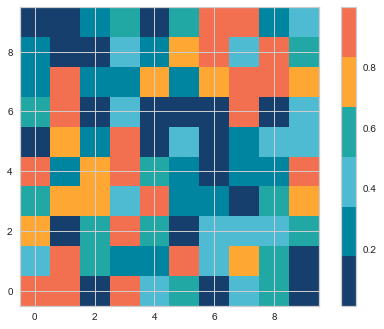

In [5]:
#Define color palette fiting presentation slides

# Define colors by color code
blue_1 = '#4fbbd2'
blue_2 = '#0085a0'
blue_3 = '#173f6d'
green = '#21a8a4'
red = '#f27050'
orange = '#ffa733'

# List of colors 
colors = [blue_3, blue_2, blue_1, green, orange, red]

# assign to Matplotlib colormap
vintage = matplotlib.colors.ListedColormap(colors, name="vintage", N=6)

# plot Matplotlib colors
mat = np.random.random((10,10))
plt.imshow(mat, origin="lower", cmap=vintage, interpolation='nearest')
plt.colorbar()
plt.show()

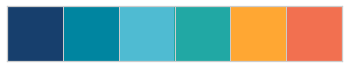

In [6]:
# assign to Seaborn color palette
current_palette = sns.color_palette(colors)

# plot Seaborn colors and set font size
sns.palplot(current_palette)
sns.set(palette=current_palette)

### Dataset

The dataset was a kind gift of Hummingbird Diagnostics GmbH (https://www.hummingbird-diagnostics.com) provided by neuefische GmbH (https://www.neuefische.de/)

#### Overview

| Column Name | Description | Type | Others | 
|-------------|-------------|------|--------|
| sampleID | Sample Reference | Object | 300 Samples|
| Group | Sample Label | Categorical | NTLD (Non-Tumour Lung-Disease),<br>LCa (Lung Cancer),<br>CON (CONtrol Group)|
| Sex | Gender | Categorical | male or female|
| Age | Age | Numeric | 34 - 84 |
| Smoke | Smoker | Categorical | present,<br>past,<br>never|
| hsa-let-7a-3p - <br>hsa-miR-99b-5p | miRNA Expression Values | Numeric | 1183 different miRNA 

#### Loading Data

In [7]:
# Loading Excel-File with Annotation
df1 = pd.read_excel('data/LC_annotation.xlsx')
print('The dataframe consist of {} rows and {} columns.'.format(df1.shape[0], df1.shape[1]))
df1.head()

The dataframe consist of 300 rows and 5 columns.


sampleID Group     Sex   Age    Smoke
0  SampleLC_1  NTLD    male  34.0      NaN
1  SampleLC_2  NTLD  female  35.0      NaN
2  SampleLC_3  NTLD  female  37.0      NaN
3  SampleLC_4   LCa  female  43.5     Past
4  SampleLC_5  NTLD    male  44.0  Present

In [8]:
# Info about d(ata)types
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sampleID  300 non-null    object 
 1   Group     300 non-null    object 
 2   Sex       294 non-null    object 
 3   Age       297 non-null    float64
 4   Smoke     247 non-null    object 
dtypes: float64(1), object(4)
memory usage: 11.8+ KB


In [9]:
# Loading .txt-File with miRNA-Expression Data
df2 = pd.read_table('data/LC_data_non_log.txt')
print('The dataframe consist of {} rows and {} columns.'.format(df2.shape[0], df2.shape[1]))
df2.head()

The dataframe consist of 1183 rows and 300 columns.


SampleLC_1   SampleLC_2   SampleLC_3    SampleLC_4  \
hsa-let-7a-3p    10.169737     8.993866     9.221781      9.700501   
hsa-let-7a-5p  5717.565532  8152.894560  9161.633060  15589.388815   
hsa-let-7b-3p    15.373312    14.683980    15.751940     11.411269   
hsa-let-7b-5p  2888.175532  3805.584560  1262.754060   7857.315268   
hsa-let-7c-5p   657.148032   906.707560   301.175060   1510.150845   

                 SampleLC_5   SampleLC_6   SampleLC_7    SampleLC_8  \
hsa-let-7a-3p      6.133340     7.275606     7.449349      7.883027   
hsa-let-7a-5p  23861.201568  9901.092307  9353.363102  21256.531275   
hsa-let-7b-3p     25.375915     9.623426    17.974963     14.870346   
hsa-let-7b-5p   9886.602937  2163.823798  4105.700075  16453.774838   
hsa-let-7c-5p   2891.103594   387.774260   779.223334   4264.195792   

                 SampleLC_9   SampleLC_10  ...  SampleLC_291  SampleLC_292  \
hsa-let-7a-3p      5.694632      7.676339  ...     10.231375      7.488037   
hsa-let-7a-5p  40763.465605  29245.233210  ...  16196.642530    700.533350   
hsa-let-7b-3p     24.793596     18.707404  ...     20.736437     17.581660   
hsa-let-7b-5p  20718.366066  10620.324339  ...  14533.701990   1972.377350   
hsa-let-7c-5p   6357.348000   2607.322331  ...   2154.289849    134.971650   

               SampleLC_293  SampleLC_294  SampleLC_295  SampleLC_296  \
hsa-let-7a-3p     24.502362      6.388280      7.690654      6.299681   
hsa-let-7a-5p   8726.485189  22803.481320  25015.375396  22466.730785   
hsa-let-7b-3p     32.999253     13.348059     18.129165     22.954418   
hsa-let-7b-5p   9391.409855  33118.422360  18110.775679  47644.899330   
hsa-let-7c-5p   1263.326599   7542.868162   4076.368624  10307.480329   

               SampleLC_297   SampleLC_298  SampleLC_299  SampleLC_300  
hsa-let-7a-3p     10.355813       8.769300      7.280144      7.214706  
hsa-let-7a-5p  11628.542374  136769.972052  26820.547670  26597.044525  
hsa-let-7b-3p     17.644106      13.651284     22.475348     25.833810  
hsa-let-7b-5p  16593.222849   83604.788124  20045.890411  32703.037481  
hsa-let-7c-5p   2191.549352   21619.300366   4307.879298   7170.643628  

[5 rows x 300 columns]

In [10]:
# Info about d(ata)types
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1183 entries, hsa-let-7a-3p to hsa-miR-99b-5p
Columns: 300 entries, SampleLC_1 to SampleLC_300
dtypes: float64(300)
memory usage: 2.7+ MB


#### Joining Data

In [11]:
# Setting Index of df1 (Annotation) to sampleID
df1.set_index("sampleID")

# Transforming columns to rows of df2 (miRNA Expression Data)
df3 = df2.T

# Joining Dataframes to create a single dataframe df4
df4 = df1.join(df3, on="sampleID", how='outer')
print('The dataframe consist of {} rows and {} columns.'.format(df4.shape[0], df4.shape[1]))
df4.head()

The dataframe consist of 300 rows and 1188 columns.


sampleID Group     Sex   Age    Smoke  hsa-let-7a-3p  hsa-let-7a-5p  \
0  SampleLC_1  NTLD    male  34.0      NaN      10.169737    5717.565532   
1  SampleLC_2  NTLD  female  35.0      NaN       8.993866    8152.894560   
2  SampleLC_3  NTLD  female  37.0      NaN       9.221781    9161.633060   
3  SampleLC_4   LCa  female  43.5     Past       9.700501   15589.388815   
4  SampleLC_5  NTLD    male  44.0  Present       6.133340   23861.201568   

   hsa-let-7b-3p  hsa-let-7b-5p  hsa-let-7c-5p  ...  hsa-miR-943  hsa-miR-944  \
0      15.373312    2888.175532     657.148032  ...     6.390441     7.820884   
1      14.683980    3805.584560     906.707560  ...     5.234970     7.567298   
2      15.751940    1262.754060     301.175060  ...     4.435148     7.738681   
3      11.411269    7857.315268    1510.150845  ...     7.808394     8.844422   
4      25.375915    9886.602937    2891.103594  ...     4.946353     5.378983   

   hsa-miR-95-3p  hsa-miR-96-3p  hsa-miR-96-5p  hsa-miR-98-5p  hsa-miR-99a-3p  \
0       8.481891       5.932662       112.3047       34.32323        7.073449   
1       7.847653       5.985716       185.2690       47.13855        5.724681   
2       7.893889       5.410440       182.6446       66.89235        6.719895   
3       8.782223       8.176937       366.1072       40.31580        8.553054   
4       6.080522       5.319329      1501.0180      122.96760        5.220272   

   hsa-miR-99a-5p  hsa-miR-99b-3p  hsa-miR-99b-5p  
0        14.79587        6.989605        28.41288  
1        15.02991        6.412826        13.66082  
2        19.68656        7.317585        48.61566  
3       224.52850        8.869005        66.39760  
4       211.52930        5.563860        99.50221  

[5 rows x 1188 columns]

In [12]:
# Info about d(ata)types
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Columns: 1188 entries, sampleID to hsa-miR-99b-5p
dtypes: float64(1184), object(4)
memory usage: 2.7+ MB


## Data Cleaning

### Missing Values & Duplicates

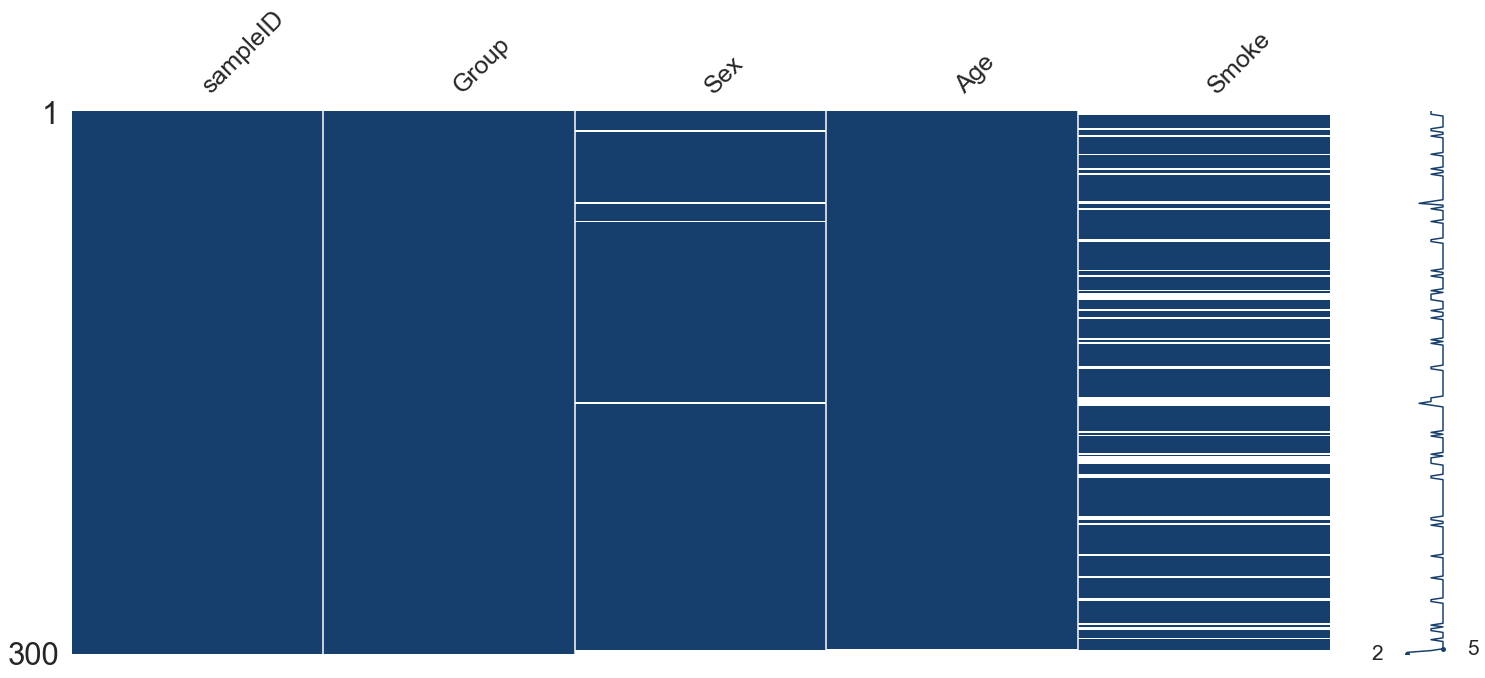

In [13]:
# Check for missing values in df1 (Annotation)
missingno.matrix(df1, color=matplotlib.colors.to_rgb(blue_3), fontsize=25);
plt.savefig('figures/missingvalues_annotation', transparent=True, dpi=300);

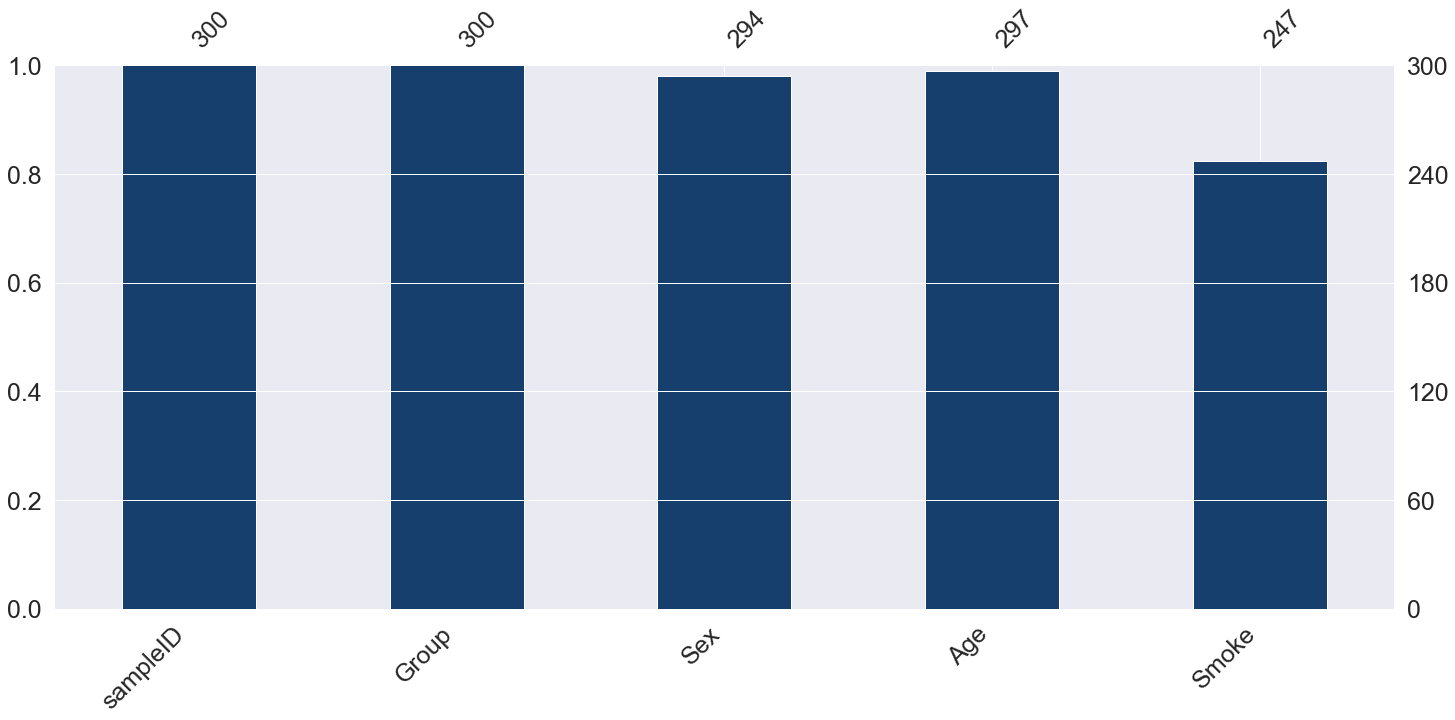

In [14]:
missingno.bar(df1, color=matplotlib.colors.to_rgb(blue_3), fontsize=25);
plt.savefig('figures/missingvalues_annotation2', transparent=True, dpi=300);

In [15]:
df1.isna().sum()

sampleID     0
Group        0
Sex          6
Age          3
Smoke       53
dtype: int64

In [16]:
# Check for duplicates
df1.duplicated().sum()

0

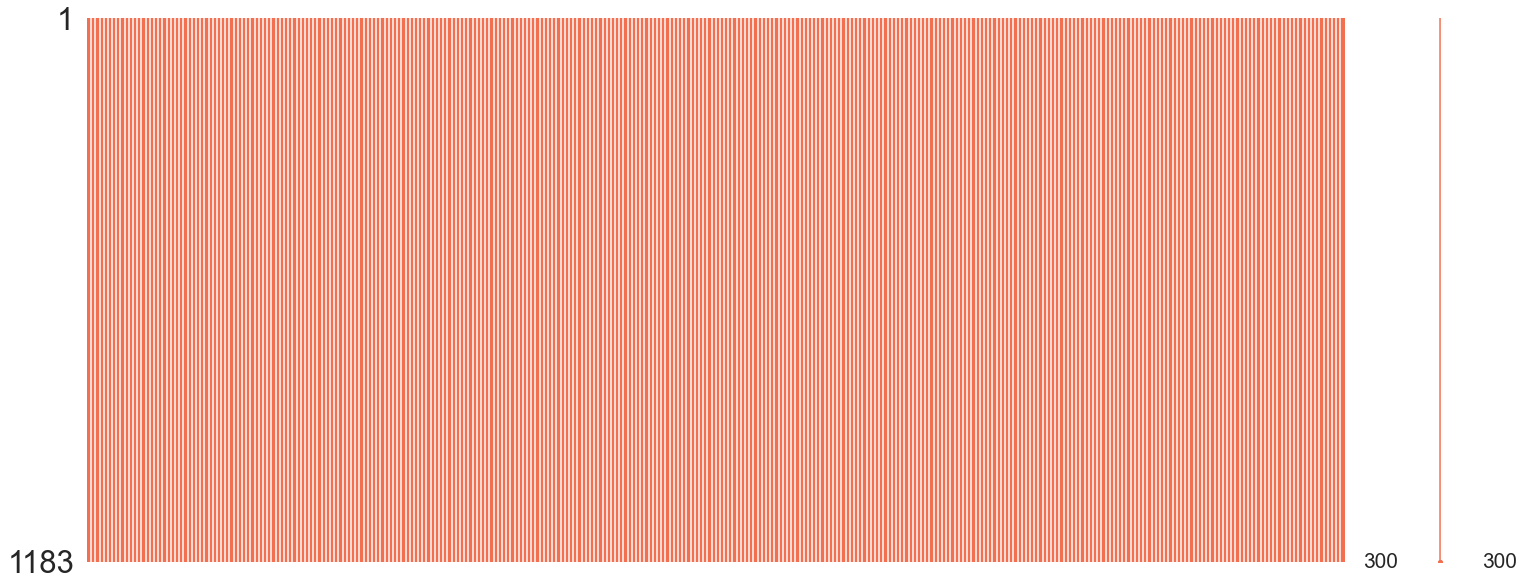

In [17]:
# Check for missing values in df2 (miRNA-Expression Data)
missingno.matrix(df2, color=matplotlib.colors.to_rgb(red), fontsize=25);
plt.savefig('figures/missingvalues_miRNA', transparent=True, dpi=300);

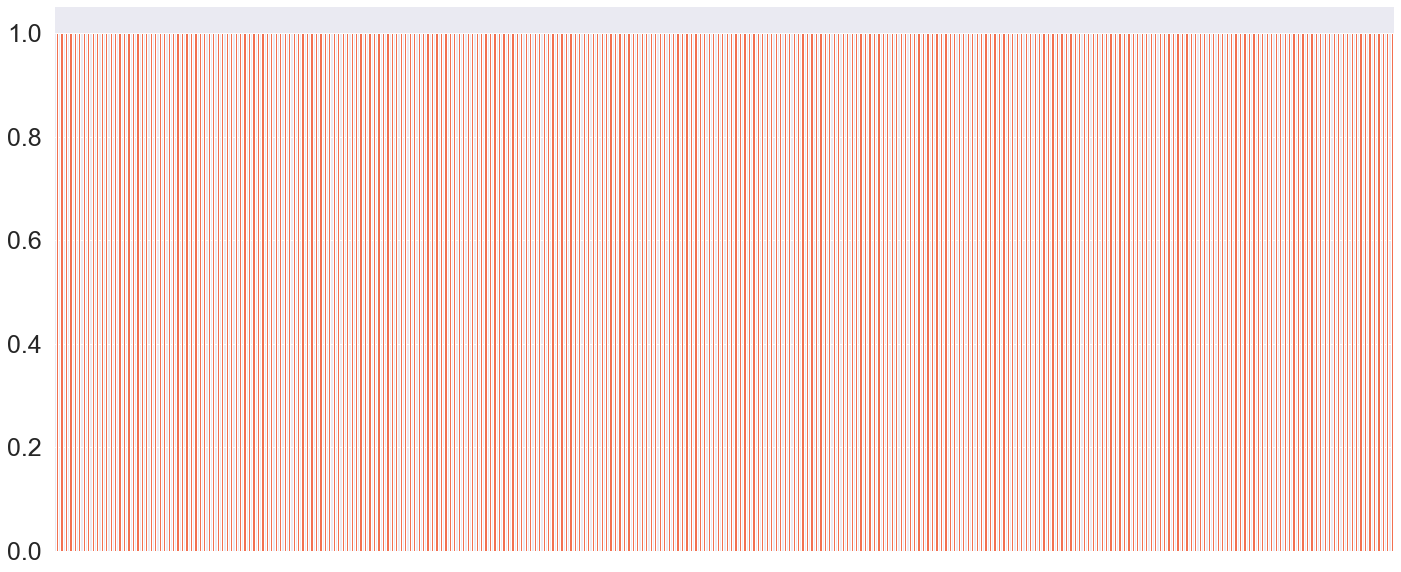

In [18]:
missingno.bar(df2, color=matplotlib.colors.to_rgb(red), fontsize=25);
plt.savefig('figures/missingvalues_miRNA2', transparent=True, dpi=300);

In [19]:
df2.isna().sum()

SampleLC_1      0
SampleLC_2      0
SampleLC_3      0
SampleLC_4      0
SampleLC_5      0
               ..
SampleLC_296    0
SampleLC_297    0
SampleLC_298    0
SampleLC_299    0
SampleLC_300    0
Length: 300, dtype: int64

In [20]:
# Check for duplicates
df2.duplicated().sum()

0

#### Summary

There are values missing for Sex (6/300; 2%), Age (3/300; 1%) and Smoke (53/300; 17.6%) in Annotation Data and no missing values in miRNA-Expresion Data. There are no duplicates.

The missing values may be neclected as not necessarily needed for the project goals to use a set of 10 to 20 miRNAs to predict a group of patients. As well miRNA data (Prediction Features) as group (Prediction Labels) show no missing values.

### Cleaning & Converting Values

In [21]:
# Creating new Column Label (encoding Labels to numerical Values 0,1,2; needed in some functions)
# 0 = CON (CONtrol Group), 1 = LCa (Lung Cancer), 2 = NTLD (Non-Tumour Lung-Disease)

# first create list with old labels
label_list = df4.Group.tolist()

# then encode labels to label_new list
label_new = []
for label in label_list:
    if label == "CON":
        label_new.append(0)
    elif label == "LCa":
        label_new.append(1)
    else:
        label_new.append(2)
        
# include new labels to the dataframe
df4.insert(2, "Label", label_new)

## Data Exploration

Visualization of different parts of the dataframe provides a first overview over the properties and distribution of the various features.

### miRNA-Expression Data

In [22]:
# Simple Statistics for each column / over all patients for each miRNA
df3.describe()

hsa-let-7a-3p  hsa-let-7a-5p  hsa-let-7b-3p  hsa-let-7b-5p  \
count     300.000000     300.000000     300.000000     300.000000   
mean        9.402791   23832.393325      19.559043   17974.643896   
std         5.280378   23291.105557       7.399962   14424.037569   
min         4.940617      38.339086       7.450113      42.280062   
25%         6.658562    9516.969027      14.896490    8016.475395   
50%         7.628066   17199.351502      17.481272   14156.440842   
75%         9.750887   28684.175160      23.934594   26838.248546   
max        56.642516  149962.333065      69.576656   83604.788124   

       hsa-let-7c-5p  hsa-let-7d-3p  hsa-let-7d-5p  hsa-let-7e-3p  \
count     300.000000     300.000000     300.000000     300.000000   
mean     3789.420736      16.142173    6565.580723       8.785773   
std      3420.570174       8.283376    6575.586782       5.272169   
min        14.556718       5.587808       7.244910       4.542245   
25%      1448.657211      10.925667    2732.859626       6.137592   
50%      2963.611225      13.291748    4491.039755       7.117287   
75%      4984.884862      18.164330    7913.861504       9.014158   
max     21619.300366      61.529077   44740.793541      55.157347   

       hsa-let-7e-5p  hsa-let-7f-1-3p  ...  hsa-miR-943  hsa-miR-944  \
count     300.000000       300.000000  ...   300.000000   300.000000   
mean       31.758458        18.074932  ...     8.114372     8.384787   
std        28.105664         6.824515  ...     4.811039     4.945748   
min         4.921895         7.085688  ...     4.100124     4.300865   
25%        16.579612        13.577476  ...     5.616376     5.809403   
50%        24.284067        16.227491  ...     6.571538     6.913197   
75%        35.380196        21.676177  ...     8.578434     8.914393   
max       259.268272        68.772438  ...    52.471690    53.556260   

       hsa-miR-95-3p  hsa-miR-96-3p  hsa-miR-96-5p  hsa-miR-98-5p  \
count     300.000000     300.000000     300.000000     300.000000   
mean        8.675664       7.723339     600.038161     123.315892   
std         4.949045       4.605896     896.650391     193.986571   
min         4.416310       4.048167       5.755420       5.594751   
25%         6.101095       5.354176     110.089650      40.508820   
50%         7.046945       6.234828     307.904750      66.225320   
75%         8.969263       8.007796     674.267025     124.908650   
max        51.972650      49.352820    8099.504000    1997.999000   

       hsa-miR-99a-3p  hsa-miR-99a-5p  hsa-miR-99b-3p  hsa-miR-99b-5p  
count      300.000000      300.000000      300.000000      300.000000  
mean         8.181131       89.346688        8.665373       81.749416  
std          4.861083       66.851102        5.212743       61.000360  
min          4.440024        6.793955        4.491491        6.019939  
25%          5.680078       41.061370        5.912016       44.529785  
50%          6.660271       72.068805        6.998983       69.419520  
75%          8.234042      116.980850        8.843192      104.322350  
max         50.939600      400.610300       54.590190      589.320900  

[8 rows x 1183 columns]

#### Distribution of miRNA values

In [23]:
# D'Agostino and Pearson's Test on Normal Distribution

# create list of columns of df3
miRNA_stat = df3.columns

# create dictionary for results of D'Agostino and Pearson's Test
miRNA_normal = {}

for miRNA in miRNA_stat:

    # make Pearson Test on Normal distribution
    # statistic = z_score_skew^2 + z_score_kurtosis^2; pvalue = significance
    statistic, pvalue = normaltest(df3[miRNA])
   
    # interpretation
    alpha = 0.05 # 5% significance H0 Hypothesis
    if pvalue > alpha:
        # sample looks Normal distributed (Gaussian fails to reject Zero Hypothesis H0)
        gaussian = 1
    else:
        # sample looks NOT Normal distributed (Gaussian rejects Zero Hypothesis H0)
        gaussian = 0
    
    miRNA_normal[miRNA] = ((round(statistic, 3)), (round(pvalue, 3)), gaussian)

# create dataframe with results dictionary 
miRNA_dist = pd.DataFrame(miRNA_normal).T.rename(columns={0:"z_score", 1:"p_value", 2:"normal"})

In [24]:
# check if or which miRNA is normally distributed in patient samples
miRNA_dist[(miRNA_dist["normal"] == 1)]

z_score  p_value  normal
hsa-miR-223-3p    5.021    0.081     1.0
hsa-miR-425-5p    4.947    0.084     1.0

count       300.000000
mean      81167.610760
std       43955.841466
min          10.618468
25%       48030.634498
50%       83260.719928
75%      108048.129316
max      210357.058647
Name: hsa-miR-223-3p, dtype: float64

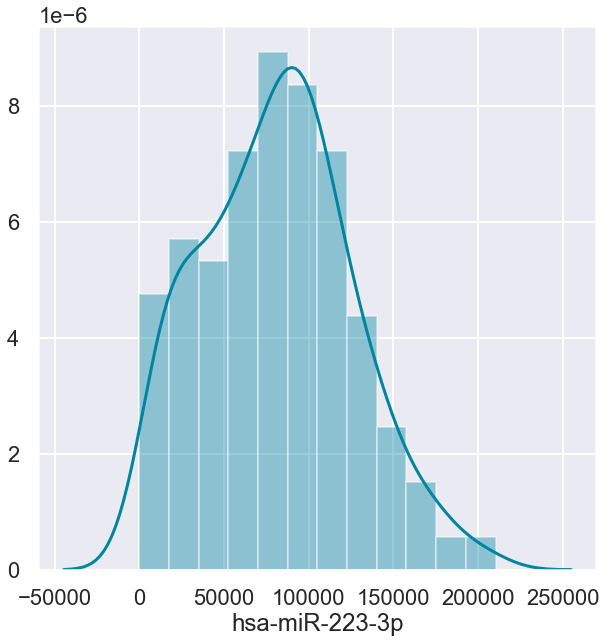

In [25]:
# Histogram for Distribution of miRNA 223-3p
plt.figure(figsize=(10,10))
sns.set_context("poster")
sns.distplot(df3["hsa-miR-223-3p"], color=blue_2);
plt.savefig('figures/distribution_miRNA_223-3p', transparent=True, dpi=300);
df3["hsa-miR-223-3p"].describe()

count      300.000000
mean     22529.767259
std      12686.399292
min          5.079847
25%      13459.775783
50%      22229.344418
75%      31508.763056
max      67214.972210
Name: hsa-miR-425-5p, dtype: float64

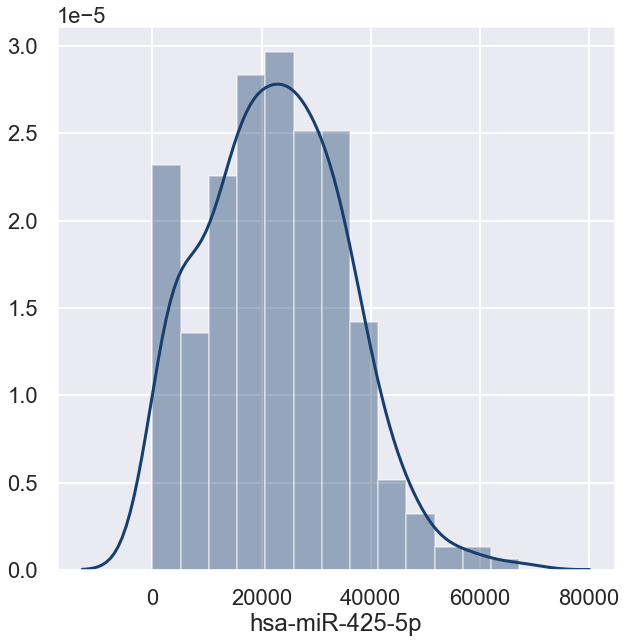

In [26]:
# Histogram for Distribution of miRNA 425-5p
plt.figure(figsize=(10,10))
sns.set_context("poster")
sns.distplot(df3["hsa-miR-425-5p"], color=blue_3);
plt.savefig('figures/distribution_miRNA_425-5p', transparent=True, dpi=300);
df3["hsa-miR-425-5p"].describe()

#### Sum of miRNA concentration

Checking the data description statement: "...Each column contains the concentration of specific miRNAs, while the sum of all miRNA concentrations per patient is constant..."

In [27]:
df5 = pd.DataFrame(df3.sum(axis=1)).rename(columns={0:"sum_miRNA"})
df5

sum_miRNA
SampleLC_1    4.581314e+05
SampleLC_2    5.015698e+05
SampleLC_3    6.360268e+05
SampleLC_4    1.520136e+06
SampleLC_5    1.444430e+06
...                    ...
SampleLC_296  1.596045e+06
SampleLC_297  9.929835e+05
SampleLC_298  2.199376e+06
SampleLC_299  1.911118e+06
SampleLC_300  1.894939e+06

[300 rows x 1 columns]

count    3.000000e+02
mean     1.191841e+06
std      4.839428e+05
min      7.851522e+04
25%      8.814026e+05
50%      1.183958e+06
75%      1.458039e+06
max      3.506215e+06
Name: sum_miRNA, dtype: float64

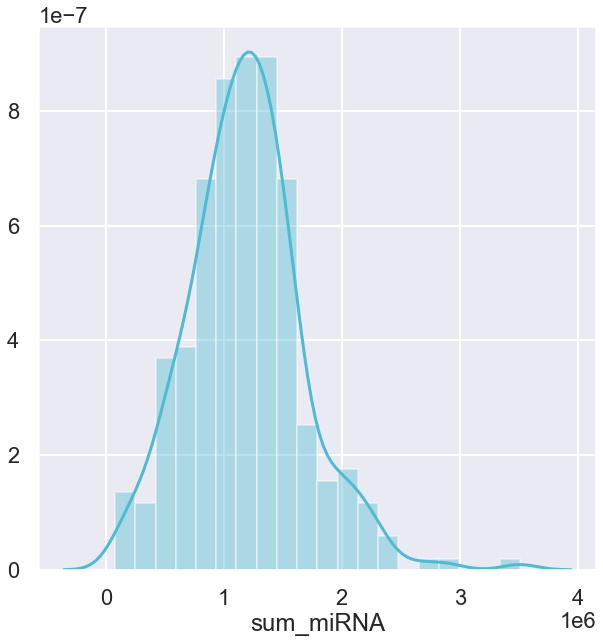

In [28]:
# Histogram for Distribution of Sum of miRNA
plt.figure(figsize=(10,10))
sns.set_context("poster")
sns.distplot(df5.sum_miRNA, color=blue_1);
plt.savefig('figures/distribution_sum_miRNA', transparent=True, dpi=300);
df5.sum_miRNA.describe()

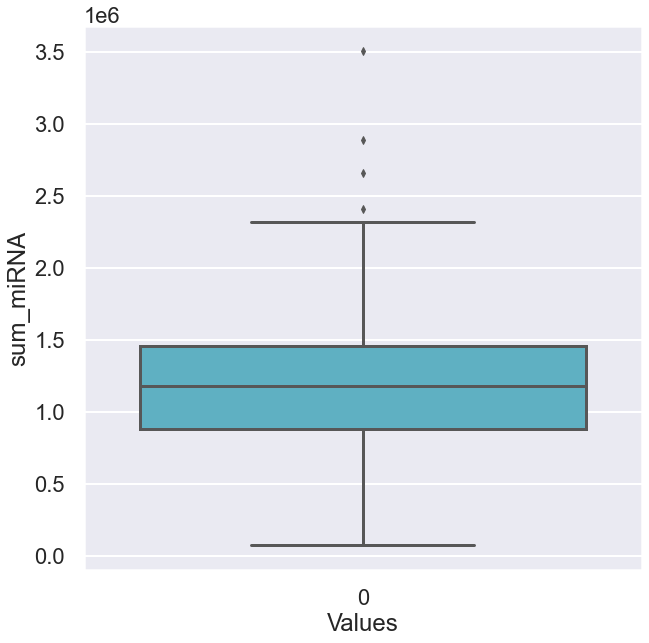

In [29]:
# Boxplot for Sum of miRNA (reveals the presence of outliers)
plt.figure(figsize=(10,10))
sns.set_context("poster")
sns.boxplot(data=df5.sum_miRNA, color=blue_1)
plt.xlabel('Values');
plt.ylabel('sum_miRNA');
plt.savefig('figures/boxplot_sum_miRNA', transparent=True, dpi=300);

The data discription statement seems to be wrong. I assume the statement refers to the total miRNA concentration after extraction from blood samples, but not all miRNA were covered by analysis (1183 in this dataset, but more than 2000 known in humans. Hammond, 2015: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4504744/pdf/nihms-690138.pdf).

#### Summary

- all of the 1183 miRNAs are not normally distributed in patient samples except 2 are almost (miRNA 223-3p and miRNA 425-5p)
- The sum of miRNAs is almost normally distributed (small subgroup / outliers between 2.3e+06 and 3.5e+06)
- the sum of all miRNAs is not constant per patient sample

### Annotation

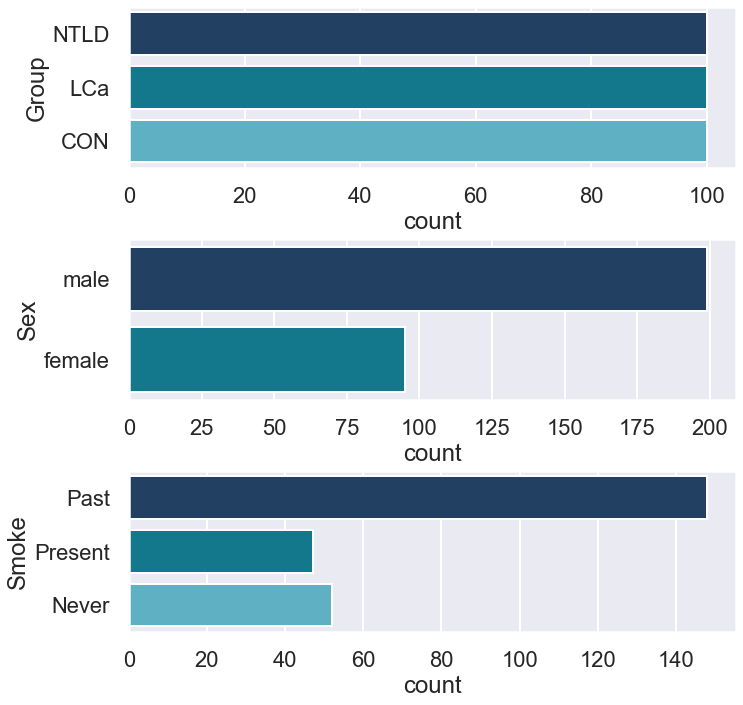

In [30]:
# Plots of Annotation
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
fig.tight_layout(pad=1.0)
sns.set_context("poster")

sns.countplot(y=df1.Group, ax=axes[0]);
sns.countplot(y=df1.Sex, ax=axes[1]);
sns.countplot(y=df1.Smoke, ax=axes[2]);
plt.savefig('figures/countplot_annotation', transparent=True, dpi=300);

In [31]:
# Counting Values of Annotation
print(df1.Group.value_counts())
print(df1.Sex.value_counts())
print(df1.Smoke.value_counts())

CON     100
LCa     100
NTLD    100
Name: Group, dtype: int64
male      199
female     95
Name: Sex, dtype: int64
Past       148
Never       52
Present     47
Name: Smoke, dtype: int64


count    297.000000
mean      66.337710
std        8.090426
min       34.000000
25%       62.000000
50%       67.000000
75%       72.000000
max       84.000000
Name: Age, dtype: float64

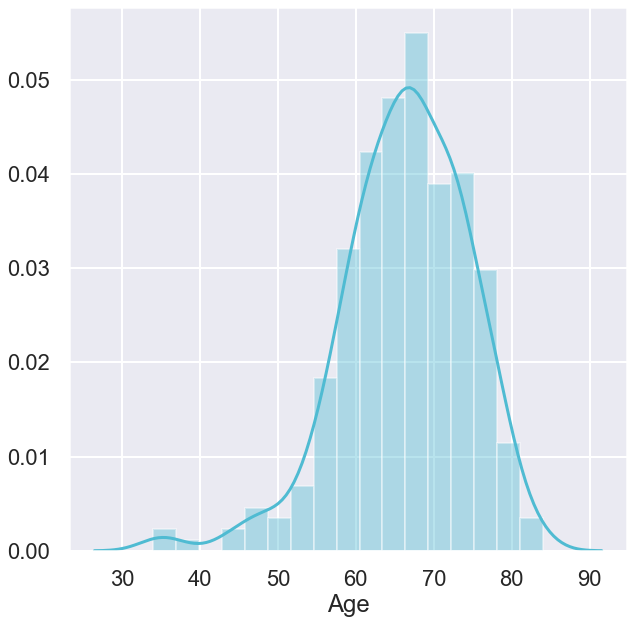

In [32]:
# Histogram for Age Distribution
plt.figure(figsize=(10,10))
sns.set_context("poster")
sns.distplot(df1.Age, color=blue_1);
plt.savefig('figures/distribution_age', transparent=True, dpi=300);
df1.Age.describe()

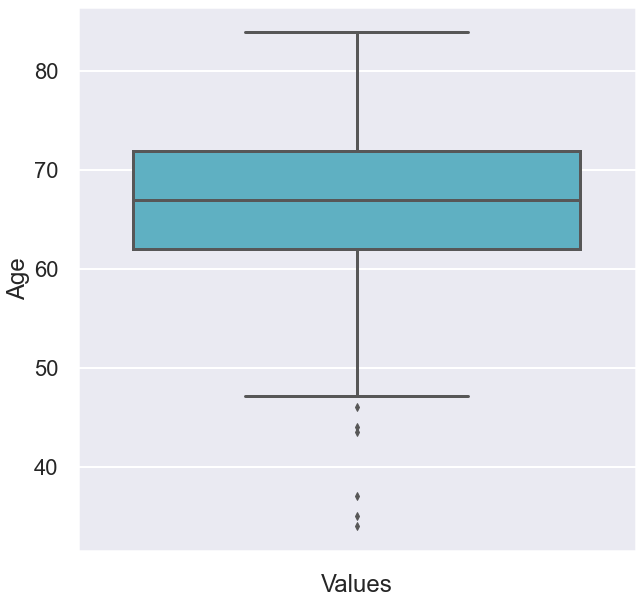

In [33]:
# Boxplot for Age (reveals the presence of outliers)
plt.figure(figsize=(10,10))
sns.set_context("poster")
sns.boxplot(df1.Age, color=blue_1, orient="v")
plt.xlabel('Values');
plt.ylabel('Age');
plt.savefig('figures/boxplot_age', transparent=True, dpi=300);

#### Summary

- Groups is equally distributed between NTLD (100/300; 33.3%), LCa (100/300; 33.3%) and CON (100/300; 33.3%) (no imbalances; used as class label)
- more males (199/300; 66.3%) than females (95/300; 31.6%) in cohort (medium inbalance; not used as class label)
- more past smokers (148/300; 49.3%) than present (47/300; 15.6%) and never (52/300; 17.3%) smokers (medium inbalance; not used as class label)
- age is almost normally distributed (small subgroup / outliers between 34 and 47)

## Feature Engineering

### Scaling

As scaling might provide a useful tool in data preprocessing when data is not normally distributed I have implemented the StandardScaler. After modeling with and without scaled data no improvements of results and metrics where detected. Therefore I switch here to unscaled data.

In [34]:
# Scaling miRNA-Expression Data

# Not Required Columns of complete DataFrame df4 to List
col = ['sampleID', 'Group', 'Label', 'Sex', 'Age', 'Smoke']

# Creating y and X
y = df4['Label']
X = df4.drop(col, axis=1)

In [35]:
# Initialize Scaler and transform data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create scaled dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Switch X to X_scaled (comment out for unscaled data)
# X = X_scaled

In [36]:
# Then update dataframe df4 with scaled data / unscaled data
df4 = pd.concat([df4[col], X], axis=1)

### Eval/Train-Test-Split

The data shows 1183 predictive features. The rule of thumb for splitting the data is 50 records per feature. So in theory we need at least 59,150 records, but we only have 300 samples (records). As the project goal is to reduce the number of miRNA (features) to between 10 to 20, afterwards only 500 to 1000 records are needed. This will be more agreeable. Nevertheless I have tried to split the data in reasonable sized training and equally sized evaluation and testing datasets.

In [37]:
# Separating data for final evaluation (Eval-Test-Set)
X_modell, X_eval, y_modell, y_eval = train_test_split(X, y, test_size=0.1, random_state=seed)

# X_model and X_eval 
print('Shape X_modell:', X_modell.shape)
print('Shape X_eval:', X_eval.shape)

Shape X_modell: (270, 1183)
Shape X_eval: (30, 1183)


In [38]:
# Train Test Split

# choosing test size to same size as X_eval
X_train, X_test, y_train, y_test = train_test_split(X_modell, y_modell, test_size=0.11, random_state=seed)

# X_train and X_test
print('Shape X_train:', X_train.shape)
print('Shape X_test:', X_test.shape)

Shape X_train: (240, 1183)
Shape X_test: (30, 1183)


### Feature Selection

First I try to pre-select those miRNA which are most important or descriptive for a prediction model. Therefore I use different tree-based classifier and non-tree classifier algorithms to rank those features. With my project goal in mind, I focus on a TOP20 as this is the maximum number applicable on the biochip. My aim here was to find a TOP20 list from one algorithm or a combination of results which shows later the best metrics in predictive modeling.

#### Feature Importance of tree-based Classifiers

In [39]:
# Initialize Tree-based Classifiers
DTC = DecisionTreeClassifier(random_state=seed) 
RFC = RandomForestClassifier(random_state=seed) 
ETC = ExtraTreesClassifier(random_state=seed)
ABC = AdaBoostClassifier(random_state=seed)
XGBC = XGBClassifier(random_state=seed)

# List of Tree-based Classifiers used for feature Selection
tree_clf = [DTC, RFC, ETC, ABC, XGBC]

# List of Classifier Names
name_clf = ["DTC", "RFC", "ETC", "ABC", "XGBC"]

In [40]:
%%capture

# Create Dictionary for Feature Selection Results
results_fs = {}

# Use feature_selection function 
feature_selection(results_fs, tree_clf, name_clf, X_train, y_train)

In [41]:
# Making Dataframes from results_fs Dictionary
dtc_dataframe = pd.DataFrame(results_fs["DTC"]).rename(columns={0:"miRNA", 1:"importance_value"})
rfc_dataframe = pd.DataFrame(results_fs["RFC"]).rename(columns={0:"miRNA", 1:"importance_value"})
etc_dataframe = pd.DataFrame(results_fs["ETC"]).rename(columns={0:"miRNA", 1:"importance_value"})
abc_dataframe = pd.DataFrame(results_fs["ABC"]).rename(columns={0:"miRNA", 1:"importance_value"})
xgbc_dataframe = pd.DataFrame(results_fs["XGBC"]).rename(columns={0:"miRNA", 1:"importance_value"})

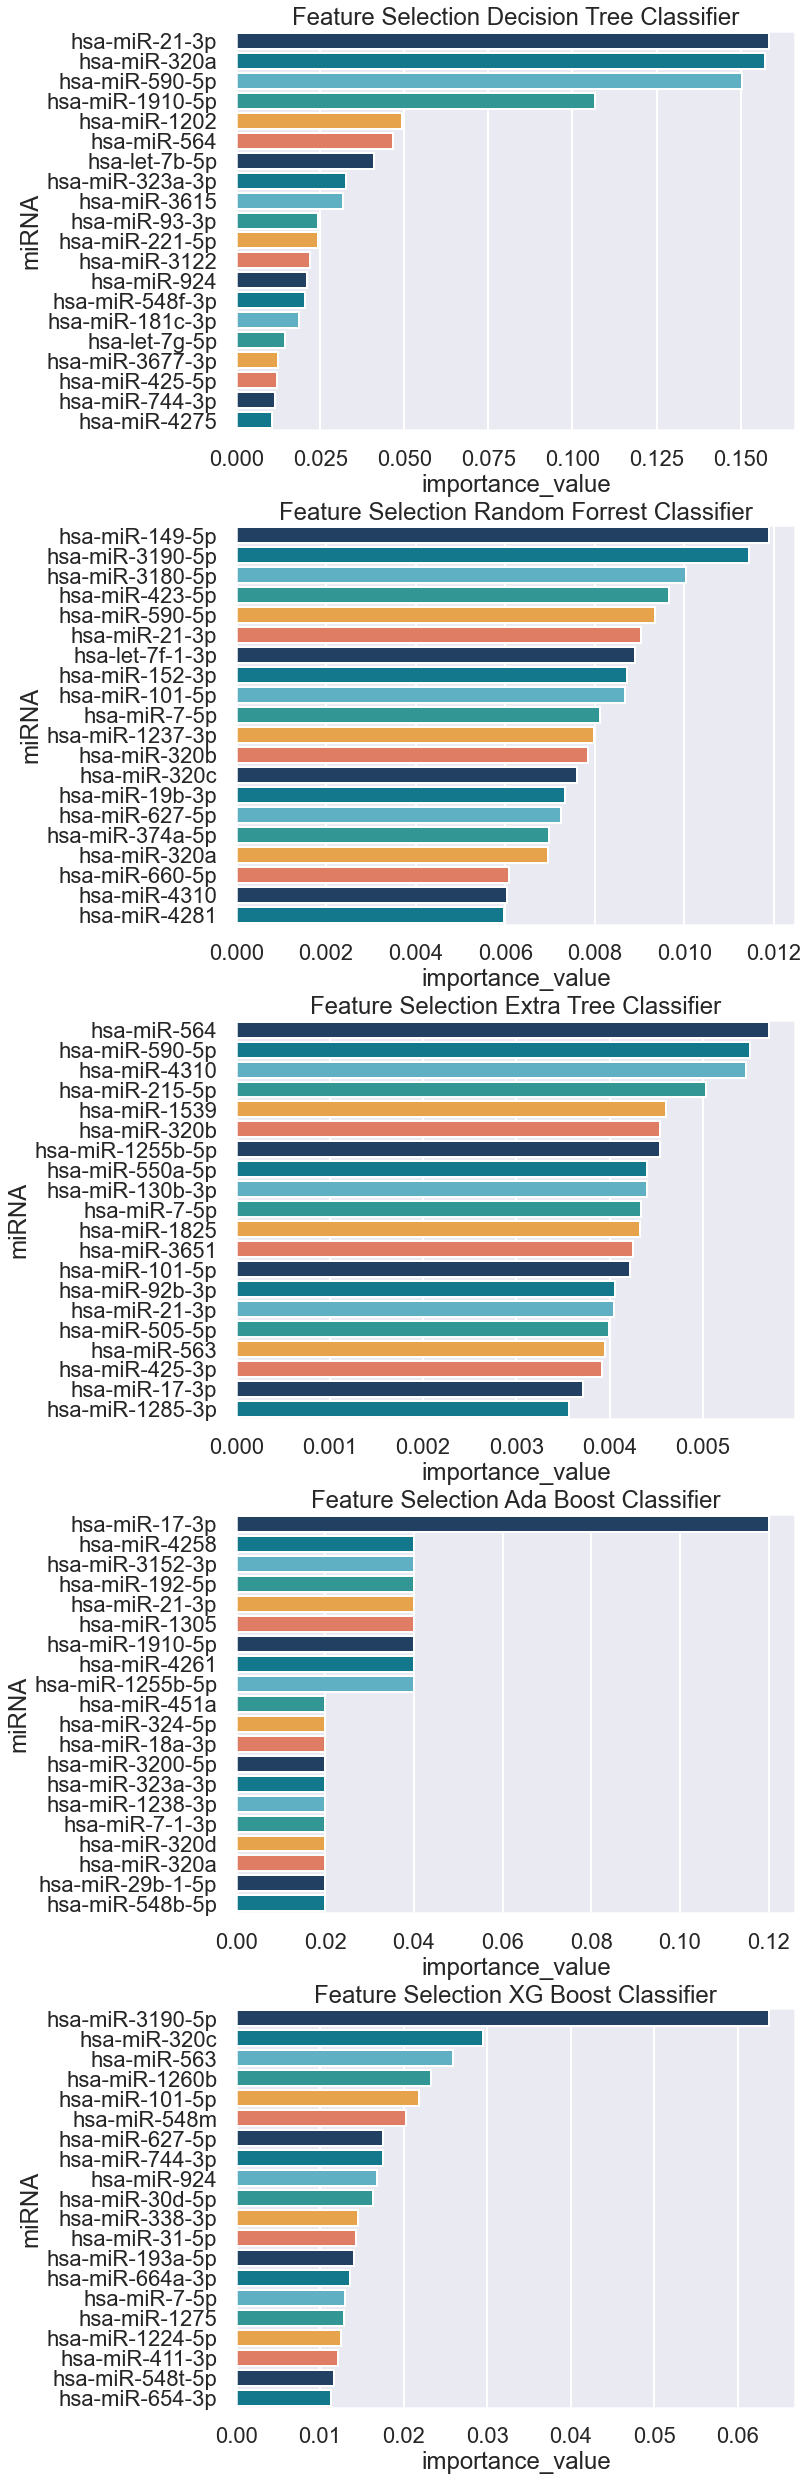

In [42]:
# Plots for Feature Selection
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 35))
f.tight_layout(pad=2.0)
sns.set_context("poster")

ax1.set_title("Feature Selection Decision Tree Classifier")
ax2.set_title("Feature Selection Random Forrest Classifier")
ax3.set_title("Feature Selection Extra Tree Classifier")
ax4.set_title("Feature Selection Ada Boost Classifier")
ax5.set_title("Feature Selection XG Boost Classifier")


sns.barplot(y="miRNA", x="importance_value", data=dtc_dataframe, ax=ax1, palette=current_palette);
sns.barplot(y="miRNA", x="importance_value", data=rfc_dataframe, ax=ax2, palette=current_palette);
sns.barplot(y="miRNA", x="importance_value", data=etc_dataframe, ax=ax3, palette=current_palette); 
sns.barplot(y="miRNA", x="importance_value", data=abc_dataframe, ax=ax4, palette=current_palette);
sns.barplot(y="miRNA", x="importance_value", data=xgbc_dataframe, ax=ax5, palette=current_palette);
plt.savefig('figures/feature_selection', transparent=True, dpi=300);

#### Combination of tree-based Classifiers (TBC)

In [43]:
%%capture

# Create a new Dictionary for Feature Selection Results 
# from tree-based Classifiers which includes all values (n=None)
results_combination = {}

# Use feature_selection function 
feature_selection(results_combination, tree_clf, name_clf, X_train, y_train, n=None)

In [44]:
# Making Dataframes from results_combination Dictionary
dtc_combi = pd.DataFrame(results_combination["DTC"]).rename(columns={0:"miRNA_dtc", 1:"iv_dtc"})
rfc_combi = pd.DataFrame(results_combination["RFC"]).rename(columns={0:"miRNA_rfc", 1:"iv_rfc"})
etc_combi = pd.DataFrame(results_combination["ETC"]).rename(columns={0:"miRNA_etc", 1:"iv_etc"})
abc_combi = pd.DataFrame(results_combination["ABC"]).rename(columns={0:"miRNA_abc", 1:"iv_abc"})
xgbc_combi = pd.DataFrame(results_combination["XGBC"]).rename(columns={0:"miRNA_xgbc", 1:"iv_xgbc"})

In [45]:
# Sort Dataframes by miRNA
dtc_combi = dtc_combi.sort_values(by ='miRNA_dtc', axis=0 ).reset_index()
rfc_combi = rfc_combi.sort_values(by ='miRNA_rfc', axis=0 ).reset_index()
etc_combi = etc_combi.sort_values(by ='miRNA_etc', axis=0 ).reset_index()
abc_combi = abc_combi.sort_values(by ='miRNA_abc', axis=0 ).reset_index()
xgbc_combi = xgbc_combi.sort_values(by ='miRNA_xgbc', axis=0 ).reset_index()

In [46]:
# and combine all Dataframes in 1 dataframe
df_combi = pd.concat([dtc_combi, rfc_combi, etc_combi, abc_combi, xgbc_combi], axis=1)

In [47]:
# then drop all columns not needed
drop_col = ["index", "miRNA_rfc", "miRNA_etc", "miRNA_abc", "miRNA_xgbc"]
df_combi = df_combi.drop(drop_col, axis=1)

# rename "miRNA_dtc" to miRNA
df_combi = df_combi.rename(columns={"miRNA_dtc":"miRNA"})

# set new index
df_combi = df_combi.set_index("miRNA")

# calculate the sum of all importance values for each miRNA
series_combi = df_combi.sum(axis=1)

# sort descending by Importance Value
series_combi = series_combi.sort_values(ascending=False)

# make a list of tuples
list_combi = list(series_combi.items())

In [48]:
# select the new TOP n (default=20)
n=20
list_combi = list_combi[0:n]

In [49]:
# create a new results dictionary in the common format (TBC = all Tree-Based Classifiers)
results_TBC = {"TBC":list_combi}

In [50]:
# Making Dataframes from results_TBC Dictionary
tbc_dataframe = pd.DataFrame(results_TBC["TBC"]).rename(columns={0:"miRNA", 1:"importance_value"})

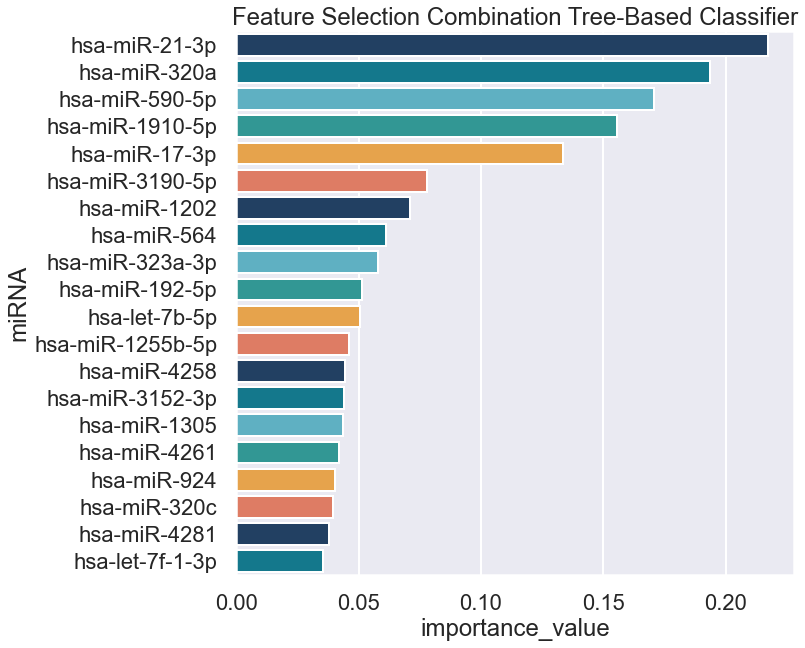

In [51]:
# Plots for Feature Selection
plt.figure(figsize=(10, 10))
sns.set_context("poster")
ax6 = sns.barplot(y="miRNA", x="importance_value", data=tbc_dataframe, palette=current_palette)
ax6.set_title("Feature Selection Combination Tree-Based Classifier");
plt.savefig('figures/feature_selection_combination', transparent=True, dpi=300);

#### Recursive Feature Elimination (RFE) with non-tree-based Classifiers

In [52]:
# Classifier Models for Recursive Feature Elemination
# (estimator is fitted recursive with "step=1" less Features
# and Features are ranked based on their contribution/importance)

#Initilizing non-tree-based Classifier Models
LG2 = LogisticRegression(random_state=seed)
SGDC2 = SGDClassifier(random_state=seed)   
    
# List of non-tree-based Classifiers used for Feature Selection
non_tree_clf = [LG2, SGDC2]

# List of non-tree-based Classifiers names
nt_name_clf = ["LG", "SGDC"]

In [53]:
%%capture

# Create Dictionary for Feature Selection Results
results_nt_clf = {}

# Use funtion for RFE based feature selection
rfe_selection(results_nt_clf, non_tree_clf, nt_name_clf, X_train, y_train)

In [54]:
# Making Dataframes from results_fs Dictionary
lg_dataframe = pd.DataFrame(results_nt_clf["LG"]).rename(columns={0:"miRNA", 1:"importance_rank"})
sgdc_dataframe = pd.DataFrame(results_nt_clf["LG"]).rename(columns={0:"miRNA", 1:"importance_rank"})

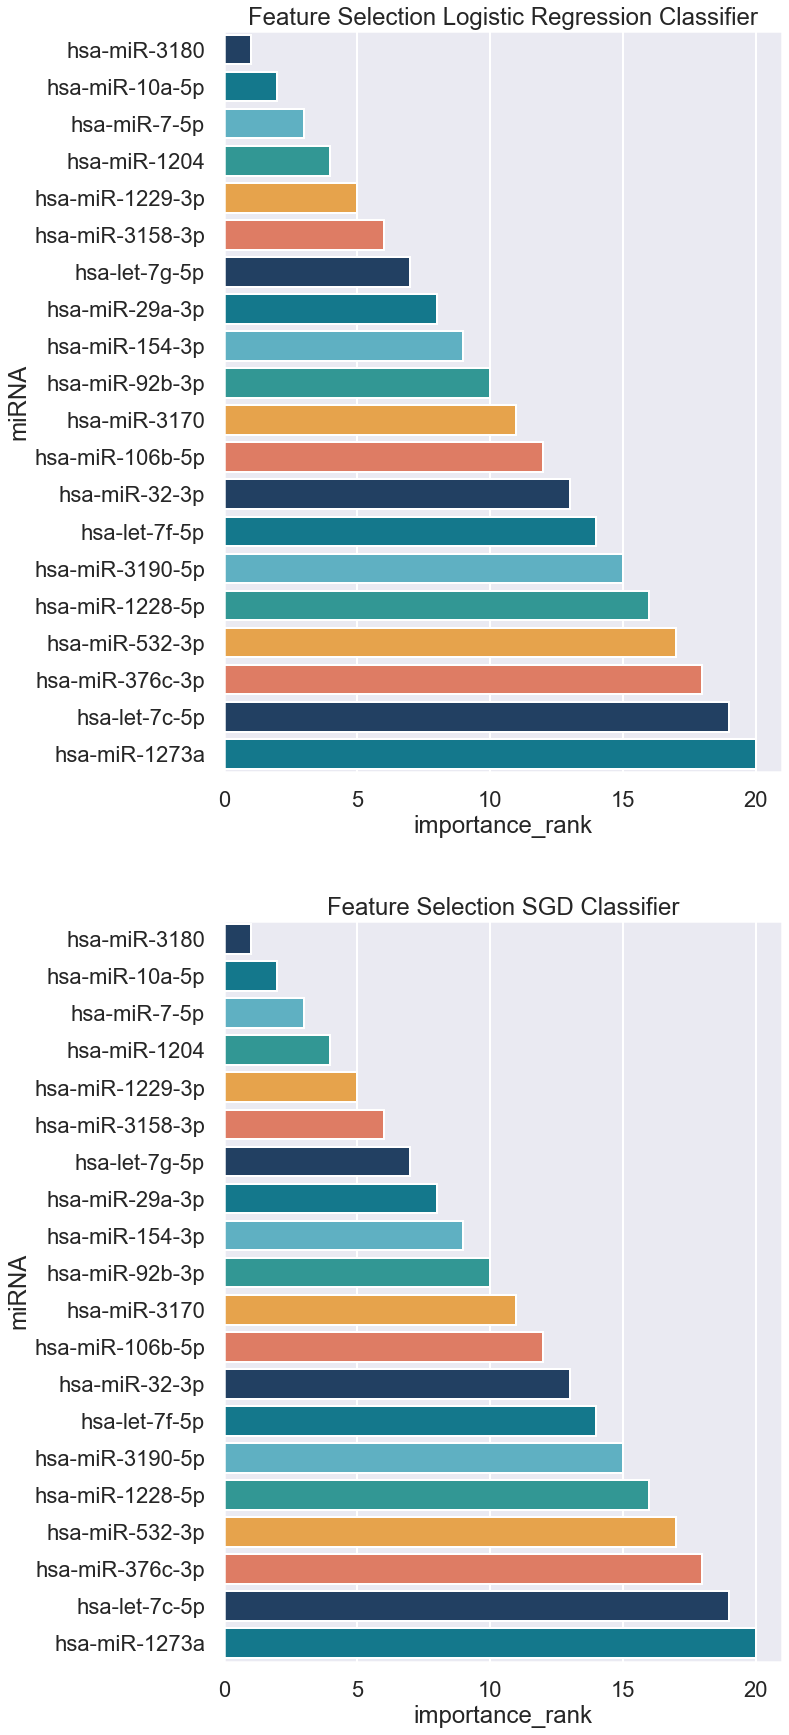

In [55]:
# Plots for Feature Selection
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 30))
sns.set_context("poster")

ax1.set_title("Feature Selection Logistic Regression Classifier")
ax2.set_title("Feature Selection SGD Classifier")


sns.barplot(y="miRNA", x="importance_rank", data=lg_dataframe, ax=ax1, palette=current_palette);
sns.barplot(y="miRNA", x="importance_rank", data=sgdc_dataframe, ax=ax2, palette=current_palette);
plt.savefig('figures/feature_selection_non-tree', transparent=True, dpi=300);

### Dataframe Selection

First I select different Dataframes based on the results of the Feature Selection from miRNA-Expression Data. In this way only the TOP features will be used for predictive modeling.

Second I select Dataframes based on annotation. "Sex" is something easily to be checked either a medical doctor specifies it during the Liquid Biopsy or by detection of Y-chromosomal DNA in the blood sample. "Age" is also something easily to be added during Liquid Biopsy from patients data. Further as miRNA are part of the human Epigenetics which change with age it could be reasonable to include these data. The categorie "Smoke" seems not useful for this, as patients have to be interviewed and answers are likely to be incorrect or misinterpreted. Nevertheless I include this in one dataframe to be comprehensive.

#### Selection from TOP20 Features of miRNA-Expression Data

In [56]:
# TOP20 Features Decision Tree Classifier (DTC) for creating new dataframe
X_dtc_top20 = dataframe_selection(results_fs["DTC"], X_train=X_train)


# TOP20 Features Random Forrest Classifier (RFC) for creating new dataframe
X_rfc_top20 = dataframe_selection(results_fs["RFC"], X_train=X_train)


#  TOP20 Features Extra Tree Classifier (ETC) for creating new dataframe
X_etc_top20 = dataframe_selection(results_fs["ETC"], X_train=X_train)


# TOP20 Features Ada Boost Classifier (ABC) for creating new dataframe
X_abc_top20 = dataframe_selection(results_fs["ABC"], X_train=X_train)


# TOP20 Features XG Boost Classifier (XGBC) for creating new dataframe
X_xgbc_top20 = dataframe_selection(results_fs["XGBC"], X_train=X_train)


# TOP20 Features Combination of tree-based Classifiers (TBC) for creating new dataframe
X_tbc_top20 = dataframe_selection(results_TBC["TBC"], X_train=X_train)

# TOP20 Features Logistic Regression Classifier (LGC) for creating new dataframe
X_lgc_top20 = dataframe_selection(results_nt_clf["LG"], X_train=X_train)

# TOP20 Features SGD Classifer (SGDC) for creating new dataframe
X_sgdc_top20 = dataframe_selection(results_nt_clf["SGDC"], X_train=X_train)

#### Selection from Annotation

##### Sex

First I need to exclude some Samples as they are missing values for Sex. As these are only 6 values I decide to drop them from the dataframe.

In [57]:
# create new dataframe
df_sex = df4.copy()

# check for SampleIDs of the missing values for Sex and write it to a list
no_sex = list(df_sex[(df_sex["Sex"] != "male") & (df_sex["Sex"] != "female")].index)

# Drop Instances from People without Sex Annotation
df_sex.drop(no_sex , axis=0, inplace=True)

In [58]:
# As Sex is a categorical I need to convert it to a dummy variable
# this means 1 = male and 0 = female

sex_dummies = pd.get_dummies(df_sex.Sex, drop_first=True)

# include it to the dataframe
df_sex = pd.concat([sex_dummies, df_sex], axis=1)

In [59]:
# Not Required Columns of complete DataFrame df_sex to List
col_sex = ['sampleID', 'Group', 'Label', 'Sex', 'Age', 'Smoke']

# Creating y and X
y_sex = df_sex['Label']
X_sex = df_sex.drop(col_sex, axis=1)

In [60]:
# Eval/Train-Test-Split data as before 

# Eval-Test-Set
X_sex_modell, X_sex_eval, y_sex_modell, y_sex_eval = train_test_split(X_sex, y_sex, test_size=0.1, random_state=seed)

# Train-Test-Split
X_sex_train, X_sex_test, y_sex_train, y_sex_test = train_test_split(X_sex_modell, y_sex_modell, test_size=0.11, random_state=seed)

##### Age

Again I need to exclude some Samples with missing values for Age. As these are only 3 values I decide again to drop them from the dataframe. The data for age also shows 6 outliers between 34 and 47. I drop them from the dataframe too.

In [61]:
# create new dataframe
df_age = df4.copy()

# check for SampleIDs of the missing values for Age and write it to a list
no_age = list(df_age[df_age["Age"].isna()].index)

# Drop Instances from People without Age Annotation
df_age.drop(no_age , axis=0, inplace=True)

# As we have a small subgroup / outliers between 34 and 47 check for these values and write it to a list
age_below = list(df_age[df_age["Age"] <= 47].index)

# Drop Instances from People with Age < 47 Annotation
df_age.drop([0, 1, 2, 3, 4, 5] , axis=0, inplace=True)

count    291.000000
mean      66.882474
std        7.183717
min       47.200000
25%       62.000000
50%       67.000000
75%       72.450000
max       84.000000
Name: Age, dtype: float64

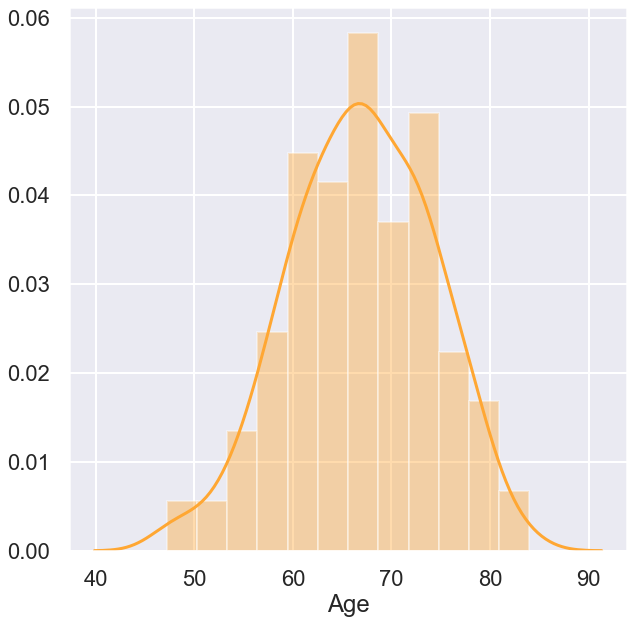

In [62]:
# Check Histogram for Age Distribution again
plt.figure(figsize=(10,10))
sns.set_context("poster")
sns.distplot(df_age.Age, color=orange);
plt.savefig('figures/distribution_age_nan', transparent=True, dpi=300);
df_age.Age.describe()

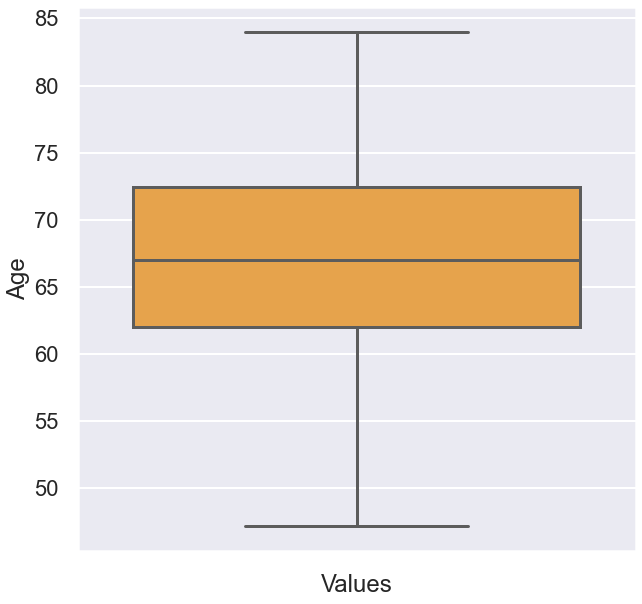

In [63]:
# Boxplot for Age again (reveals the absence of outliers)
plt.figure(figsize=(10,10))
sns.set_context("poster")
sns.boxplot(df_age.Age, color=orange, orient="v")
plt.xlabel('Values');
plt.ylabel('Age');
plt.savefig('figures/boxplot_age_nan', transparent=True, dpi=300);

In [64]:
# Not Required Columns of complete DataFrame df_age to List
col_age = ['sampleID', 'Group', 'Label', 'Sex', 'Smoke']

# Creating y and X
y_age = df_age['Label']
X_age = df_age.drop(col_age, axis=1)

In [65]:
# Eval/Train-Test-Split data as before 

# Eval-Test-Set
X_age_modell, X_sex_eval, y_age_modell, y_age_eval = train_test_split(X_age, y_age, test_size=0.1, random_state=seed)

# Train-Test-Split
X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X_age_modell, y_age_modell, test_size=0.11, random_state=seed)

##### Sex + Age

I also want to use a dataframe with Sex and Age data combined. Again I need to drop all samples with NaNs and age below 47.

In [66]:
# create new dataframe from age dataframe
df_sexage = df_age.copy()

# check for SampleIDs of the missing values for Sex and write it to a list
no_sexage = list(df_sexage[(df_sexage["Sex"] != "male") & (df_sexage["Sex"] != "female")].index)

# Drop Instances from People without Sex Annotation
df_sexage.drop(no_sexage , axis=0, inplace=True)

In [67]:
# Again as Sex is a categorical I need to convert it to a dummy variable
# this means 1 = male and 0 = female

sexage_dummies = pd.get_dummies(df_sexage.Sex, drop_first=True)

# include it to the dataframe
df_sexage = pd.concat([sexage_dummies, df_sexage], axis=1)

In [68]:
# Not Required Columns of complete DataFrame df_sexage to List
col_sexage = ['sampleID', 'Group', 'Label', 'Sex', 'Smoke']

# Creating y and X
y_sexage = df_sexage['Label']
X_sexage = df_sexage.drop(col_sexage, axis=1)

In [69]:
# Eval/Train-Test-Split data as before 

# Eval-Test-Set
X_sexage_modell, X_sexage_eval, y_sexage_modell, y_sexage_eval = train_test_split(X_sexage, y_sexage, test_size=0.1, random_state=seed)

# Train-Test-Split
X_sexage_train, X_sexage_test, y_sexage_train, y_sexage_test = train_test_split(X_sexage_modell, y_sexage_modell, test_size=0.11, random_state=seed)

#### Smoke

As already mentioned even if it is not usefull or making sense to use the Smoke annotation as predicting value, I would like to check it to be comprehensiv. Again I need to exclude some Samples because of missing values. Unfortunately there are 53 Samples with no annotation for Smoke, but I decide to drop them from the dataframe too as I have no idea how to impute this data reasonable.

In [70]:
# create new dataframe
df_smoke = df4.copy()

# Drop Instances from People without Smoke Annotation
df_smoke.dropna(subset=["Smoke"], how="any",axis=0, inplace=True)

In [71]:
# As Smoke is a categorical I need to convert it to a dummy variable
# this means Past = 0 or 1; Present = 0 or 1; Never = both 0

smoke_dummies = pd.get_dummies(df_smoke.Smoke, drop_first=True)

# include it to the dataframe
df_smoke = pd.concat([smoke_dummies, df_smoke], axis=1)

In [72]:
# Not Required Columns of complete DataFrame df_smoke to List
col_smoke = ['sampleID', 'Group', 'Label', 'Sex', 'Age', 'Smoke']

# Creating y and X
y_smoke = df_smoke['Label']
X_smoke = df_smoke.drop(col_smoke, axis=1)

In [73]:
# Eval/Train-Test-Split data as before 

# Eval-Test-Set
X_smoke_modell, X_smoke_eval, y_smoke_modell, y_smoke_eval = train_test_split(X_smoke, y_smoke, test_size=0.1, random_state=seed)

# Train-Test-Split
X_smoke_train, X_smoke_test, y_smoke_train, y_smoke_test = train_test_split(X_smoke_modell, y_smoke_modell, test_size=0.11, random_state=seed)

## Predictive Modelling

For my purpose **precision** seems to be a good metric for several reasons.

Precision is appropiate because lung cancer is a **very abundant disease** with bad prognosis at advanced stages. It would be beneficial and reasonable to develop a method for an annual screening with low risks for patients to detect lung cancer in the early onset. 

Existing methods as X-ray imaging which may be used for screenings cause radiation exposure and demonstrate **high false positive rates (FPR)**. These cause potentially overdiagnosis leading to economic burden and patient anxiety. Therefore a method with **high precision to detect lung cancer** is needed.

Later I will optimize the prediction models on precision to detect lung cancer.

Nevertheless the ROC and the ROC AUC value respectivly is also used for evaluation of model performance. As there is a trade-off between precision and recall (high threshold will lead to high precision but low recall and vice versa) the threshold can always be adjusted depending on stakeholders interests, but only within a good perfoming model.

First I select the best classifier model in combination with and without feature selection.

### Model Selection from different Classifier

In [74]:
# Initialize Classifier Models
DC = DummyClassifier(random_state=seed) # The Dummy Classifier is used as Baseline Model
LG = LogisticRegression(random_state=seed)
SGDC1 = SGDClassifier(random_state=seed, loss='modified_huber')
KNN1 = KNeighborsClassifier()
GNB = GaussianNB()
SVC1 = SVC(random_state=seed, probability=True)
DTC1 = DecisionTreeClassifier(random_state=seed)
RFC1 = RandomForestClassifier(random_state=seed) 
ETC1 = ExtraTreesClassifier(random_state=seed)
ABC1 = AdaBoostClassifier(random_state=seed)
XGBC1 = XGBClassifier(random_state=seed)

# List for models to be evaluated
model_clf = [DC, LG, SGDC1, KNN1, GNB, SVC1, DTC1, RFC1, ETC1, ABC1, XGBC1]

# List for model names
name_model = ["DC", "LG", "SGDC", "KNN", "GNB", "SVC", "DTC", "RFC", "ETC", "ABC", "XGBC"]

#### without Feature Selection

In [75]:
%%capture

# Create Dictionary for Evaluation results
results_all = {}

# Use model_evaluation function with complete Dataset (X_train = all Features, y_train)
model_evaluation(results_all, model_clf, name_model, X_train, y_train)

In [76]:
# Create Dataframe from Crossvalidation Results
cv_dataframe = pd.DataFrame(results_all).T
cv_dataframe

Accuracy   Roc_AUC  Precision        F1
DC    0.312500  0.484510   0.311852  0.310899
LG    0.800000  0.899774   0.806841  0.798002
SGDC  0.683333  0.795141   0.731693  0.663334
KNN   0.675000  0.818056   0.695773  0.662997
GNB   0.491667  0.740921   0.577337  0.466697
SVC   0.637500  0.836144   0.652413  0.630193
DTC   0.720833  0.790895   0.725386  0.719283
RFC   0.791667  0.923277   0.794577  0.792619
ETC   0.795833  0.927515   0.795441  0.795604
ABC   0.683333  0.849254   0.736695  0.692196
XGBC  0.820833  0.938541   0.826540  0.819798

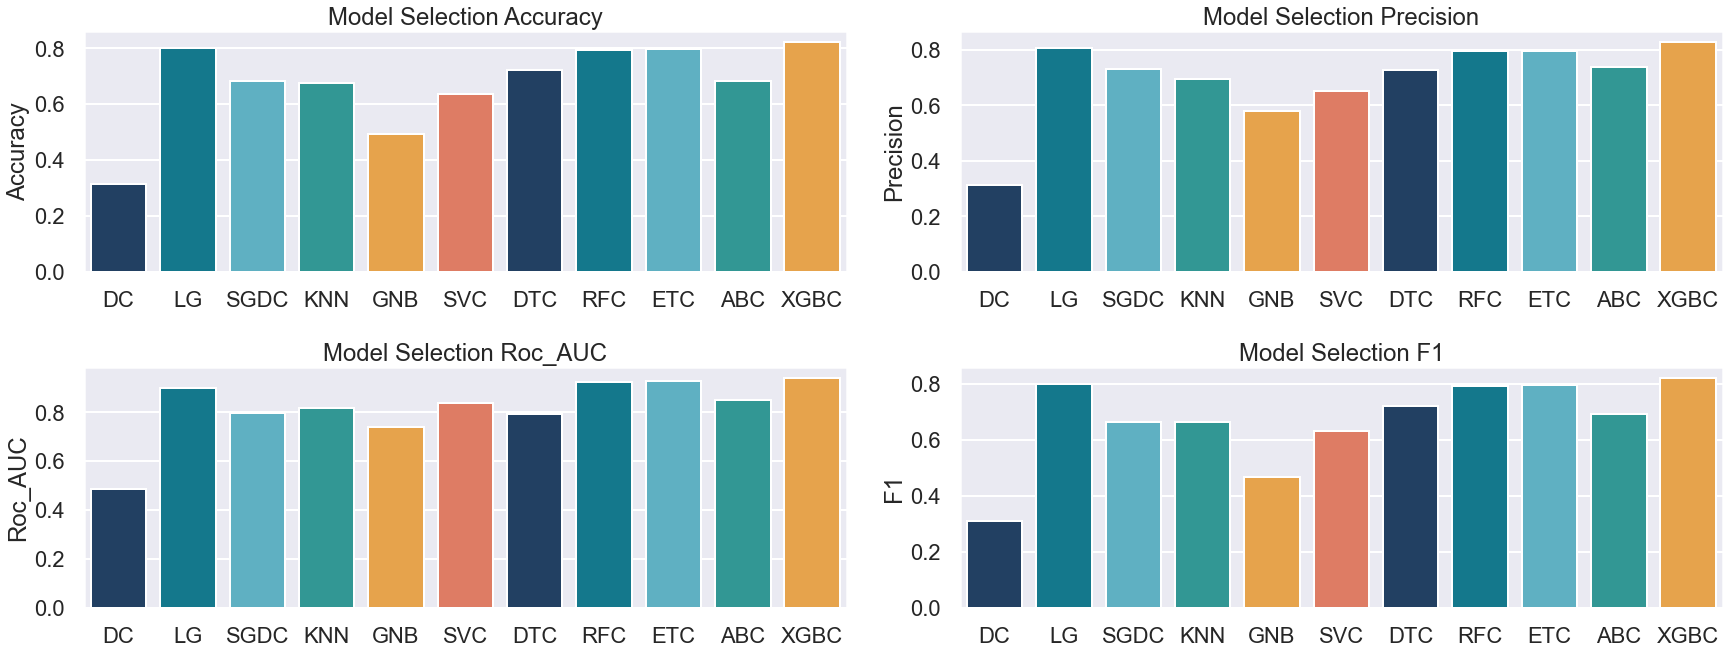

In [77]:
# Plots for Model Selection
f, axes = plt.subplots(2, 2, figsize=(25, 10))
f.tight_layout(pad=2.0)
sns.set_context("poster")

sns.barplot(y=cv_dataframe.Accuracy, x=cv_dataframe.index, ax=axes[0][0], palette=current_palette);
sns.barplot(y=cv_dataframe.Roc_AUC, x=cv_dataframe.index, ax=axes[1][0], palette=current_palette);
sns.barplot(y=cv_dataframe.Precision, x=cv_dataframe.index, ax=axes[0][1], palette=current_palette);
sns.barplot(y=cv_dataframe.F1, x=cv_dataframe.index, ax=axes[1][1], palette=current_palette);

axes[0][0].set_title("Model Selection Accuracy");
axes[1][0].set_title("Model Selection Roc_AUC");
axes[0][1].set_title("Model Selection Precision");
axes[1][1].set_title("Model Selection F1");
plt.savefig('figures/model_selection', transparent=True, dpi=300);

In [78]:
# Print visualisation summary
viz_summary(cv_dataframe.T, metric="Precision")
print(100*"-")
viz_summary(cv_dataframe.T, metric="Roc_AUC")

Precision Value:
DC      0.311852
LG      0.806841
SGDC    0.731693
KNN     0.695773
GNB     0.577337
SVC     0.652413
DTC     0.725386
RFC     0.794577
ETC     0.795441
ABC     0.736695
XGBC    0.826540
Name: Precision, dtype: float64
----------------------------------------
Precision Rank:
DC       1.0
LG      10.0
SGDC     6.0
KNN      4.0
GNB      2.0
SVC      3.0
DTC      5.0
RFC      8.0
ETC      9.0
ABC      7.0
XGBC    11.0
Name: Precision, dtype: float64
----------------------------------------------------------------------------------------------------
Roc_AUC Value:
DC      0.484510
LG      0.899774
SGDC    0.795141
KNN     0.818056
GNB     0.740921
SVC     0.836144
DTC     0.790895
RFC     0.923277
ETC     0.927515
ABC     0.849254
XGBC    0.938541
Name: Roc_AUC, dtype: float64
----------------------------------------
Roc_AUC Rank:
DC       1.0
LG       8.0
SGDC     4.0
KNN      5.0
GNB      2.0
SVC      6.0
DTC      3.0
RFC      9.0
ETC     10.0
ABC      7.0
XGBC    11.0
N

#### with Feature Selection

In [79]:
%%capture

# TOP20 Features Decision Tree Classifier (DTC)
# Create Dictionary for Evaluation results
results_dtc_top20 = {}

# Use model_evaluation function with TOP20 DTC Features Dataset (X_dtc_top20, y_train)
model_evaluation(results_dtc_top20, model_clf, name_model, X_dtc_top20, y_train)


# TOP20 Features Random Forrest Classifier (RFC)
# Create Dictionary for Evaluation results
results_rfc_top20 = {}

# Use model_evaluation function with TOP20 RFC Features Dataset (X_rfc_top20, y_train)
model_evaluation(results_rfc_top20, model_clf, name_model, X_rfc_top20, y_train)


# TOP20 Features Extra Tree Classifier (ETC)
# Create Dictionary for Evaluation results
results_etc_top20 = {}

# Use model_evaluation function with TOP20 ETC Features Dataset (X_etc_top20, y_train)
model_evaluation(results_etc_top20, model_clf, name_model, X_etc_top20, y_train)


# TOP20 Features Ada Boost Classifier (ABC)
# Create Dictionary for Evaluation results
results_abc_top20 = {}

# Use model_evaluation function with TOP20 ABC Features Dataset (X_abc_top20, y_train)
model_evaluation(results_abc_top20, model_clf, name_model, X_abc_top20, y_train)


# TOP20 Features XG Boost Classifier (XGBC)
# Create Dictionary for Evaluation results
results_xgbc_top20 = {}

# Use model_evaluation function with TOP20 XGBC Features Dataset (X_xgbc_tree_top20, y_train)
model_evaluation(results_xgbc_top20, model_clf, name_model, X_xgbc_top20, y_train)


# TOP20 Features Combination of tree-based Classifiers (TBC)
# Create Dictionary for Evaluation results
results_tbc_top20 = {}

# Use model_evaluation function with TOP20 TBC Features Dataset (X_tbc_top20, y_train)
model_evaluation(results_tbc_top20, model_clf, name_model, X_tbc_top20, y_train)


# TOP20 Features Logistic Regression Classifier (LGC)
# Create Dictionary for Evaluation results
results_lgc_top20 = {}

# Use model_evaluation function with TOP20 LGC Features Dataset (X_lgc_top20, y_train)
model_evaluation(results_lgc_top20, model_clf, name_model, X_lgc_top20, y_train)


# TOP20 Features SGD Classifier (SGDC)
# Create Dictionary for Evaluation results
results_sgdc_top20 = {}

# Use model_evaluation function with TOP20 SGDC Features Dataset (X_sgdc_top20, y_train)
model_evaluation(results_sgdc_top20, model_clf, name_model, X_sgdc_top20, y_train)



In [80]:
#create Lists with Labels for Plotting
labels_TOP20 = ["ALL", 
              "TOP20 DTC", 
              "TOP20 RFC", 
              "TOP20 ETC", 
              "TOP20 ABC", 
              "TOP20 XGBC", 
              "TOP20 TBC",
              "TOP20 LGC", 
              "TOP20 SGDC",
             ]

labels_model = name_model

**Precision**

In [81]:
#Create Dataframe with all Results for Precision
results_precision = pd.DataFrame()

#Enter Results
results_precision["ALL"] = pd.DataFrame(results_all).T.Precision
results_precision["TOP20 DTC"] = pd.DataFrame(results_dtc_top20).T.Precision
results_precision["TOP20 RFC"] = pd.DataFrame(results_rfc_top20).T.Precision
results_precision["TOP20 ETC"] = pd.DataFrame(results_etc_top20).T.Precision
results_precision["TOP20 ABC"] = pd.DataFrame(results_abc_top20).T.Precision
results_precision["TOP20 XGBC"] = pd.DataFrame(results_xgbc_top20).T.Precision
results_precision["TOP20 TBC"] = pd.DataFrame(results_tbc_top20).T.Precision
results_precision["TOP20 LGC"] = pd.DataFrame(results_lgc_top20).T.Precision
results_precision["TOP20 SGDC"] = pd.DataFrame(results_sgdc_top20).T.Precision

results_precision

ALL  TOP20 DTC  TOP20 RFC  TOP20 ETC  TOP20 ABC  TOP20 XGBC  \
DC    0.311852   0.311852   0.311852   0.311852   0.311852    0.311852   
LG    0.806841   0.642111   0.761086   0.810344   0.665202    0.726467   
SGDC  0.731693   0.578239   0.330537   0.561763   0.344377    0.614324   
KNN   0.695773   0.552609   0.546844   0.598432   0.554532    0.615322   
GNB   0.577337   0.587520   0.700543   0.723623   0.685453    0.619224   
SVC   0.652413   0.558103   0.474874   0.572313   0.511362    0.608426   
DTC   0.725386   0.809224   0.717261   0.725847   0.691070    0.686450   
RFC   0.794577   0.832794   0.810872   0.811607   0.805619    0.785826   
ETC   0.795441   0.805453   0.785641   0.838065   0.824141    0.815874   
ABC   0.736695   0.716183   0.722896   0.751868   0.744959    0.683748   
XGBC  0.826540   0.812057   0.802039   0.827986   0.802524    0.836268   

      TOP20 TBC  TOP20 LGC  TOP20 SGDC  
DC     0.311852   0.311852    0.311852  
LG     0.784975   0.677567    0.548412  
SGDC   0.506402   0.653548    0.338280  
KNN    0.508836   0.531903    0.533585  
GNB    0.697437   0.564182    0.586607  
SVC    0.429183   0.556402    0.381079  
DTC    0.722454   0.735278    0.585936  
RFC    0.853577   0.704229    0.705466  
ETC    0.852167   0.741509    0.720728  
ABC    0.740508   0.624995    0.646321  
XGBC   0.845058   0.705099    0.682380

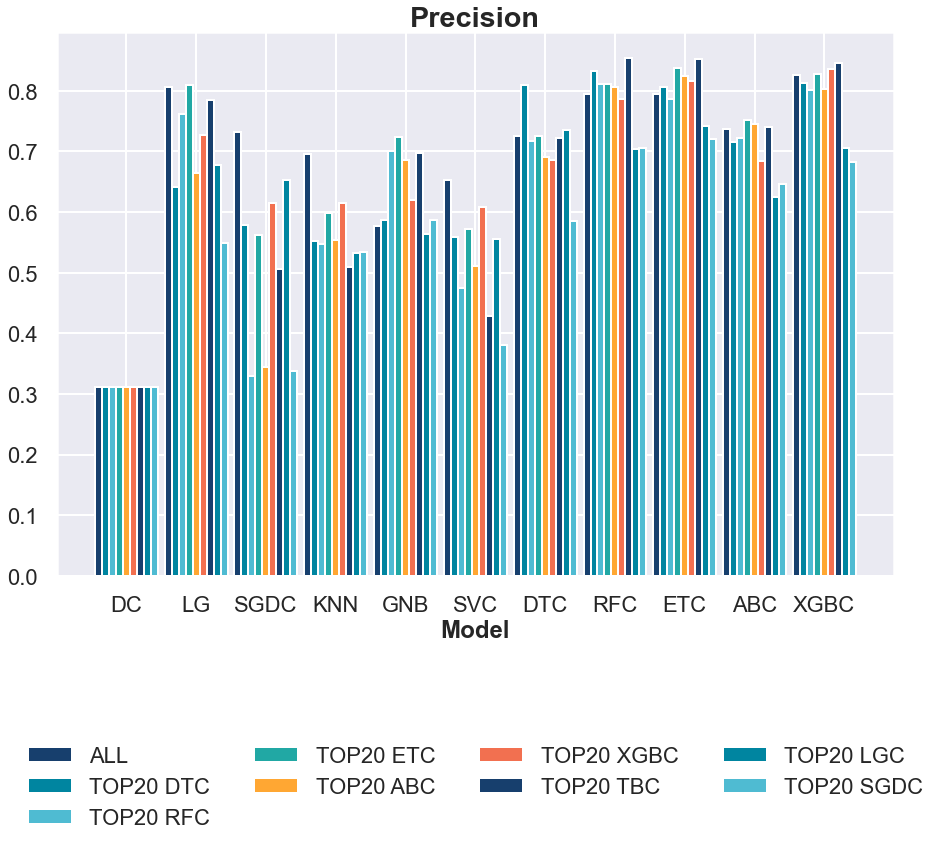

In [82]:
# set height of bars for precision
bars_heights_precision = [results_precision["ALL"]
                            , results_precision["TOP20 DTC"]
                            , results_precision["TOP20 RFC"]
                            , results_precision["TOP20 ETC"]
                            , results_precision["TOP20 ABC"]
                            , results_precision["TOP20 XGBC"]
                            , results_precision["TOP20 TBC"]
                            , results_precision["TOP20 LGC"]
                            , results_precision["TOP20 SGDC"]
                         ]

# set size of figure
plt.figure(figsize=(15,10))
sns.set_context("poster")

# use multibar_plot function to plot
multibar_plot(bars_heights_precision, labels_TOP20, name=labels_model, title="Precision", xlb="Model", save_name='figures/model_combi_precision')

In [83]:
# get the 3 (default n=3) best model + feature selection combinations for Precision using top_model function
top_model(results_precision, n=3)

TOP: 1
Value: 0.8535768751945222
Model: RFC
Feature Selection: TOP20 TBC
-----------------------------------------------------------------
TOP: 2
Value: 0.8521669481189604
Model: ETC
Feature Selection: TOP20 TBC
-----------------------------------------------------------------
TOP: 3
Value: 0.8450581109636837
Model: XGBC
Feature Selection: TOP20 TBC
-----------------------------------------------------------------


**Roc_AUC**

In [84]:
#Create Dataframe with all Results for Roc_AUC
results_Roc_AUC = pd.DataFrame()

#Enter Results
results_Roc_AUC["ALL"] = pd.DataFrame(results_all).T.Roc_AUC
results_Roc_AUC["TOP20 DTC"] = pd.DataFrame(results_dtc_top20).T.Roc_AUC
results_Roc_AUC["TOP20 RFC"] = pd.DataFrame(results_rfc_top20).T.Roc_AUC
results_Roc_AUC["TOP20 ETC"] = pd.DataFrame(results_etc_top20).T.Roc_AUC
results_Roc_AUC["TOP20 ABC"] = pd.DataFrame(results_abc_top20).T.Roc_AUC
results_Roc_AUC["TOP20 XGBC"] = pd.DataFrame(results_xgbc_top20).T.Roc_AUC
results_Roc_AUC["TOP20 TBC"] = pd.DataFrame(results_tbc_top20).T.Roc_AUC
results_Roc_AUC["TOP20 LGC"] = pd.DataFrame(results_lgc_top20).T.Roc_AUC
results_Roc_AUC["TOP20 SGDC"] = pd.DataFrame(results_sgdc_top20).T.Roc_AUC

results_Roc_AUC

ALL  TOP20 DTC  TOP20 RFC  TOP20 ETC  TOP20 ABC  TOP20 XGBC  \
DC    0.484510   0.484510   0.484510   0.484510   0.484510    0.484510   
LG    0.899774   0.819247   0.883612   0.926963   0.801821    0.870015   
SGDC  0.795141   0.580585   0.585984   0.730098   0.536764    0.693096   
KNN   0.818056   0.737050   0.738689   0.744340   0.713394    0.785960   
GNB   0.740921   0.794030   0.818100   0.841149   0.861067    0.815213   
SVC   0.836144   0.725034   0.726979   0.757887   0.678301    0.797995   
DTC   0.790895   0.852326   0.778612   0.793646   0.758503    0.759876   
RFC   0.923277   0.940143   0.918176   0.924408   0.937005    0.926497   
ETC   0.927515   0.930412   0.921157   0.939882   0.937525    0.928925   
ABC   0.849254   0.845308   0.836218   0.859379   0.872299    0.842728   
XGBC  0.938541   0.932206   0.917253   0.927917   0.940873    0.946755   

      TOP20 TBC  TOP20 LGC  TOP20 SGDC  
DC     0.484510   0.484510    0.484510  
LG     0.913544   0.830584    0.724512  
SGDC   0.647457   0.712441    0.584340  
KNN    0.729194   0.705437    0.667217  
GNB    0.853100   0.731444    0.718759  
SVC    0.703413   0.733734    0.601591  
DTC    0.790455   0.792729    0.688029  
RFC    0.949663   0.890428    0.861334  
ETC    0.948435   0.895954    0.872444  
ABC    0.858922   0.792312    0.784133  
XGBC   0.947610   0.882230    0.872111

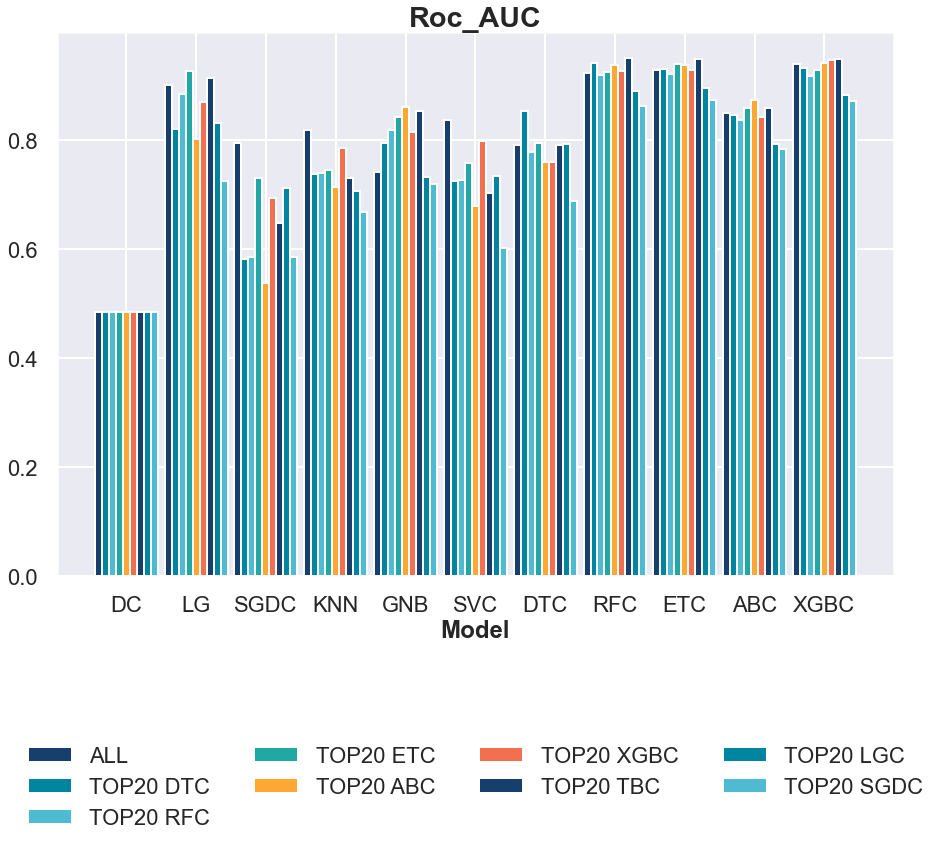

In [85]:
# set height of bars for Roc_AUC
bars_heights_Roc_AUC = [results_Roc_AUC["ALL"]
                            , results_Roc_AUC["TOP20 DTC"]
                            , results_Roc_AUC["TOP20 RFC"]
                            , results_Roc_AUC["TOP20 ETC"]
                            , results_Roc_AUC["TOP20 ABC"]
                            , results_Roc_AUC["TOP20 XGBC"]
                            , results_Roc_AUC["TOP20 TBC"]
                            , results_Roc_AUC["TOP20 LGC"]
                            , results_Roc_AUC["TOP20 SGDC"]
                       ]

# set size of figure
plt.figure(figsize=(15,10))
sns.set_context("poster")

# use multibar_plot function to plot
multibar_plot(bars_heights_Roc_AUC, labels_TOP20, name=labels_model, title="Roc_AUC", xlb="Model", save_name='figures/model_combi_roc_auc')

In [86]:
# get the 3 (default n=3) best model + feature selection combinations for Roc_AUC using top_model function
top_model(results_Roc_AUC, n=3)

TOP: 1
Value: 0.9496629695649303
Model: RFC
Feature Selection: TOP20 TBC
-----------------------------------------------------------------
TOP: 2
Value: 0.9484348278503727
Model: ETC
Feature Selection: TOP20 TBC
-----------------------------------------------------------------
TOP: 3
Value: 0.9476104102510451
Model: XGBC
Feature Selection: TOP20 TBC
-----------------------------------------------------------------


**Accuracy**

In [87]:
#Create Dataframe with all Results for Accuracy
results_accuracy = pd.DataFrame()

#Enter Results
results_accuracy["ALL"] = pd.DataFrame(results_all).T.Accuracy
results_accuracy["TOP20 DTC"] = pd.DataFrame(results_dtc_top20).T.Accuracy
results_accuracy["TOP20 RFC"] = pd.DataFrame(results_rfc_top20).T.Accuracy
results_accuracy["TOP20 ETC"] = pd.DataFrame(results_etc_top20).T.Accuracy
results_accuracy["TOP20 ABC"] = pd.DataFrame(results_abc_top20).T.Accuracy
results_accuracy["TOP20 XGBC"] = pd.DataFrame(results_xgbc_top20).T.Accuracy
results_accuracy["TOP20 TBC"] = pd.DataFrame(results_tbc_top20).T.Accuracy
results_accuracy["TOP20 LGC"] = pd.DataFrame(results_lgc_top20).T.Accuracy
results_accuracy["TOP20 SGDC"] = pd.DataFrame(results_sgdc_top20).T.Accuracy

results_accuracy

ALL  TOP20 DTC  TOP20 RFC  TOP20 ETC  TOP20 ABC  TOP20 XGBC  \
DC    0.312500   0.312500   0.312500   0.312500   0.312500    0.312500   
LG    0.800000   0.633333   0.754167   0.808333   0.662500    0.720833   
SGDC  0.683333   0.504167   0.408333   0.537500   0.429167    0.529167   
KNN   0.675000   0.550000   0.541667   0.591667   0.541667    0.612500   
GNB   0.491667   0.575000   0.670833   0.704167   0.670833    0.595833   
SVC   0.637500   0.550000   0.475000   0.554167   0.470833    0.595833   
DTC   0.720833   0.804167   0.704167   0.725000   0.679167    0.679167   
RFC   0.791667   0.829167   0.804167   0.812500   0.808333    0.783333   
ETC   0.795833   0.800000   0.783333   0.837500   0.825000    0.808333   
ABC   0.683333   0.695833   0.695833   0.725000   0.700000    0.658333   
XGBC  0.820833   0.804167   0.800000   0.829167   0.804167    0.837500   

      TOP20 TBC  TOP20 LGC  TOP20 SGDC  
DC     0.312500   0.312500    0.312500  
LG     0.779167   0.662500    0.533333  
SGDC   0.479167   0.575000    0.383333  
KNN    0.516667   0.525000    0.516667  
GNB    0.691667   0.520833    0.487500  
SVC    0.491667   0.529167    0.391667  
DTC    0.720833   0.725000    0.583333  
RFC    0.850000   0.704167    0.700000  
ETC    0.850000   0.741667    0.720833  
ABC    0.712500   0.625000    0.645833  
XGBC   0.841667   0.700000    0.679167

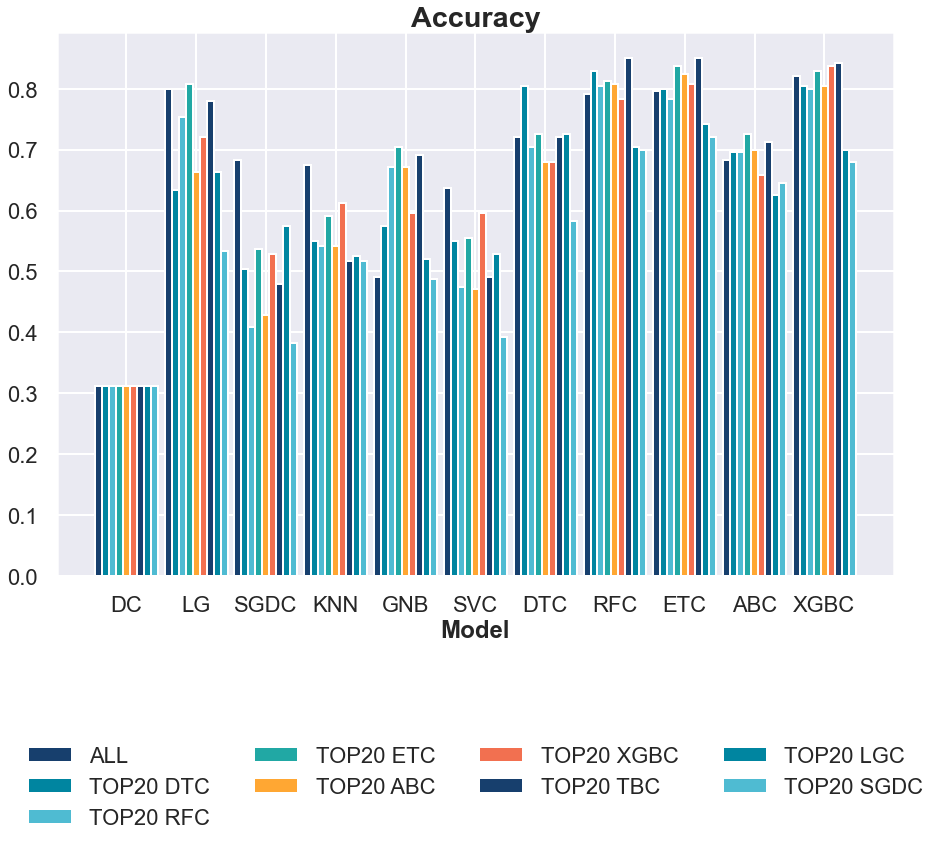

In [88]:
# set height of bars for accuracy
bars_heights_accuracy = [results_accuracy["ALL"]
                            , results_accuracy["TOP20 DTC"]
                            , results_accuracy["TOP20 RFC"]
                            , results_accuracy["TOP20 ETC"]
                            , results_accuracy["TOP20 ABC"]
                            , results_accuracy["TOP20 XGBC"]
                            , results_accuracy["TOP20 TBC"]
                            , results_accuracy["TOP20 LGC"]
                            , results_accuracy["TOP20 SGDC"]
                        ]

# set size of figure
plt.figure(figsize=(15,10))
sns.set_context("poster")

# use multibar_plot function to plot
multibar_plot(bars_heights_accuracy, labels_TOP20, name=labels_model, title="Accuracy", xlb="Model", save_name='figures/model_combi_accuracy')

In [89]:
# get the 3 (default n=3) best model + feature selection combinations for Accuracy using top_model function
top_model(results_accuracy, n=3)

# here RFC + TOP20 TBC has exactly the same value as ETC + TOP20 TBC. That´s why it is displayed 2 times

TOP: 1
Value: 0.85
Model: RFC
Feature Selection: TOP20 TBC
-----------------------------------------------------------------
TOP: 2
Value: 0.85
Model: RFC
Feature Selection: TOP20 TBC
-----------------------------------------------------------------
TOP: 3
Value: 0.8416666666666666
Model: XGBC
Feature Selection: TOP20 TBC
-----------------------------------------------------------------


**F1**

In [90]:
#Create Dataframe with all Results for F1
results_F1 = pd.DataFrame()

#Enter Results
results_F1["ALL"] = pd.DataFrame(results_all).T.F1
results_F1["TOP20 DTC"] = pd.DataFrame(results_dtc_top20).T.F1
results_F1["TOP20 RFC"] = pd.DataFrame(results_rfc_top20).T.F1
results_F1["TOP20 ETC"] = pd.DataFrame(results_etc_top20).T.F1
results_F1["TOP20 ABC"] = pd.DataFrame(results_abc_top20).T.F1
results_F1["TOP20 XGBC"] = pd.DataFrame(results_xgbc_top20).T.F1
results_F1["TOP20 TBC"] = pd.DataFrame(results_tbc_top20).T.F1
results_F1["TOP20 LGC"] = pd.DataFrame(results_lgc_top20).T.F1
results_F1["TOP20 SGDC"] = pd.DataFrame(results_sgdc_top20).T.F1

results_F1

ALL  TOP20 DTC  TOP20 RFC  TOP20 ETC  TOP20 ABC  TOP20 XGBC  \
DC    0.310899   0.310899   0.310899   0.310899   0.310899    0.310899   
LG    0.798002   0.625913   0.752095   0.805858   0.654171    0.719681   
SGDC  0.663334   0.476090   0.321651   0.483600   0.302486    0.476106   
KNN   0.662997   0.540161   0.537725   0.581729   0.531154    0.608354   
GNB   0.466697   0.563538   0.670855   0.705992   0.665966    0.585633   
SVC   0.630193   0.523338   0.446015   0.519791   0.394120    0.582488   
DTC   0.719283   0.803452   0.703961   0.717629   0.677656    0.677459   
RFC   0.792619   0.829099   0.802433   0.809822   0.801904    0.782241   
ETC   0.795604   0.798112   0.781252   0.834932   0.818551    0.810148   
ABC   0.692196   0.698045   0.694652   0.728457   0.705863    0.662798   
XGBC  0.819798   0.806128   0.798148   0.827022   0.798917    0.835850   

      TOP20 TBC  TOP20 LGC  TOP20 SGDC  
DC     0.310899   0.310899    0.310899  
LG     0.780164   0.664948    0.536111  
SGDC   0.410925   0.525715    0.300407  
KNN    0.498267   0.512953    0.509874  
GNB    0.683199   0.510728    0.466803  
SVC    0.419735   0.514140    0.361719  
DTC    0.719771   0.722411    0.580417  
RFC    0.849879   0.701182    0.699588  
ETC    0.848707   0.735578    0.720121  
ABC    0.718753   0.614091    0.639550  
XGBC   0.841408   0.699555    0.677293

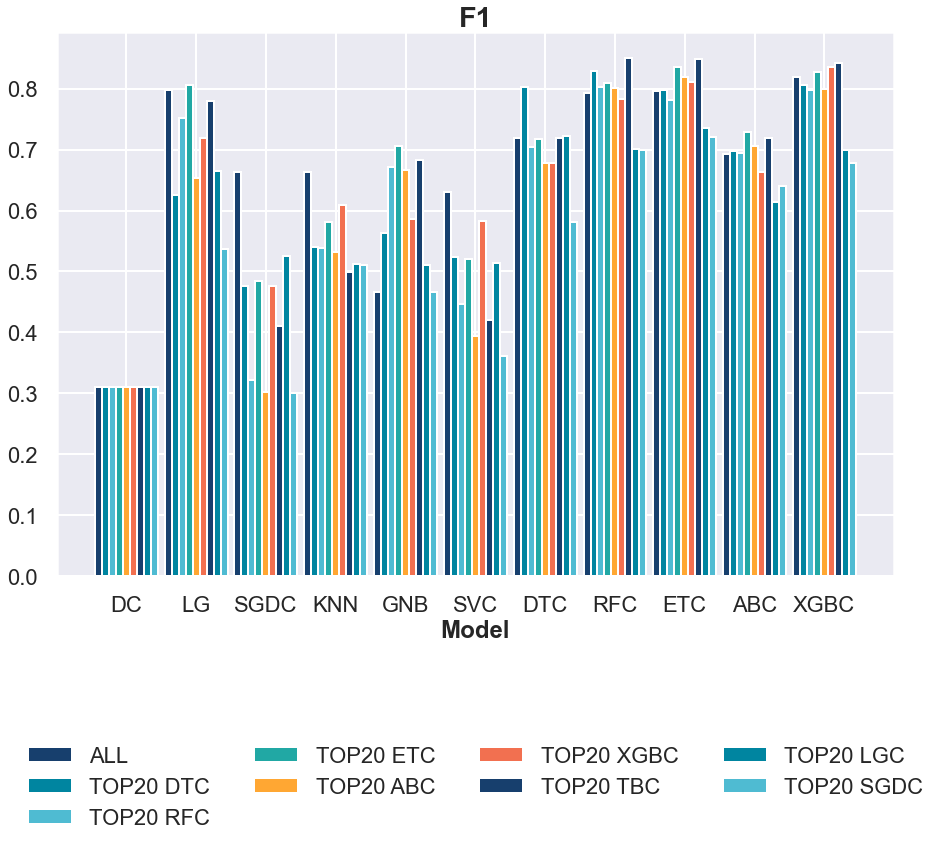

In [91]:
# set height of bars for F1
bars_heights_F1 = [results_F1["ALL"]
                            , results_F1["TOP20 DTC"]
                            , results_F1["TOP20 RFC"]
                            , results_F1["TOP20 ETC"]
                            , results_F1["TOP20 ABC"]
                            , results_F1["TOP20 XGBC"]
                            , results_F1["TOP20 TBC"]
                            , results_F1["TOP20 LGC"]
                            , results_F1["TOP20 SGDC"]
                  
                  ]

# set size of figure
plt.figure(figsize=(15,10))
sns.set_context("poster")

# use multibar_plot function to plot
multibar_plot(bars_heights_F1, labels_TOP20, name=labels_model, title="F1", xlb="Model", save_name='figures/model_combi_f1')

In [92]:
# get the 3 (default n=3) best model + feature selection combinations for F1 using top_model function
top_model(results_F1, n=3)

TOP: 1
Value: 0.8498791431193189
Model: RFC
Feature Selection: TOP20 TBC
-----------------------------------------------------------------
TOP: 2
Value: 0.8487071055287373
Model: ETC
Feature Selection: TOP20 TBC
-----------------------------------------------------------------
TOP: 3
Value: 0.8414080065963422
Model: XGBC
Feature Selection: TOP20 TBC
-----------------------------------------------------------------


#### Summary

- the best models without Feature Selection are XG Boost Classifier (XGBC; Rank 1; Precision: 0.8275, Roc AUC: 0.9385), Extra Tees Classifier (ETC; Rank 2; Precision: 0.7954, Roc AUC: 0.9275) and Random Forest Classifier (RFC; Rank 3; Precision: 0.7945, Roc AUC: 0.9233)  
- the best Feature Selection for Precision and Roc AUC is the TOP20 Combination of tree-based Classifier (TOP20 TBC)
- The best models with Feature Selection are RFC (Rank 1, Precision: 0.8536, Roc AUC: 0.9497), ETC (Rank 2, Precision: 0.8522, Roc AUC: 0.9484) and XGBC (Rank 3, Precision: 0.8451, Roc AUC: 0.9476)
- In general the models with feature selection demonstrate better precision scores and Roc AUC performance.
- If the data is scaled with the StandardScaler the best result is demonstrated by the Logistic Regression Classifier without feature selection (not shown here; LG + ALL; Precision: 0.8859, Roc AUC: 0.9561), whereas the values for RFC, ETC and XGBC remain the same.
- Because using all features isn´t consistent with the project goal using maximum 20 miRNA LG + ALL is excluded to be choosen. As the metric scores for the other models remain unchanged with or without scaling, I decided not to use unscaled data.

### Model Optimization

Now that I know which Feature Selection in combination with which classification model performs best, I try to **optimize on the chosen metric precision** (described above). As the ranking might change I use the TOP3 models (RFC, ETC, XGBC) in combination with the Feature Selection of TOP20 Combination of tree-based Classifier (TOP20 TBC) for further optimization.

#### Optimization of parameters with Random Search & Grid Search

As the the whole Random Search and Grid Search process takes approxemately 8 hours to compute, I decided to outsource this part of code to a seperate notebook.

I always include the default values of the models in the hyperparameter grid in case this would be already the best conditions for my dataset. In this way it is also easier to compare with the unoptimized model.

First I perform a Randomized Search to check a broad range of model parameters. This search method is quick by using only random combinations and no cross-validation limited to 500 fits. In this way I can narrow down the parameters for a more detailed optimization.

After narrowing down the model parameters with Randomized Search, I can use the reduced set for the more exact method GridSearchCV. This algorithm uses all possible parameters and evaluates them in detail with cross-validation not limited to a number of fits. In that way the best parameters are optimized on precision.

In [93]:
# With TOP20 TBC as the chosen feature selection create a new X_test

# use dataframe_selection function for creating new dataframe
X_tbc_top20_test = dataframe_selection(results_TBC["TBC"], X_train=X_test)

In [94]:
# Save all necessary dataframes 
# for Random Search and Grid Search to be used in seperate notebook
X_tbc_top20.to_pickle("data/X_tbc_top20") 
y_train.to_pickle("data/y_train") 
X_tbc_top20_test.to_pickle("data/X_tbc_top20_test") 
y_test.to_pickle("data/y_test")

In [95]:
# to continue with Data from Random Search and Grid Search notebook
# load results_opt dictionary from results_opt.p file as results_opt_new
with open('data/results_opt.p', 'rb') as fp:
    results_opt_new = pickle.load(fp)

In [96]:
#create dataframe with results_optimization
results_optimization = pd.DataFrame(results_opt_new)
results_optimization

RFC_UnOpt   RFC_Opt  ETC_UnOpt   ETC_Opt  XGBC_UnOpt  XGBC_Opt
Accuracy    0.833333  0.833333   0.866667  0.866667    0.900000  0.833333
Roc_AUC     0.980113  0.986216   0.984742  0.981761    0.987829  0.987654
Precision   0.833333  0.833333   0.866667  0.866667    0.900000  0.833333
F1          0.833333  0.833333   0.866667  0.866667    0.900000  0.833333

In [97]:
#create Lists with Labels for Plotting
labels_opt = ["RFC_UnOpt", 
              "RFC_Opt", 
              "ETC_UnOpt", 
              "ETC_Opt",
              "XGBC_UnOpt",
              "XGBC_Opt",
             ]

labels_metric = ["Accuracy", 
              "Roc_AUC", 
              "Precision",
              "F1",
             ]

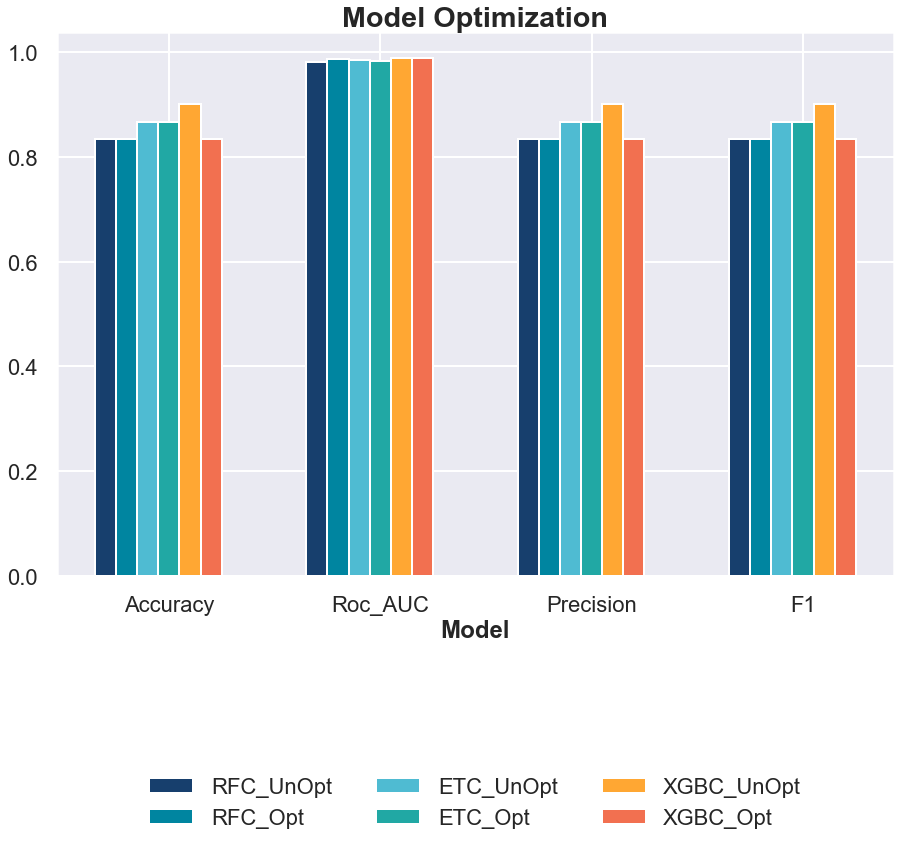

In [98]:
# set height of bars for Un-/ and Optimized Model
bars_heights_optimization = [results_optimization["RFC_UnOpt"]
                            , results_optimization["RFC_Opt"]
                            , results_optimization["ETC_UnOpt"]
                            , results_optimization["ETC_Opt"]
                            , results_optimization["XGBC_UnOpt"]
                            , results_optimization["XGBC_Opt"]
                         ]
# set size of figure
plt.figure(figsize=(15,10))
sns.set_context("poster")

# use multibar_plot function to plot
multibar_plot(bars_heights_optimization, labels_opt, name=labels_metric, title="Model Optimization", xlb="Model", save_name='figures/model_optimization')

In [99]:
# Print visualisation summary
viz_summary(results_optimization, metric="Roc_AUC")

Roc_AUC Value:
RFC_UnOpt     0.980113
RFC_Opt       0.986216
ETC_UnOpt     0.984742
ETC_Opt       0.981761
XGBC_UnOpt    0.987829
XGBC_Opt      0.987654
Name: Roc_AUC, dtype: float64
----------------------------------------
Roc_AUC Rank:
RFC_UnOpt     1.0
RFC_Opt       4.0
ETC_UnOpt     3.0
ETC_Opt       2.0
XGBC_UnOpt    6.0
XGBC_Opt      5.0
Name: Roc_AUC, dtype: float64


##### Summary

After I optimized all models on precision the best way to compare their performance is by their Roc AUC score.

As the Roc (receiver operating characteristics) curve of a model is the plot of the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings, this is a measure for  the overall performance of a model independent from threshold settings. For better comparision the area under the curve (AUC) is used. The bigger the better the performance.

The best Roc_AUC is demonstrated by the unoptimzed XG Boost Classifier (XGBC_UnOpt; Roc_AUC: 0.987829, Rank = 6.0), followed by the optimized XG Boost Classifier (XGBC_Opt; Roc_AUC: 0.987654, Rank = 5.0).

Even if the unoptimized model XGBC_UnOpt shows better performance than the optimized model XGBC_Opt, the "true top model" is XGBC_Opt. The reason is that during the optimization process with GridSearchCV the model is cross-validated which should prevent overfitting. The data of XGBC_UnOpt wasn´t evaluated by cross-validation and might perform only better because of overfitting the data. Also I included the default parameters used by the unoptimized model in the GridSearchCV and theses resulted a worse score with cross-validation as not choosen from the algorithm as the best model parameters.

### Ensemble Stacking & Voting

Another method to improve the metric scores is to combine several models ("weak learners") to one better performing model ("strong learner"). Ensembling the models can be done by stacking or voting. I try both methods to further improve the models.

In [100]:
%%capture

# Initializing optimized Classifier Models and Meta Classifier

RFC_stack = RandomForestClassifier(bootstrap=True,
                                   ccp_alpha=0.0,
                                   class_weight=None,
                                   criterion='entropy',
                                   max_depth=9,
                                   max_features='log2',
                                   max_leaf_nodes=None,
                                   max_samples=None,
                                   min_impurity_decrease=0.0,
                                   min_impurity_split=None,
                                   min_samples_leaf=1,
                                   min_samples_split=3,
                                   min_weight_fraction_leaf=0.0,
                                   n_estimators=1350,
                                   n_jobs=-1,
                                   oob_score=False, 
                                   random_state=seed,
                                   verbose=0,
                                   warm_start=False)

ETC_stack = ExtraTreesClassifier(bootstrap=False,
                                 ccp_alpha=0.0,
                                 class_weight=None,
                                 criterion='entropy',
                                 max_depth=25,
                                 max_features='log2',
                                 max_leaf_nodes=None,
                                 max_samples=None,
                                 min_impurity_decrease=0.0,
                                 min_impurity_split=None,
                                 min_samples_leaf=1,
                                 min_samples_split=4,
                                 min_weight_fraction_leaf=0.0,
                                 n_estimators=350,
                                 n_jobs=-1,
                                 oob_score=False, 
                                 random_state=seed,
                                 verbose=0,
                                 warm_start=False)

XGBC_stack = XGBClassifier(base_score=0.5, 
                           booster='gbtree', 
                           colsample_bylevel=1, 
                           colsample_bynode=1, 
                           colsample_bytree=0.45, 
                           gamma=0, 
                           learning_rate=0.0075, 
                           max_delta_step=0, 
                           max_depth=31, 
                           min_child_weight=1, 
                           missing=None, 
                           n_estimators=225, 
                           n_jobs=-1, 
                           nthread=None, 
                           objective='multi:softprob', 
                           random_state=seed, 
                           reg_alpha=0, 
                           reg_lambda=1, 
                           scale_pos_weight=1, 
                           seed=None, 
                           silent=None, 
                           subsample=0.88, 
                           verbosity=1,
                           num_class=3) #num_class has to be added here manually for visualisation of precision recall curve

meta_classifier = LogisticRegression(random_state=seed)

# Building Stacking Classifier
SCLF = StackingCVClassifier(classifiers=[RFC_stack, ETC_stack, XGBC_stack],
                          meta_classifier=meta_classifier, random_state=seed)

# Building Ensemble Vote Classifier
EVCLF = EnsembleVoteClassifier(clfs=[RFC_stack, ETC_stack, XGBC_stack], voting='hard', weights=None, refit=True)

# List for models to be evaluated (Single vs. Stacked)
model_stack = [RFC_stack, ETC_stack, XGBC_stack, SCLF, EVCLF]

# List for model names
name_stack = ["RFC_Opt", "ETC_Opt", "XGBC_Opt", "SCLF", "EVCLF"]

# Create Dictionary for Evaluation results
results_stacking = {}

# Use model_evaluation function with TOP20 TBC Features Dataset (X_tbc_top20, y_train)
model_evaluation(results_stacking, model_stack, name_stack, X_tbc_top20, y_train)

In [101]:
#create dataframe with results_optimization
results_stack = pd.DataFrame(results_stacking)
results_stack

RFC_Opt   ETC_Opt  XGBC_Opt      SCLF     EVCLF
Accuracy   0.870833  0.875000  0.870833  0.875000  0.870833
Roc_AUC    0.948446  0.948855  0.949728  0.923440  0.952963
Precision  0.876573  0.878085  0.875570  0.879405  0.873980
F1         0.872234  0.875671  0.872261  0.876280  0.871609

In [102]:
#create Lists with Labels for Plotting
labels_stack = ["RFC_Opt",  
              "ETC_Opt",
              "XGBC_Opt",
              "SCLF",
              "EVCLF"
             ]

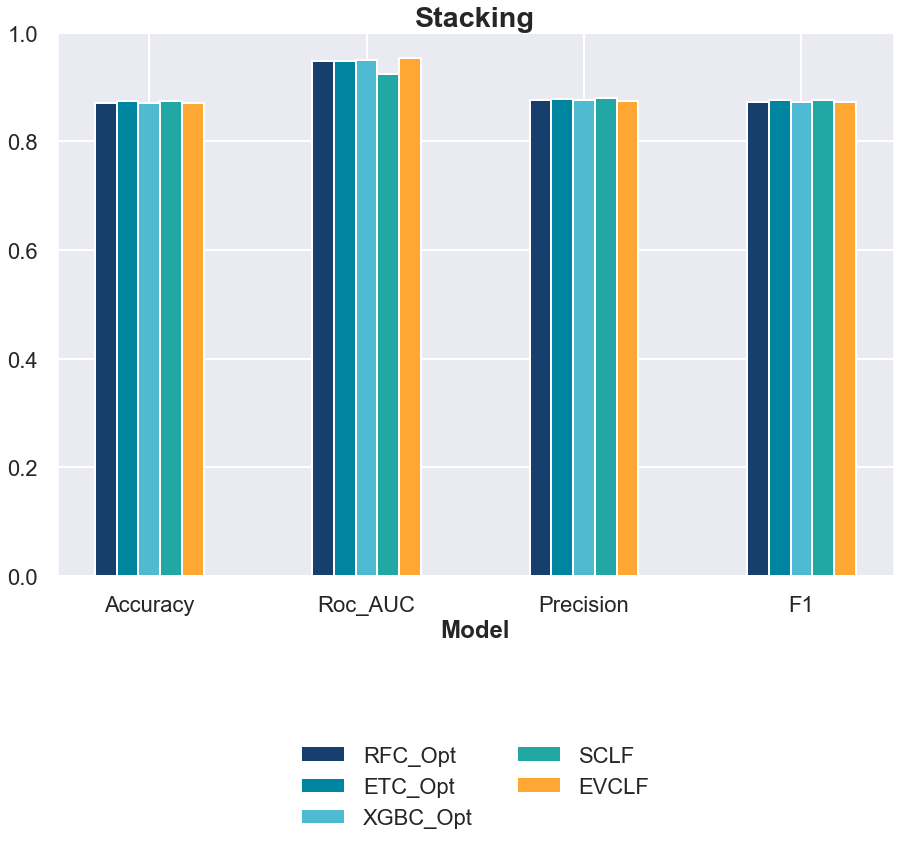

In [103]:
# set height of bars for Un-/ and stacked Model
bars_heights_stack = [results_stack["RFC_Opt"]
                            , results_stack["ETC_Opt"]
                            , results_stack["XGBC_Opt"]
                            , results_stack["SCLF"]
                            , results_stack["EVCLF"]
                         ]

# set size of figure
plt.figure(figsize=(15,10))
sns.set_context("poster")

# use multibar_plot function to plot
multibar_plot(bars_heights_stack, labels_stack, name=labels_metric, title="Stacking", xlb="Model", save_name='figures/model_stacking')

In [104]:
# Print visualisation summary
viz_summary(results_stack, metric="Roc_AUC")

Roc_AUC Value:
RFC_Opt     0.948446
ETC_Opt     0.948855
XGBC_Opt    0.949728
SCLF        0.923440
EVCLF       0.952963
Name: Roc_AUC, dtype: float64
----------------------------------------
Roc_AUC Rank:
RFC_Opt     2.0
ETC_Opt     3.0
XGBC_Opt    4.0
SCLF        1.0
EVCLF       5.0
Name: Roc_AUC, dtype: float64


#### Summary

- The Ensemble Vote Classifier (EVCLF) demonstrates the highest performance (Rank: 5.0, Roc_AUC: 0.952963), the Stacking Classifier (SCLF) the lowest (Rank: 1.0, Roc_AUC: 0.923440).

### Feature Reduction

Now that I optimized my model with 20 miRNA (features), which was the maximum conditions for the development of the biochip, I am theoretically finished reaching my project goal.

But I would like to reduce the number of miRNA as far as possible within the given range (10 to 20 miRNA) with this conditions trying not to loose to much performance. This makes sense as with less miRNAs to test with the final system time and money can be saved. Again I focus on precision as this is still the chosen metric.

Because the stacked model algorithm doesn´t posses coef_ or feature_importances_ attributes, I will performe a recursive feature elimination "by hand". From the Feature Selection step I already know the importances of my TOP20 features, so I will remove those in order from the least to the most important feature and compare the model performances.

In [105]:
%%capture

# First create a list of Features from Feature Selection Results TBC
feature_reduction = [feature_name[0] for feature_name in results_TBC["TBC"]]

# List with model used in Feature Reduction (Top Model)
model_reduction = [EVCLF]

# List for names of reduced dataframes
name_reduce = ["TOP20", 
                  "TOP19_hsa-let-7f-1-3p", 
                  "TOP18_hsa-miR-4281",
                  "TOP17_hsa-miR-320c",
                  "TOP16_hsa-miR-924",
                  "TOP15_hsa-miR-4261",
                  "TOP14_hsa-miR-1305",
                  "TOP13_hsa-miR-3152-3p",
                  "TOP12_hsa-miR-4258",
                  "TOP11_hsa-miR-1255b-5p",
                  "TOP10_hsa-let-7b-5p"]

# Create Dictionary for Reduction results
results_reduction = {}

# create list for used features (only for debugging)
elim_features = []

# use feature reduce function
feature_reduce(results_reduction, model_reduction, name_reduce, feature_reduction, elim_features, X_train=X_train, y_train=y_train)

In [106]:
#create dataframe with results_reduction
results_red = pd.DataFrame(results_reduction)
results_red

TOP20  TOP19_hsa-let-7f-1-3p  TOP18_hsa-miR-4281  \
Accuracy   0.870833               0.854167            0.862500   
Roc_AUC    0.952963               0.952255            0.949898   
Precision  0.873980               0.857121            0.865586   
F1         0.871609               0.854332            0.862120   

           TOP17_hsa-miR-320c  TOP16_hsa-miR-924  TOP15_hsa-miR-4261  \
Accuracy             0.854167           0.854167            0.845833   
Roc_AUC              0.948197           0.945844            0.943769   
Precision            0.857124           0.857365            0.848526   
F1                   0.854127           0.853530            0.844342   

           TOP14_hsa-miR-1305  TOP13_hsa-miR-3152-3p  TOP12_hsa-miR-4258  \
Accuracy             0.862500               0.820833            0.833333   
Roc_AUC              0.947222               0.940795            0.942819   
Precision            0.865306               0.823942            0.833958   
F1                   0.861757               0.819155            0.831391   

           TOP11_hsa-miR-1255b-5p  TOP10_hsa-let-7b-5p  
Accuracy                 0.816667             0.808333  
Roc_AUC                  0.940392             0.938647  
Precision                0.821668             0.813575  
F1                       0.815647             0.808135

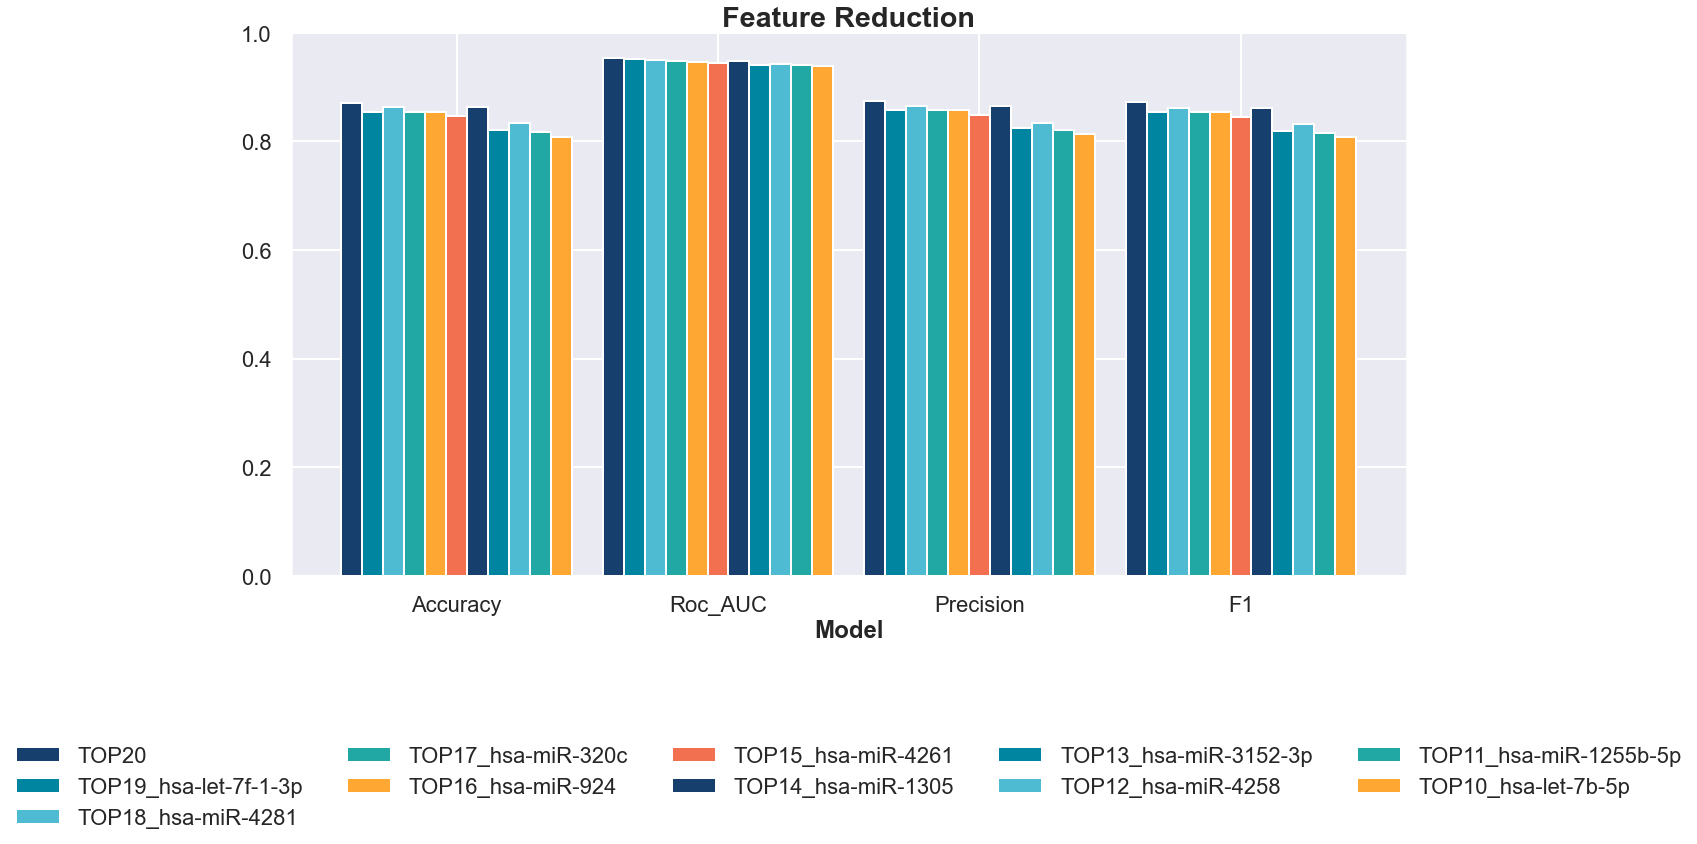

In [107]:
# set height of bars for Model with reduced Features
bars_heights_reduction = [results_red["TOP20"]
                            , results_red["TOP19_hsa-let-7f-1-3p"]
                            , results_red["TOP18_hsa-miR-4281"]
                            , results_red["TOP17_hsa-miR-320c"]
                            , results_red["TOP16_hsa-miR-924"]
                            , results_red["TOP15_hsa-miR-4261"]
                            , results_red["TOP14_hsa-miR-1305"]
                            , results_red["TOP13_hsa-miR-3152-3p"]
                            , results_red["TOP12_hsa-miR-4258"]
                            , results_red["TOP11_hsa-miR-1255b-5p"]
                            , results_red["TOP10_hsa-let-7b-5p"]
                         ]

# name_reduce was created before

# set size of figure
plt.figure(figsize=(20,10))
sns.set_context("poster")

# use multibar_plot function to plot
multibar_plot(bars_heights_reduction, name_reduce, name=labels_metric, title="Feature Reduction", xlb="Model", save_name='figures/feature_reduction', barWidth = 0.08)

In [108]:
# Print visualisation summary
viz_summary(results_red, metric="Precision")

Precision Value:
TOP20                     0.873980
TOP19_hsa-let-7f-1-3p     0.857121
TOP18_hsa-miR-4281        0.865586
TOP17_hsa-miR-320c        0.857124
TOP16_hsa-miR-924         0.857365
TOP15_hsa-miR-4261        0.848526
TOP14_hsa-miR-1305        0.865306
TOP13_hsa-miR-3152-3p     0.823942
TOP12_hsa-miR-4258        0.833958
TOP11_hsa-miR-1255b-5p    0.821668
TOP10_hsa-let-7b-5p       0.813575
Name: Precision, dtype: float64
----------------------------------------
Precision Rank:
TOP20                     11.0
TOP19_hsa-let-7f-1-3p      6.0
TOP18_hsa-miR-4281        10.0
TOP17_hsa-miR-320c         7.0
TOP16_hsa-miR-924          8.0
TOP15_hsa-miR-4261         5.0
TOP14_hsa-miR-1305         9.0
TOP13_hsa-miR-3152-3p      3.0
TOP12_hsa-miR-4258         4.0
TOP11_hsa-miR-1255b-5p     2.0
TOP10_hsa-let-7b-5p        1.0
Name: Precision, dtype: float64


In [109]:
# calculating Precision Difference between TOP20 and TOP14 in percent
Precision_diff = (results_red["TOP20"] - results_red["TOP14_hsa-miR-1305"]).T.Precision
print("Precision difference:", round(Precision_diff*100, 3), "%")

Precision difference: 0.867 %


#### Summary

The results show that TOP14 has the third highest rank for precision (Rank 9, Precision: 0.865306) with an loss in precision by 0.867% compared to the best result (TOP20). I think this is a fair trade-off between precision and number of features. Therefore I consider this as the optimum (not best) conditions for the biochip test. Further I want to evaluate this TOP14 also as possible option.

In [110]:
# Initializing a new dictionary for TOP14 
TOP14_dict = {}

# using TOP_n_from function to built a TOP14 dictionary from the TOP20
TOP_n_from(TOP14_dict, feature_reduction, n=14)

### Including Annotation

Now that we have a best model and a optimum model set-up, I would also like to check if I can improve the models considering the annotation data compared to the previous results. As already mentioned some annotation data make more sense as "Sex" or "Age" wheras "Smoke" less. 

In [111]:
# include results for best Model with TOP20 and TOP14 to the results_anno dictionary!

# get best Model Values
EVCLF_TOP20 = dict(results_stack.get("EVCLF"))
EVCLF_TOP14 = results_reduction.get('TOP14_hsa-miR-1305')

# Create Dictionary for Results of Annotation augmentation
results_anno = {}

# write best model values to the dictionary
results_anno["EVCLF_TOP20"] = EVCLF_TOP20
results_anno["EVCLF_TOP14"] = EVCLF_TOP14

#### Sex

In [112]:
# use dataframe_selection function for creating new dataframe with TOP20
X_sex_top20 = dataframe_selection(results_TBC["TBC"], X_train=X_sex_train)

In [113]:
# use dataframe_selection function for creating new dataframe with TOP14
X_sex_top14 = dataframe_selection(TOP14_dict["TOP14"], X_train=X_sex_train)

In [114]:
%%capture

# List with model used (Top Model)
Top_Model = [EVCLF]

# List with model name
Top_Model_name = ["EVCLF_TOP20+SEX"]

# Use model_evaluation function with TOP20 Features Dataset (X_sex_top20, y_sex_train)
model_evaluation(results_anno, Top_Model, Top_Model_name, X_sex_top20, y_sex_train)

In [115]:
%%capture

# List with model name
Top_Model_name = ["EVCLF_TOP14+SEX"]

# Use model_evaluation function with TOP20 Features Dataset (X_sex_top20, y_sex_train)
model_evaluation(results_anno, Top_Model, Top_Model_name, X_sex_top14, y_sex_train)

#### Age

In [116]:
# use dataframe_selection function for creating new dataframe with TOP20
X_age_top20 = dataframe_selection(results_TBC["TBC"], X_train=X_age_train)

In [117]:
# use dataframe_selection function for creating new dataframe with TOP14
X_age_top14 = dataframe_selection(TOP14_dict["TOP14"], X_train=X_age_train)

In [118]:
%%capture

# List with model used (Top Model)
Top_Model = [EVCLF]

# List with model name
Top_Model_name = ["EVCLF_TOP20+AGE"]

# Use model_evaluation function with TOP20 Features Dataset (X_sex_top20, y_sex_train)
model_evaluation(results_anno, Top_Model, Top_Model_name, X_age_top20, y_age_train)

In [119]:
%%capture

# List with model name
Top_Model_name = ["EVCLF_TOP14+AGE"]

# Use model_evaluation function with TOP20 Features Dataset (X_sex_top20, y_sex_train)
model_evaluation(results_anno, Top_Model, Top_Model_name, X_age_top14, y_age_train)

#### Sex + Age

In [120]:
# use dataframe_selection function for creating new dataframe with TOP20
X_sexage_top20 = dataframe_selection(results_TBC["TBC"], X_train=X_sexage_train)

In [121]:
# use dataframe_selection function for creating new dataframe with TOP14
X_sexage_top14 = dataframe_selection(TOP14_dict["TOP14"], X_train=X_sexage_train)

In [122]:
%%capture

# List with model used (Top Model)
Top_Model = [EVCLF]

# List with model name
Top_Model_name = ["EVCLF_TOP20+SEX+AGE"]

# Use model_evaluation function with TOP20 Features Dataset (X_sex_top20, y_sex_train)
model_evaluation(results_anno, Top_Model, Top_Model_name, X_sexage_top20, y_sexage_train)

In [123]:
%%capture

# List with model name
Top_Model_name = ["EVCLF_TOP14+SEX+AGE"]

# Use model_evaluation function with TOP20 Features Dataset (X_sex_top20, y_sex_train)
model_evaluation(results_anno, Top_Model, Top_Model_name, X_sexage_top14, y_sexage_train)

#### Smoke

In [124]:
# use dataframe_selection function for creating new dataframe with TOP20
X_smoke_top20 = dataframe_selection(results_TBC["TBC"], X_train=X_smoke_train)

In [125]:
# use dataframe_selection function for creating new dataframe with TOP14
X_smoke_top14 = dataframe_selection(TOP14_dict["TOP14"], X_train=X_smoke_train)

In [126]:
%%capture

# List with model used (Top Model)
Top_Model = [EVCLF]

# List with model name
Top_Model_name = ["EVCLF_TOP20+SMOKE"]

# Use model_evaluation function with TOP20 Features Dataset (X_sex_top20, y_sex_train)
model_evaluation(results_anno, Top_Model, Top_Model_name, X_smoke_top20, y_smoke_train)

In [127]:
%%capture

# List with model name
Top_Model_name = ["EVCLF_TOP14+SMOKE"]

# Use model_evaluation function with TOP20 Features Dataset (X_sex_top20, y_sex_train)
model_evaluation(results_anno, Top_Model, Top_Model_name, X_smoke_top14, y_smoke_train)

In [128]:
#create dataframe with results_anno
results_an = pd.DataFrame(results_anno)
results_an

EVCLF_TOP20  EVCLF_TOP14  EVCLF_TOP20+SEX  EVCLF_TOP14+SEX  \
Accuracy      0.870833     0.862500         0.841906         0.854579   
Roc_AUC       0.952963     0.947222         0.947773         0.945551   
Precision     0.873980     0.865306         0.844205         0.856924   
F1            0.871609     0.861757         0.840605         0.852355   

           EVCLF_TOP20+AGE  EVCLF_TOP14+AGE  EVCLF_TOP20+SEX+AGE  \
Accuracy          0.857632         0.831637             0.829758   
Roc_AUC           0.951749         0.947195             0.946494   
Precision         0.864385         0.839503             0.836074   
F1                0.859685         0.832432             0.828813   

           EVCLF_TOP14+SEX+AGE  EVCLF_TOP20+SMOKE  EVCLF_TOP14+SMOKE  
Accuracy              0.816522           0.837821           0.837821  
Roc_AUC               0.944090           0.952438           0.951111  
Precision             0.823987           0.836273           0.830441  
F1                    0.814891           0.776885           0.774721

In [129]:
#create Lists with Labels for Plotting
labels_anno = ["EVCLF_TOP20",  
              "EVCLF_TOP14",
              "EVCLF_TOP20+SEX",
              "EVCLF_TOP14+SEX",
              "EVCLF_TOP20+AGE",
              "EVCLF_TOP14+AGE",
              "EVCLF_TOP20+SEX+AGE",
              "EVCLF_TOP14+SEX+AGE",
              "EVCLF_TOP20+SMOKE",
              "EVCLF_TOP14+SMOKE"
             ]

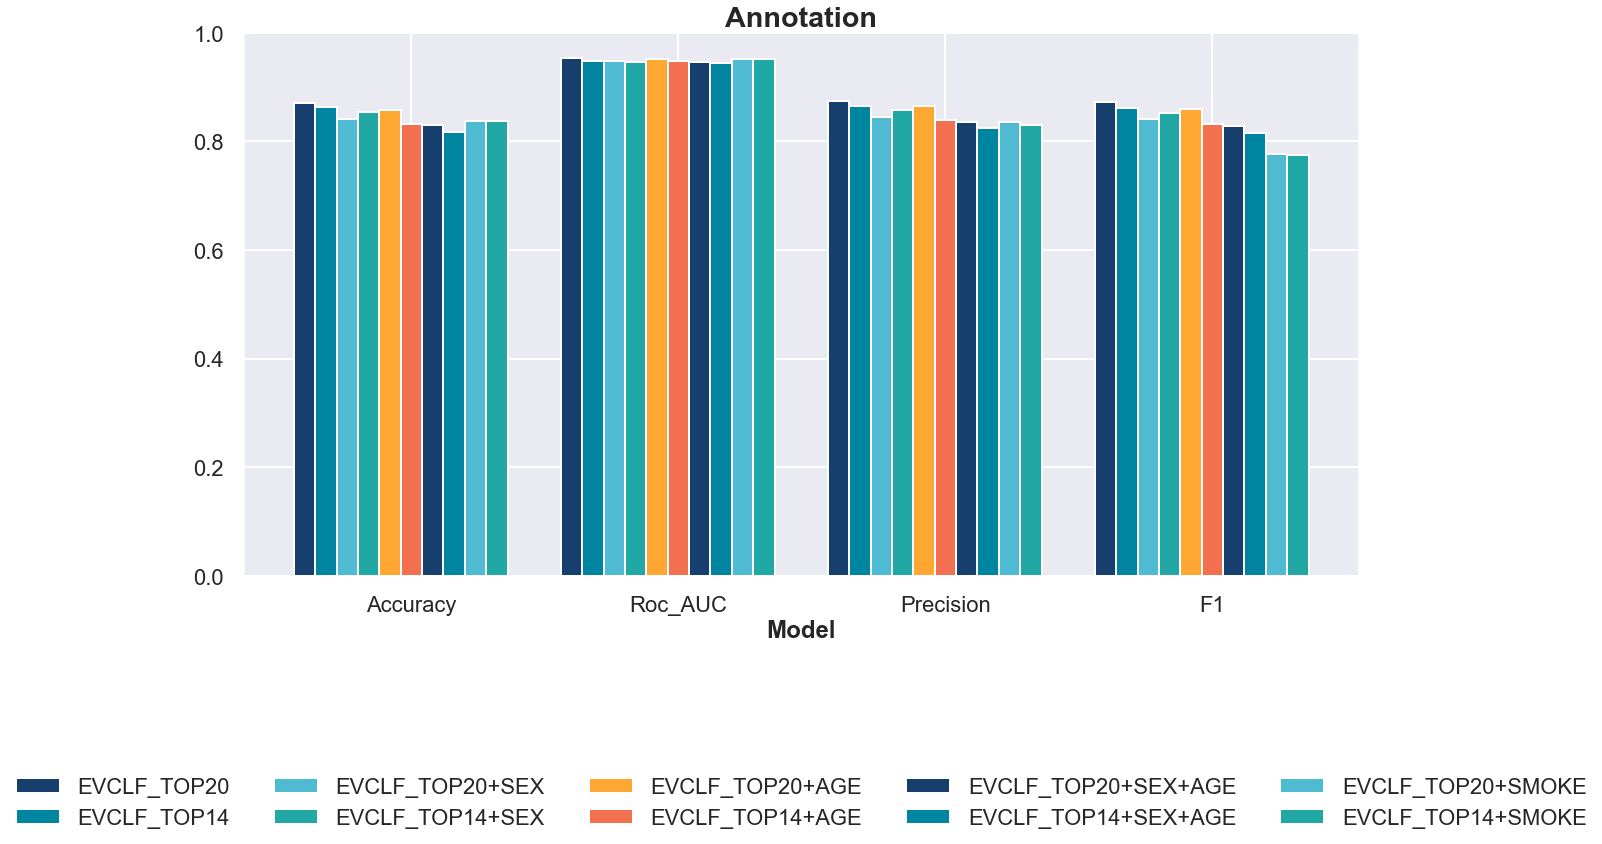

In [130]:
# set height of bars for Annotation Model
bars_heights_anno = [results_an["EVCLF_TOP20"]
                            , results_an["EVCLF_TOP14"]
                            , results_an["EVCLF_TOP20+SEX"]
                            , results_an["EVCLF_TOP14+SEX"]
                            , results_an["EVCLF_TOP20+AGE"]
                            , results_an["EVCLF_TOP14+AGE"]
                            , results_an["EVCLF_TOP20+SEX+AGE"]
                            , results_an["EVCLF_TOP14+SEX+AGE"]
                            , results_an["EVCLF_TOP20+SMOKE"]
                            , results_an["EVCLF_TOP14+SMOKE"]
                         ]

# set size of figure
plt.figure(figsize=(20,10))
sns.set_context("poster")

# use multibar_plot function to plot
multibar_plot(bars_heights_anno, labels_anno, name=labels_metric, title="Annotation", xlb="Model", save_name='figures/consideration_annotation',barWidth = 0.08)

In [131]:
# Print visualisation summary
viz_summary(results_an, metric="Precision")

Precision Value:
EVCLF_TOP20            0.873980
EVCLF_TOP14            0.865306
EVCLF_TOP20+SEX        0.844205
EVCLF_TOP14+SEX        0.856924
EVCLF_TOP20+AGE        0.864385
EVCLF_TOP14+AGE        0.839503
EVCLF_TOP20+SEX+AGE    0.836074
EVCLF_TOP14+SEX+AGE    0.823987
EVCLF_TOP20+SMOKE      0.836273
EVCLF_TOP14+SMOKE      0.830441
Name: Precision, dtype: float64
----------------------------------------
Precision Rank:
EVCLF_TOP20            10.0
EVCLF_TOP14             9.0
EVCLF_TOP20+SEX         6.0
EVCLF_TOP14+SEX         7.0
EVCLF_TOP20+AGE         8.0
EVCLF_TOP14+AGE         5.0
EVCLF_TOP20+SEX+AGE     3.0
EVCLF_TOP14+SEX+AGE     1.0
EVCLF_TOP20+SMOKE       4.0
EVCLF_TOP14+SMOKE       2.0
Name: Precision, dtype: float64


#### Summary

Finally it can be clearly concluded that the annotation data doesn´t improve the models as no combination demonstrates better metrics than the models wthout annotation. So there is no reason to include this data. This also solves potential problems with missing values. Further, the biochip test will be independent from age or sex, which is important to know and for general application.

### Visualisation Top Model (EVCLF)

So take a final look at the Top Model and its performance scores. The dummy classification model is a model representing randomness. This means for a binary classification model its an analogue to a coin flip. 50% will be class 1, 50% will be class 2. For my 3 class prediction randomness would be predicting 33% in each class as well. This is the baseline model I need to beat with my prediction.

/Users/P_Neubert/Anaconda/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


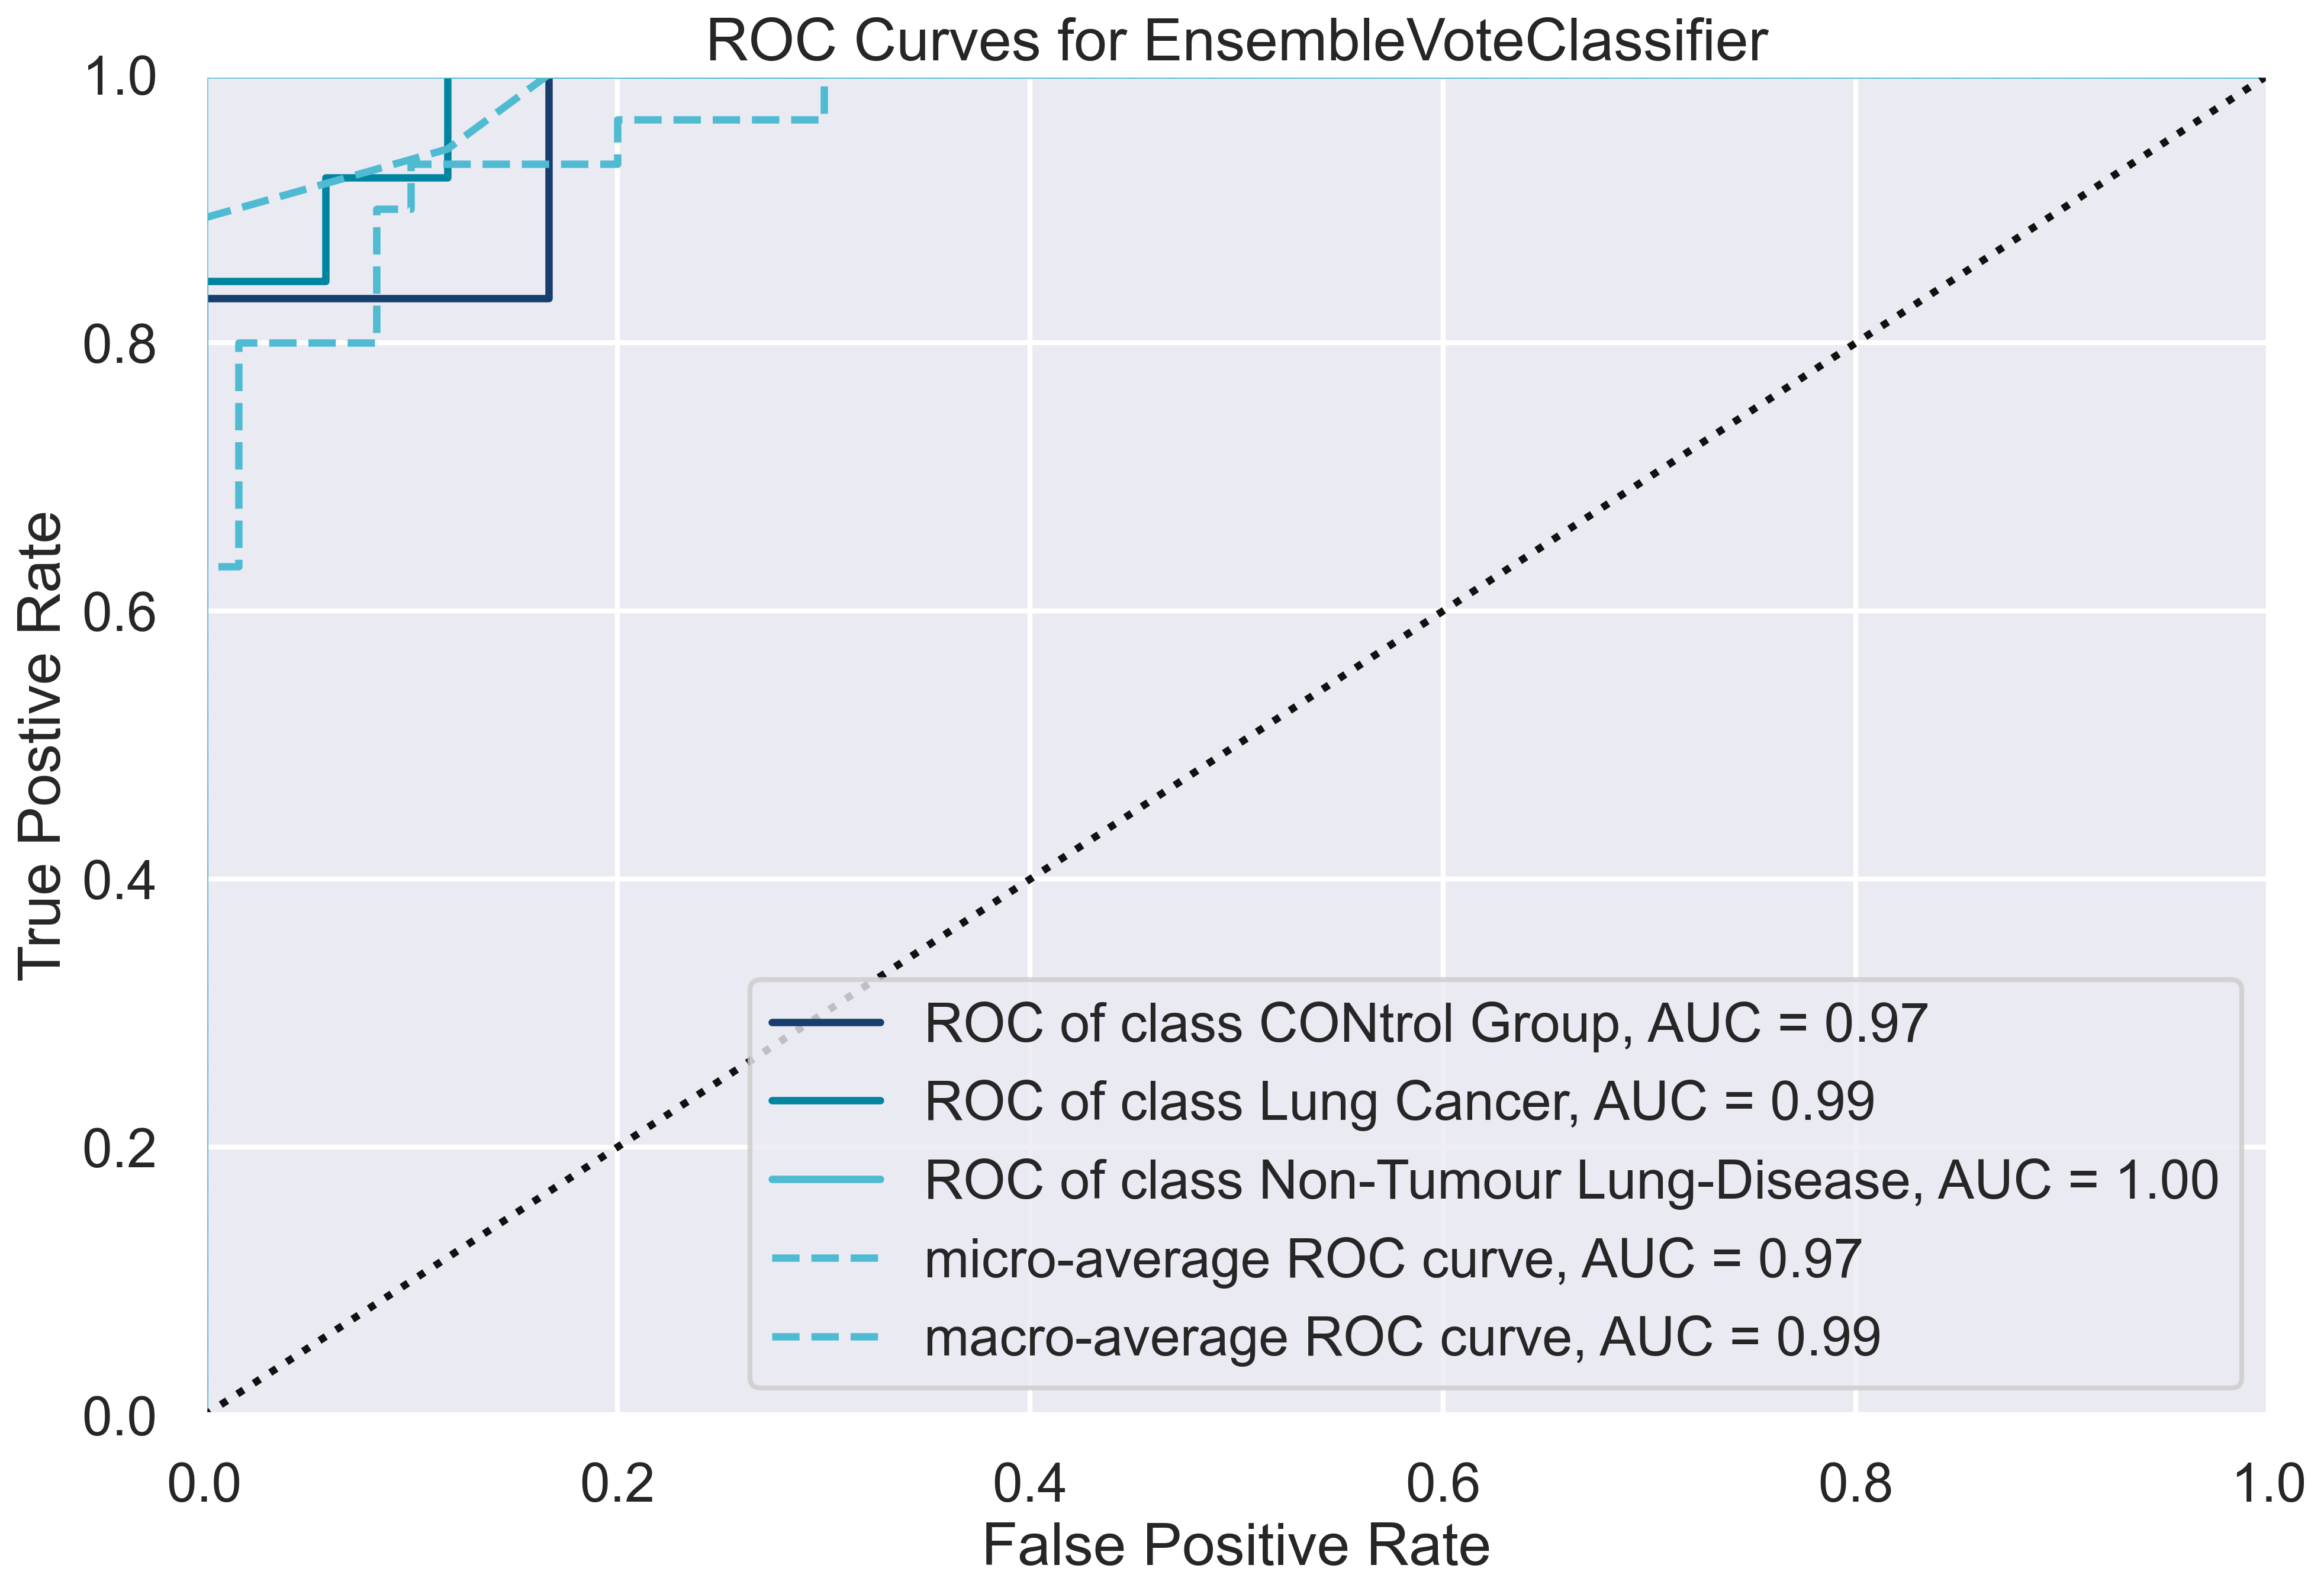

In [132]:
# Top Model (EVCLF)

# EVCLF Classification model is already instantiated

# change set for better visualisation
plt.figure(figsize=(15,10), dpi=300)
sns.set_context("poster")


# Instantiate the visualizer
# 0 = CON (CONtrol Group), 1 = LCa (Lung Cancer), 2 = NTLD (Non-Tumour Lung-Disease)
visualizer_rocauc = ROCAUC(EVCLF, 
                           classes=["CONtrol Group", "Lung Cancer", "Non-Tumour Lung-Disease"], 
                           per_class=True)

# Fit the model 
EVCLF.fit(X_tbc_top20, y_train)

# Fit the training data to the visualizer
visualizer_rocauc.fit(X_tbc_top20, y_train)

# Evaluate the model on the test data
visualizer_rocauc.score(X_tbc_top20_test, y_test)

# Finalize and render the figure
visualizer_rocauc.show(outpath='figures/roc_evclf', transparent=True, );

/Users/P_Neubert/Anaconda/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/P_Neubert/Anaconda/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


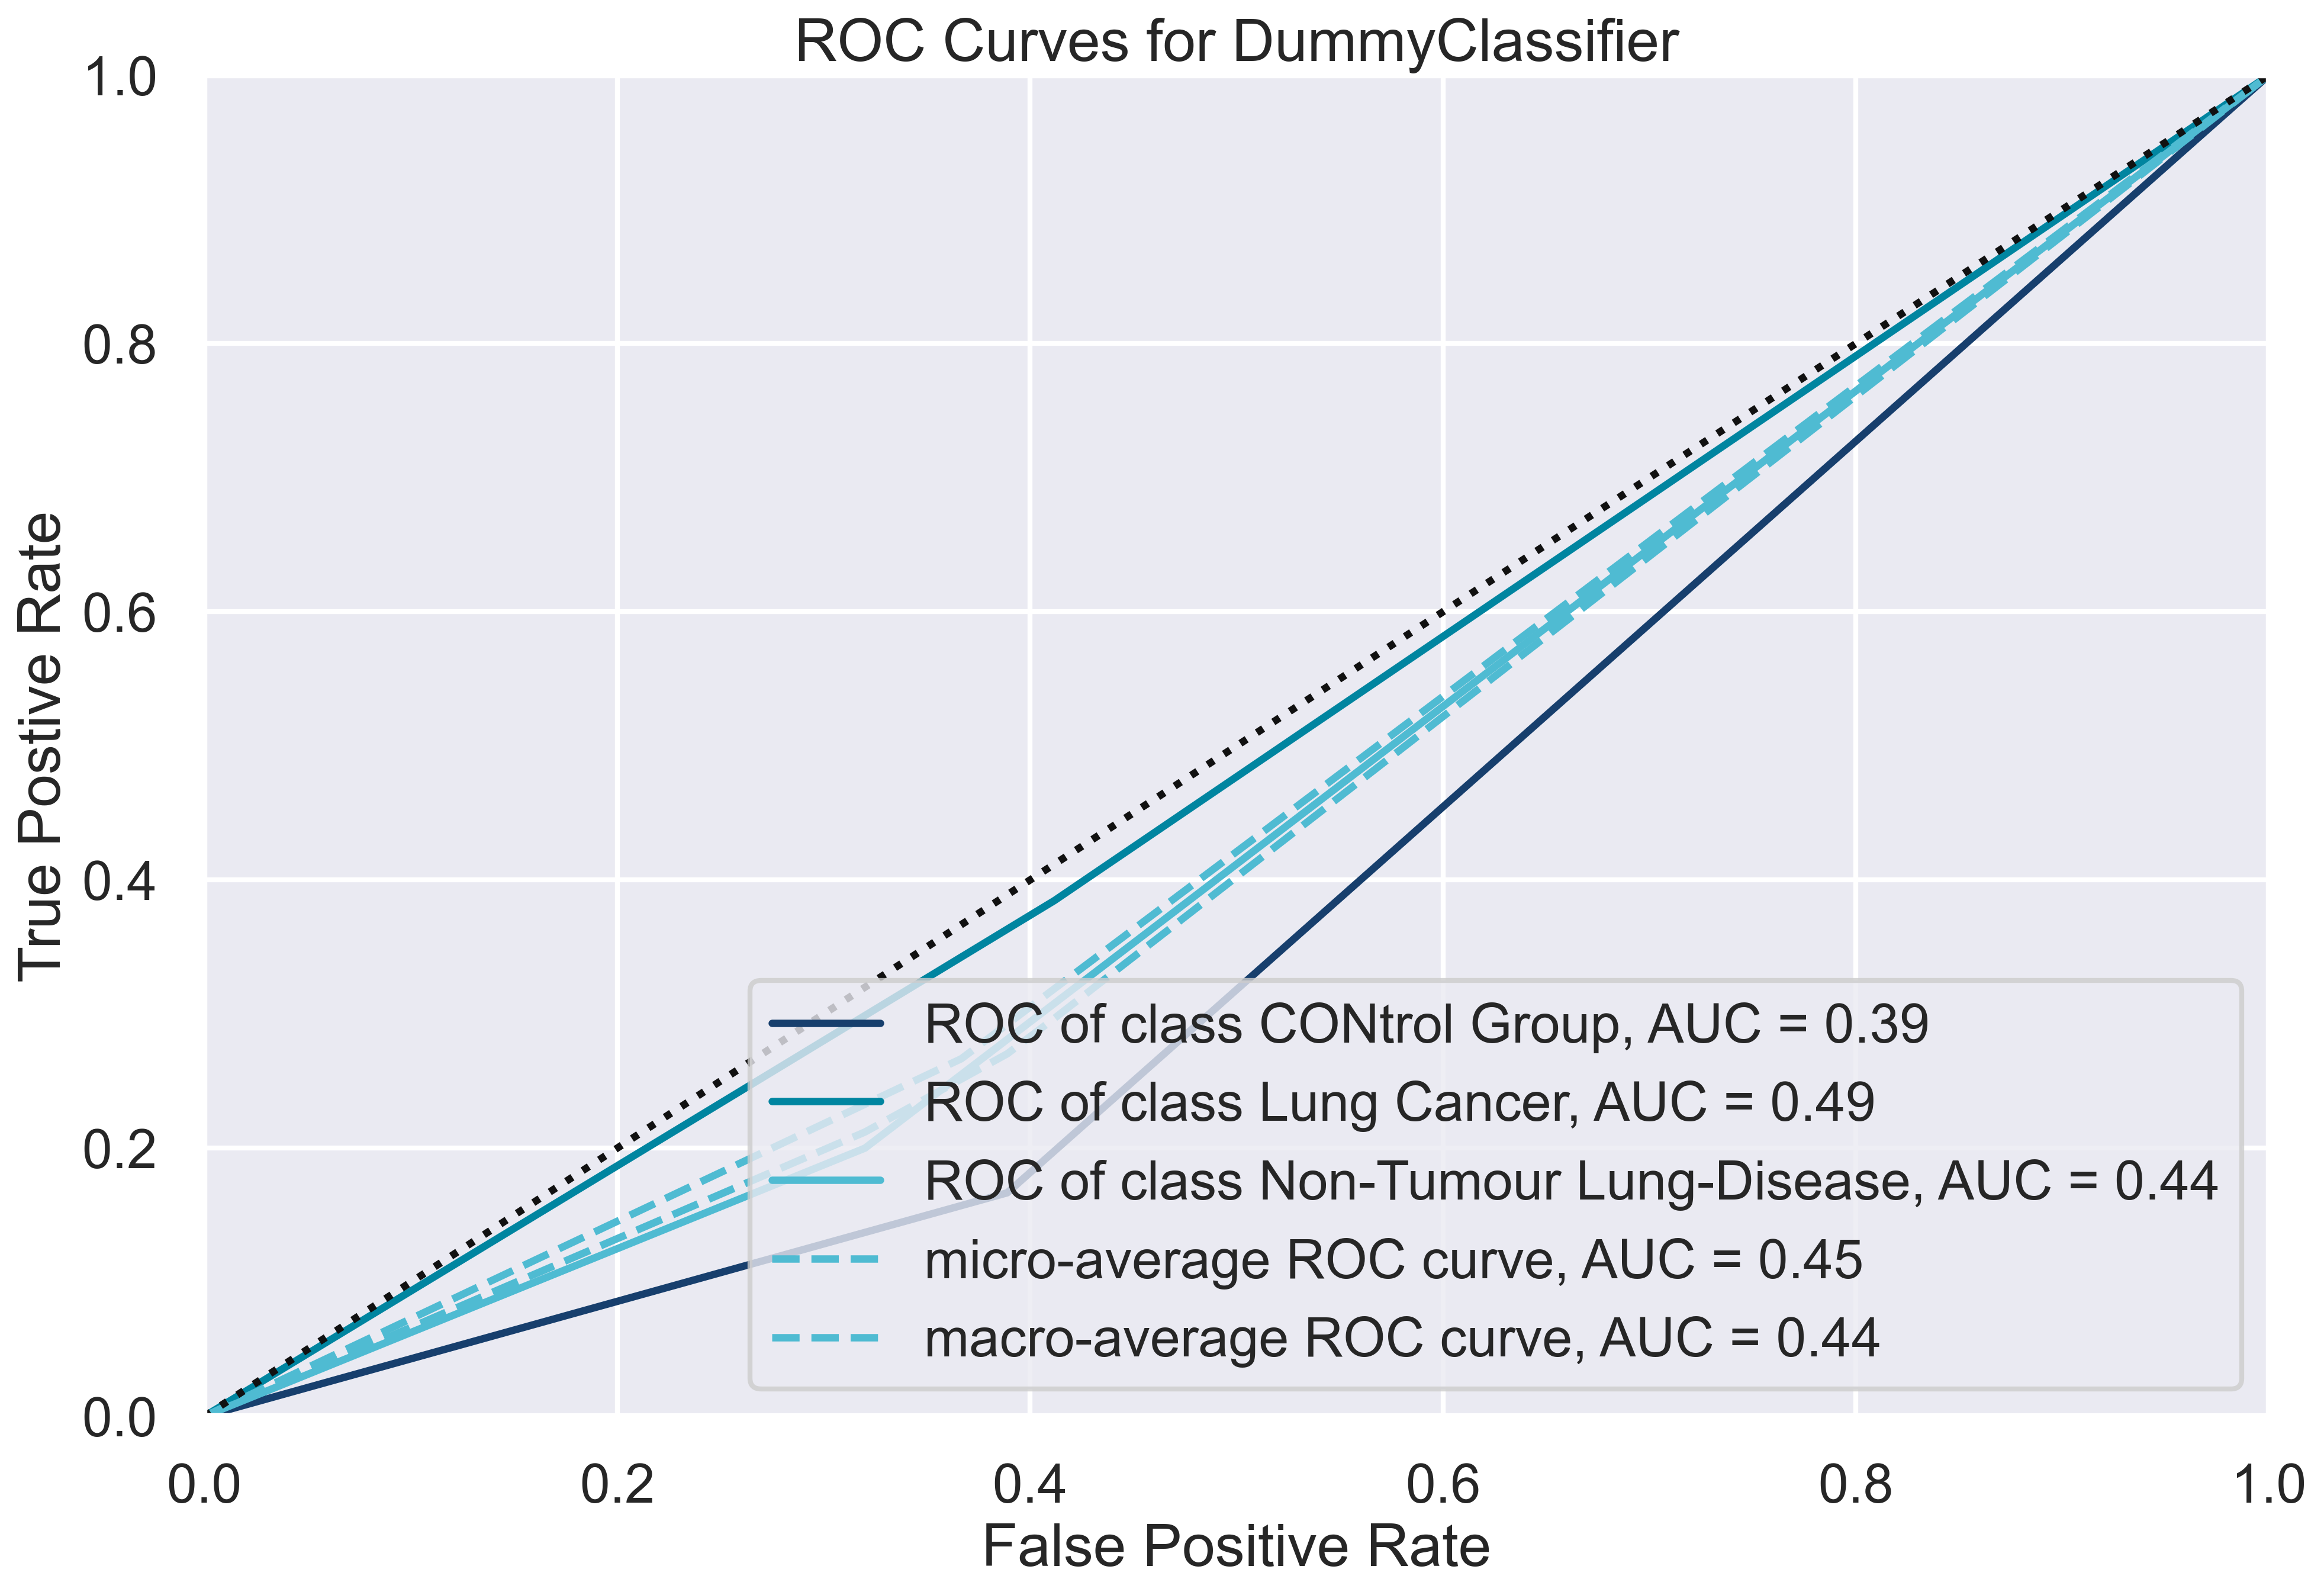

In [133]:
# Baseline Model Dummy Classifier (DC)

# Instantiate the classification model 
dummy = DummyClassifier(random_state=seed) # The Dummy Classifier is used as Baseline Model

# change set for better visualisation
plt.figure(figsize=(15,10), dpi=300)
sns.set_context("poster")

# Instantiate the visualizer
# 0 = CON (CONtrol Group), 1 = LCa (Lung Cancer), 2 = NTLD (Non-Tumour Lung-Disease)
visualizer_rocauc = ROCAUC(dummy, 
                           classes=["CONtrol Group", "Lung Cancer", "Non-Tumour Lung-Disease"], 
                           per_class=True)

# Fit the model 
dummy.fit(X_tbc_top20, y_train)

# Fit the training data to the visualizer
visualizer_rocauc.fit(X_tbc_top20, y_train)

# Evaluate the model on the test data
visualizer_rocauc.score(X_tbc_top20_test, y_test)        

# Finalize and render the figure
visualizer_rocauc.show(outpath='figures/roc_dummy', transparent=True);

/Users/P_Neubert/Anaconda/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/P_Neubert/Anaconda/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


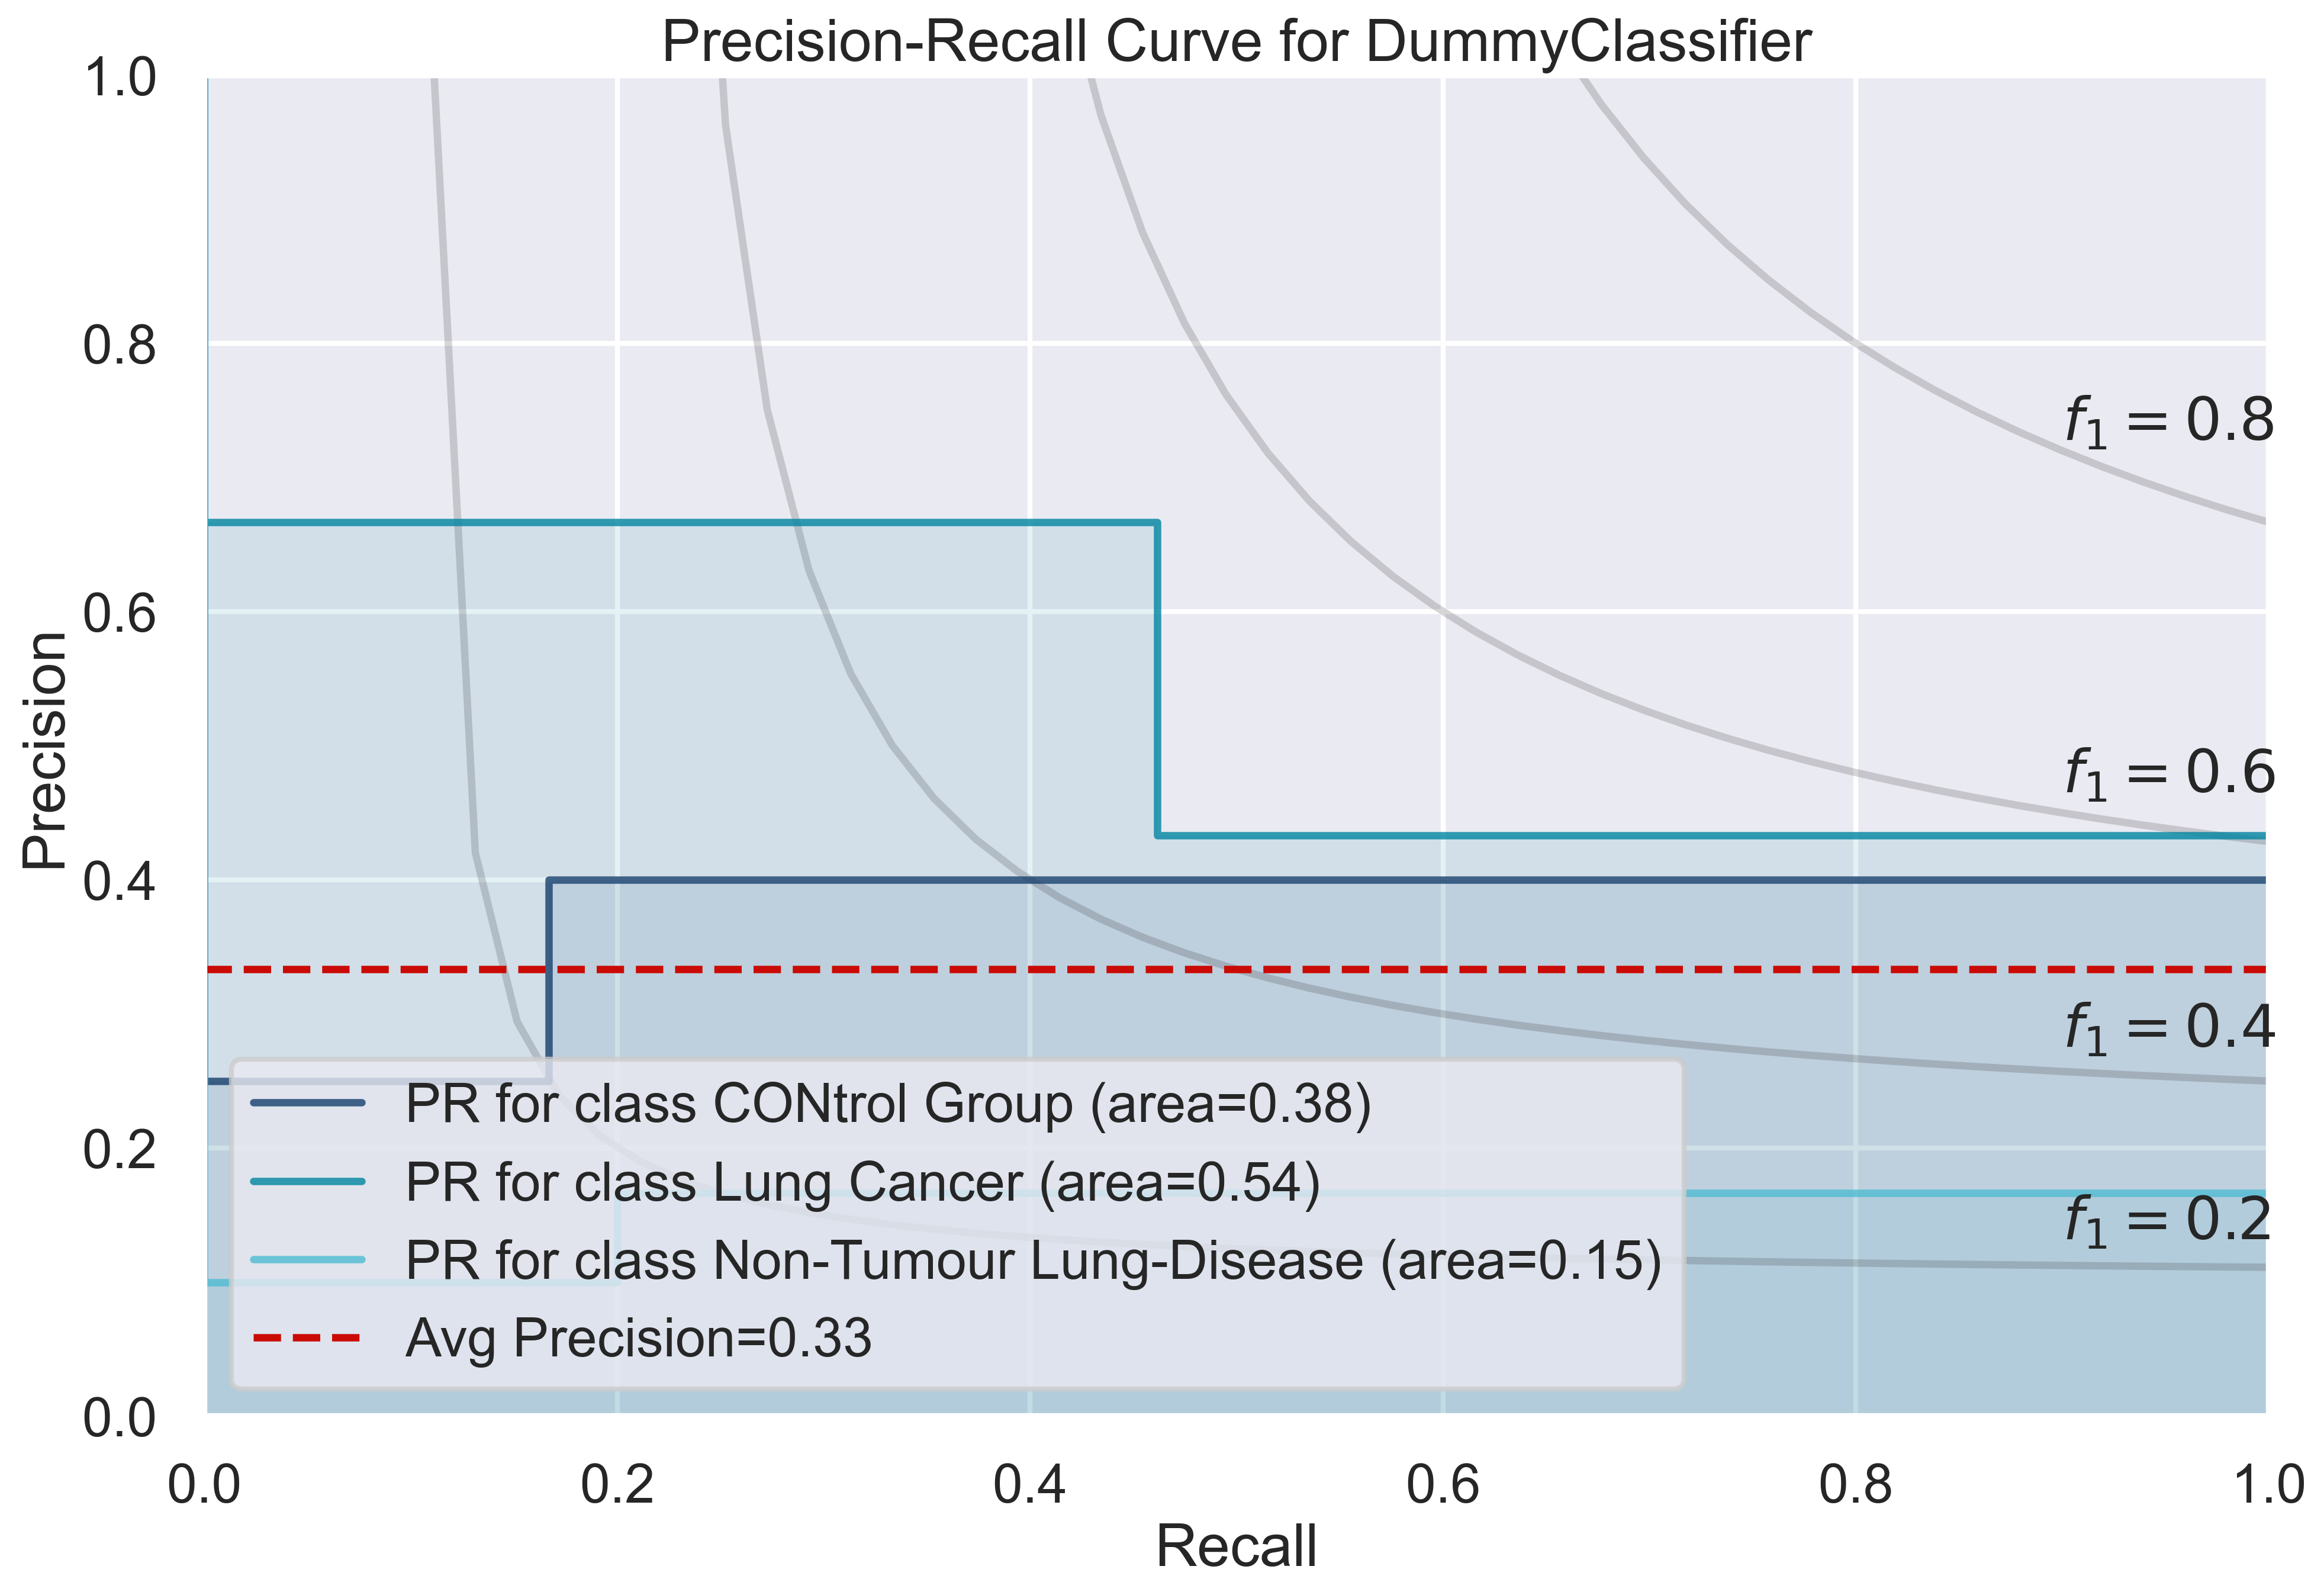

In [134]:
# Baseline Model Dummy Classifier (DC)
# precisionRecallCurve is not possible for EVCLF (no decision_function attribute + multiclass)


# change set for better visualisation
plt.figure(figsize=(15,10), dpi=300)
sns.set_context("poster")

# Instantiate the visualizer
# 0 = CON (CONtrol Group), 1 = LCa (Lung Cancer), 2 = NTLD (Non-Tumour Lung-Disease)
visualizer_pcc = PrecisionRecallCurve(dummy, 
                                      per_class=True, 
                                      classes=["CONtrol Group", "Lung Cancer", "Non-Tumour Lung-Disease"], 
                                      iso_f1_curves=True,
                                      fill_area=True,
                                      micro=False,
                                      fill_opacity=0.1,
                                         ap_score=True)

# Fit the training data to the visualizer
visualizer_pcc.fit(X_tbc_top20, y_train)

# Evaluate the model on the test data
visualizer_pcc.score(X_tbc_top20_test, y_test)

# Finalize and render the figure
visualizer_pcc.show(outpath='figures/precision_recall_dummy', transparent=True);

/Users/P_Neubert/Anaconda/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


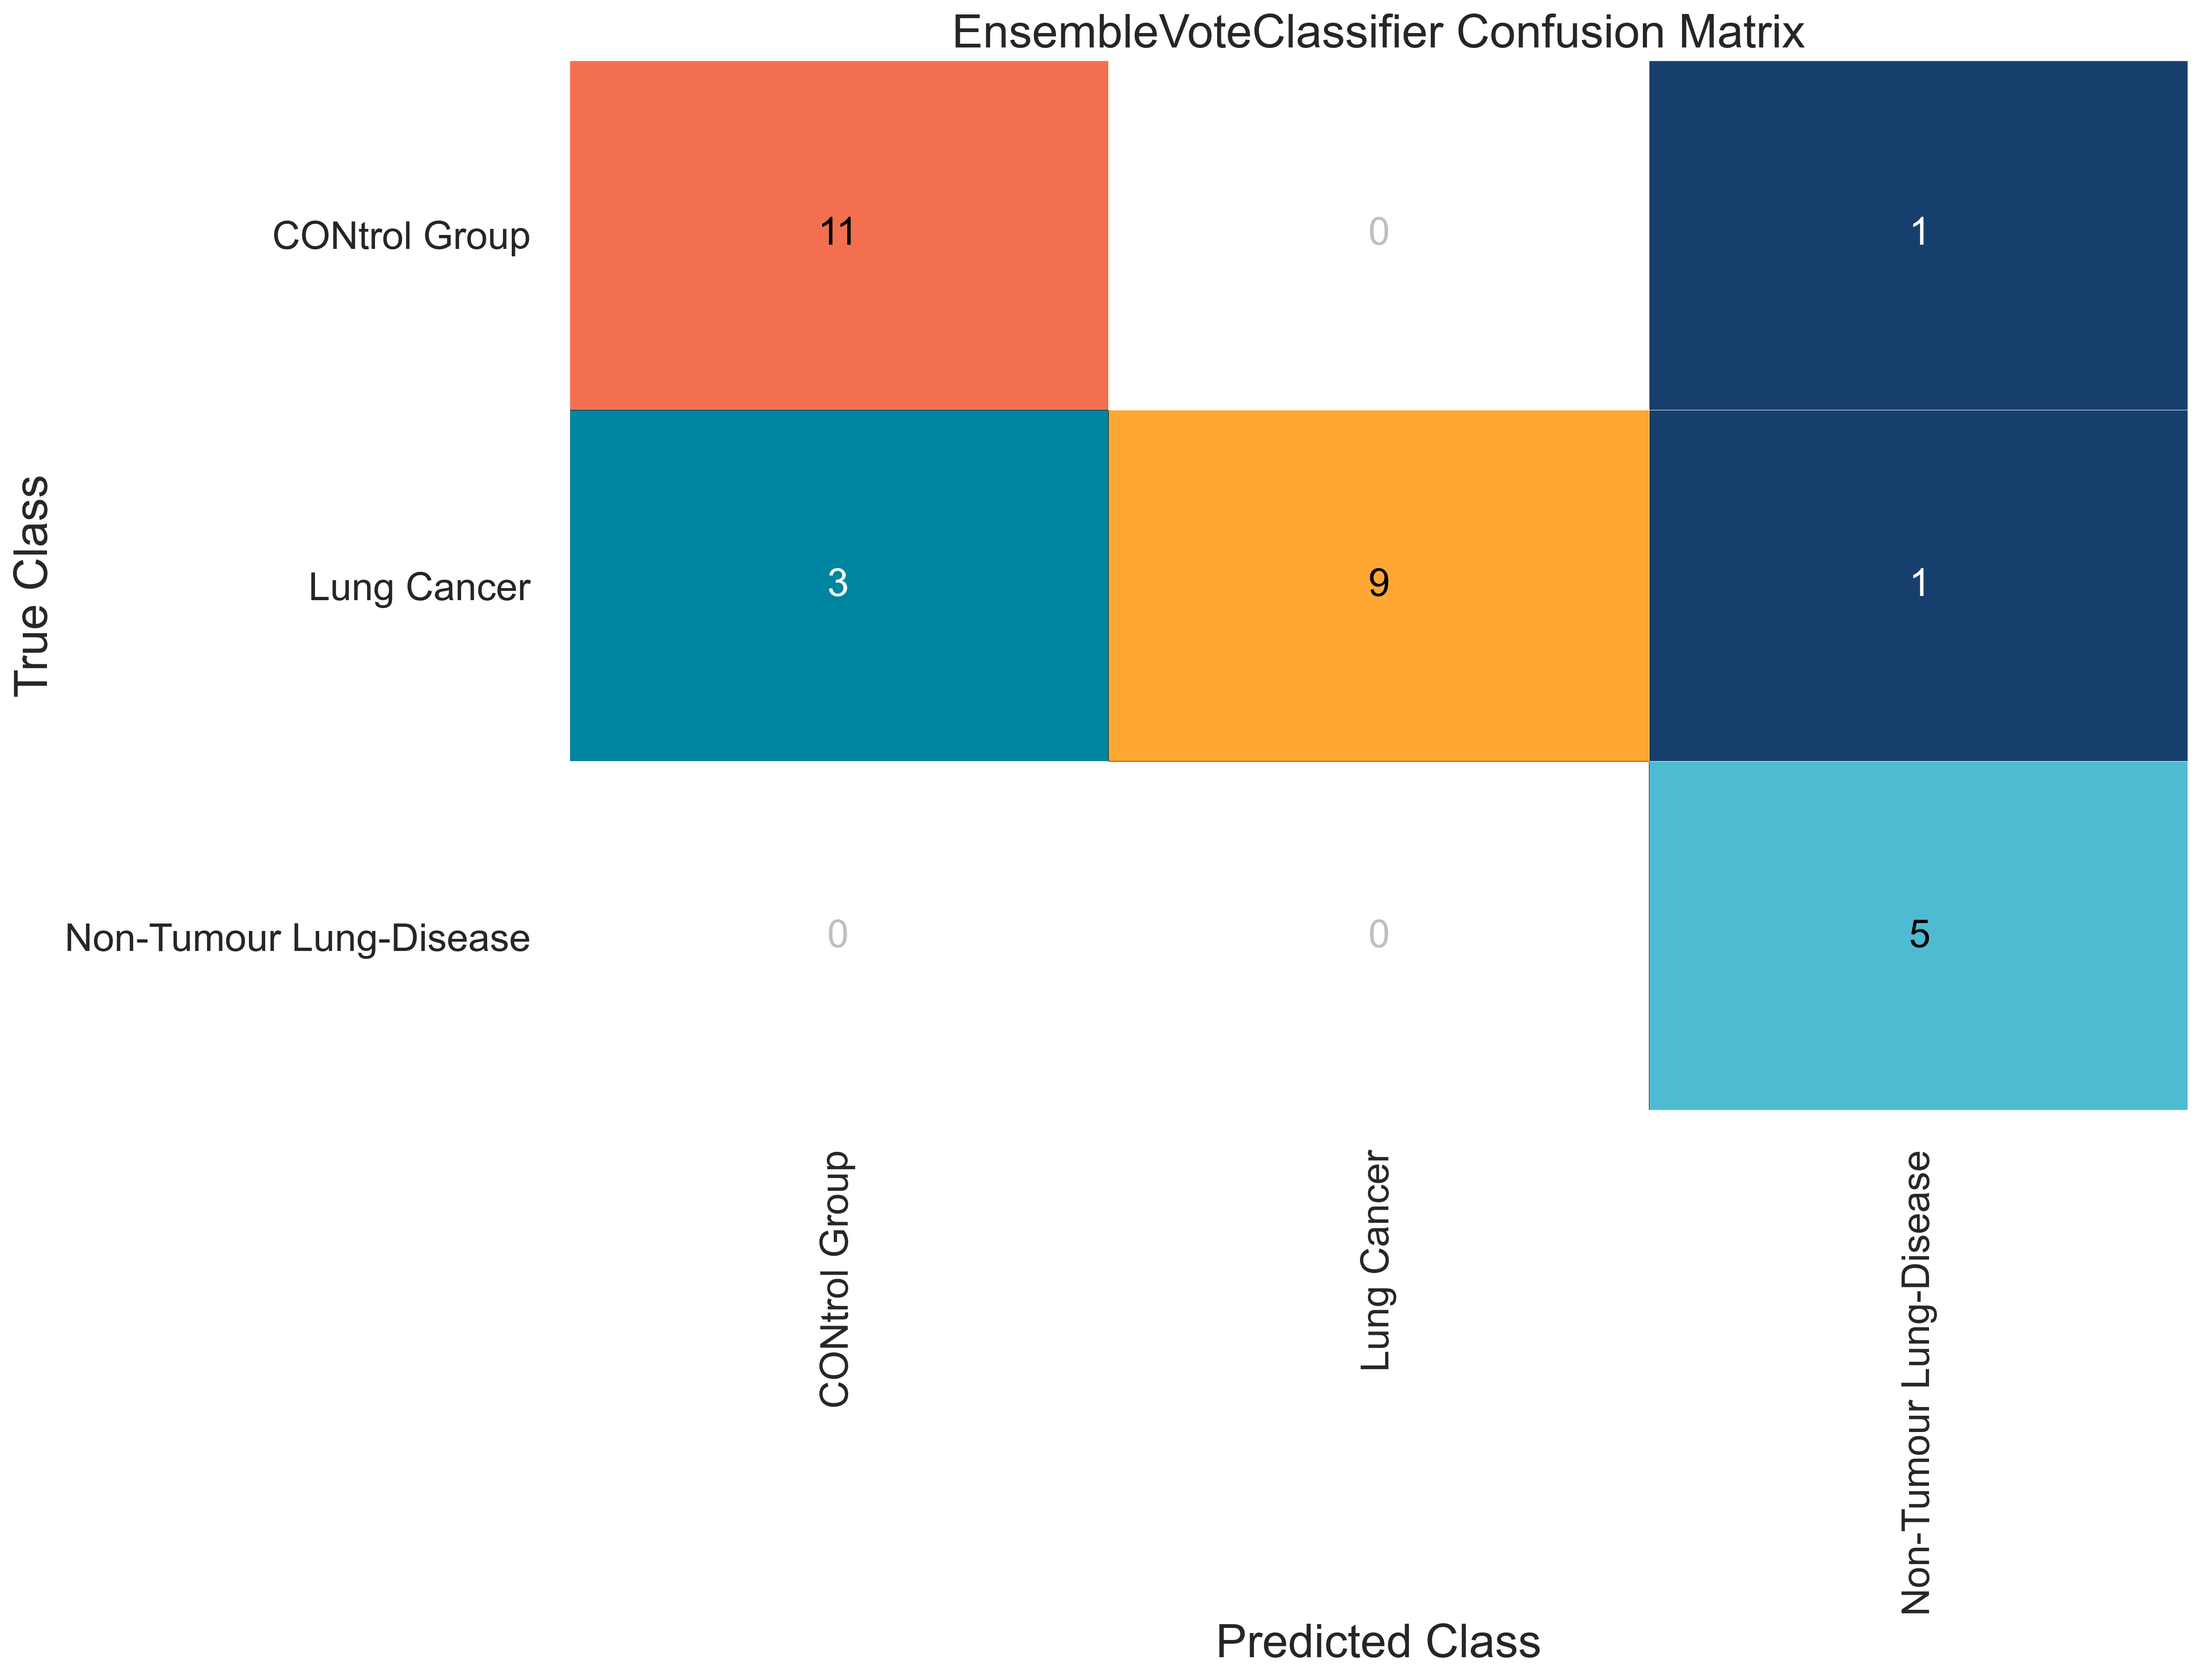

In [135]:
# Top Model (EVCLF)

# change set for better visualisation
plt.figure(figsize=(15,10), dpi=300)
sns.set_context("poster")

# Instantiate the visualizer
# 0 = CON (CONtrol Group), 1 = LCa (Lung Cancer), 2 = NTLD (Non-Tumour Lung-Disease)
visualizer_cm = ConfusionMatrix(EVCLF,        
                                classes=["CONtrol Group", "Lung Cancer", "Non-Tumour Lung-Disease"],
                                cmap= current_palette,
                                fontsize=20)                                      

# Fit the training data to the visualizer
visualizer_cm.fit(X_tbc_top20, y_train)

# Evaluate the model on the test data
visualizer_cm.score(X_tbc_top20_test, y_test)

# Finalize and render the figure
visualizer_cm.show(outpath='figures/confusion_evclf', transparent=True);

/Users/P_Neubert/Anaconda/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


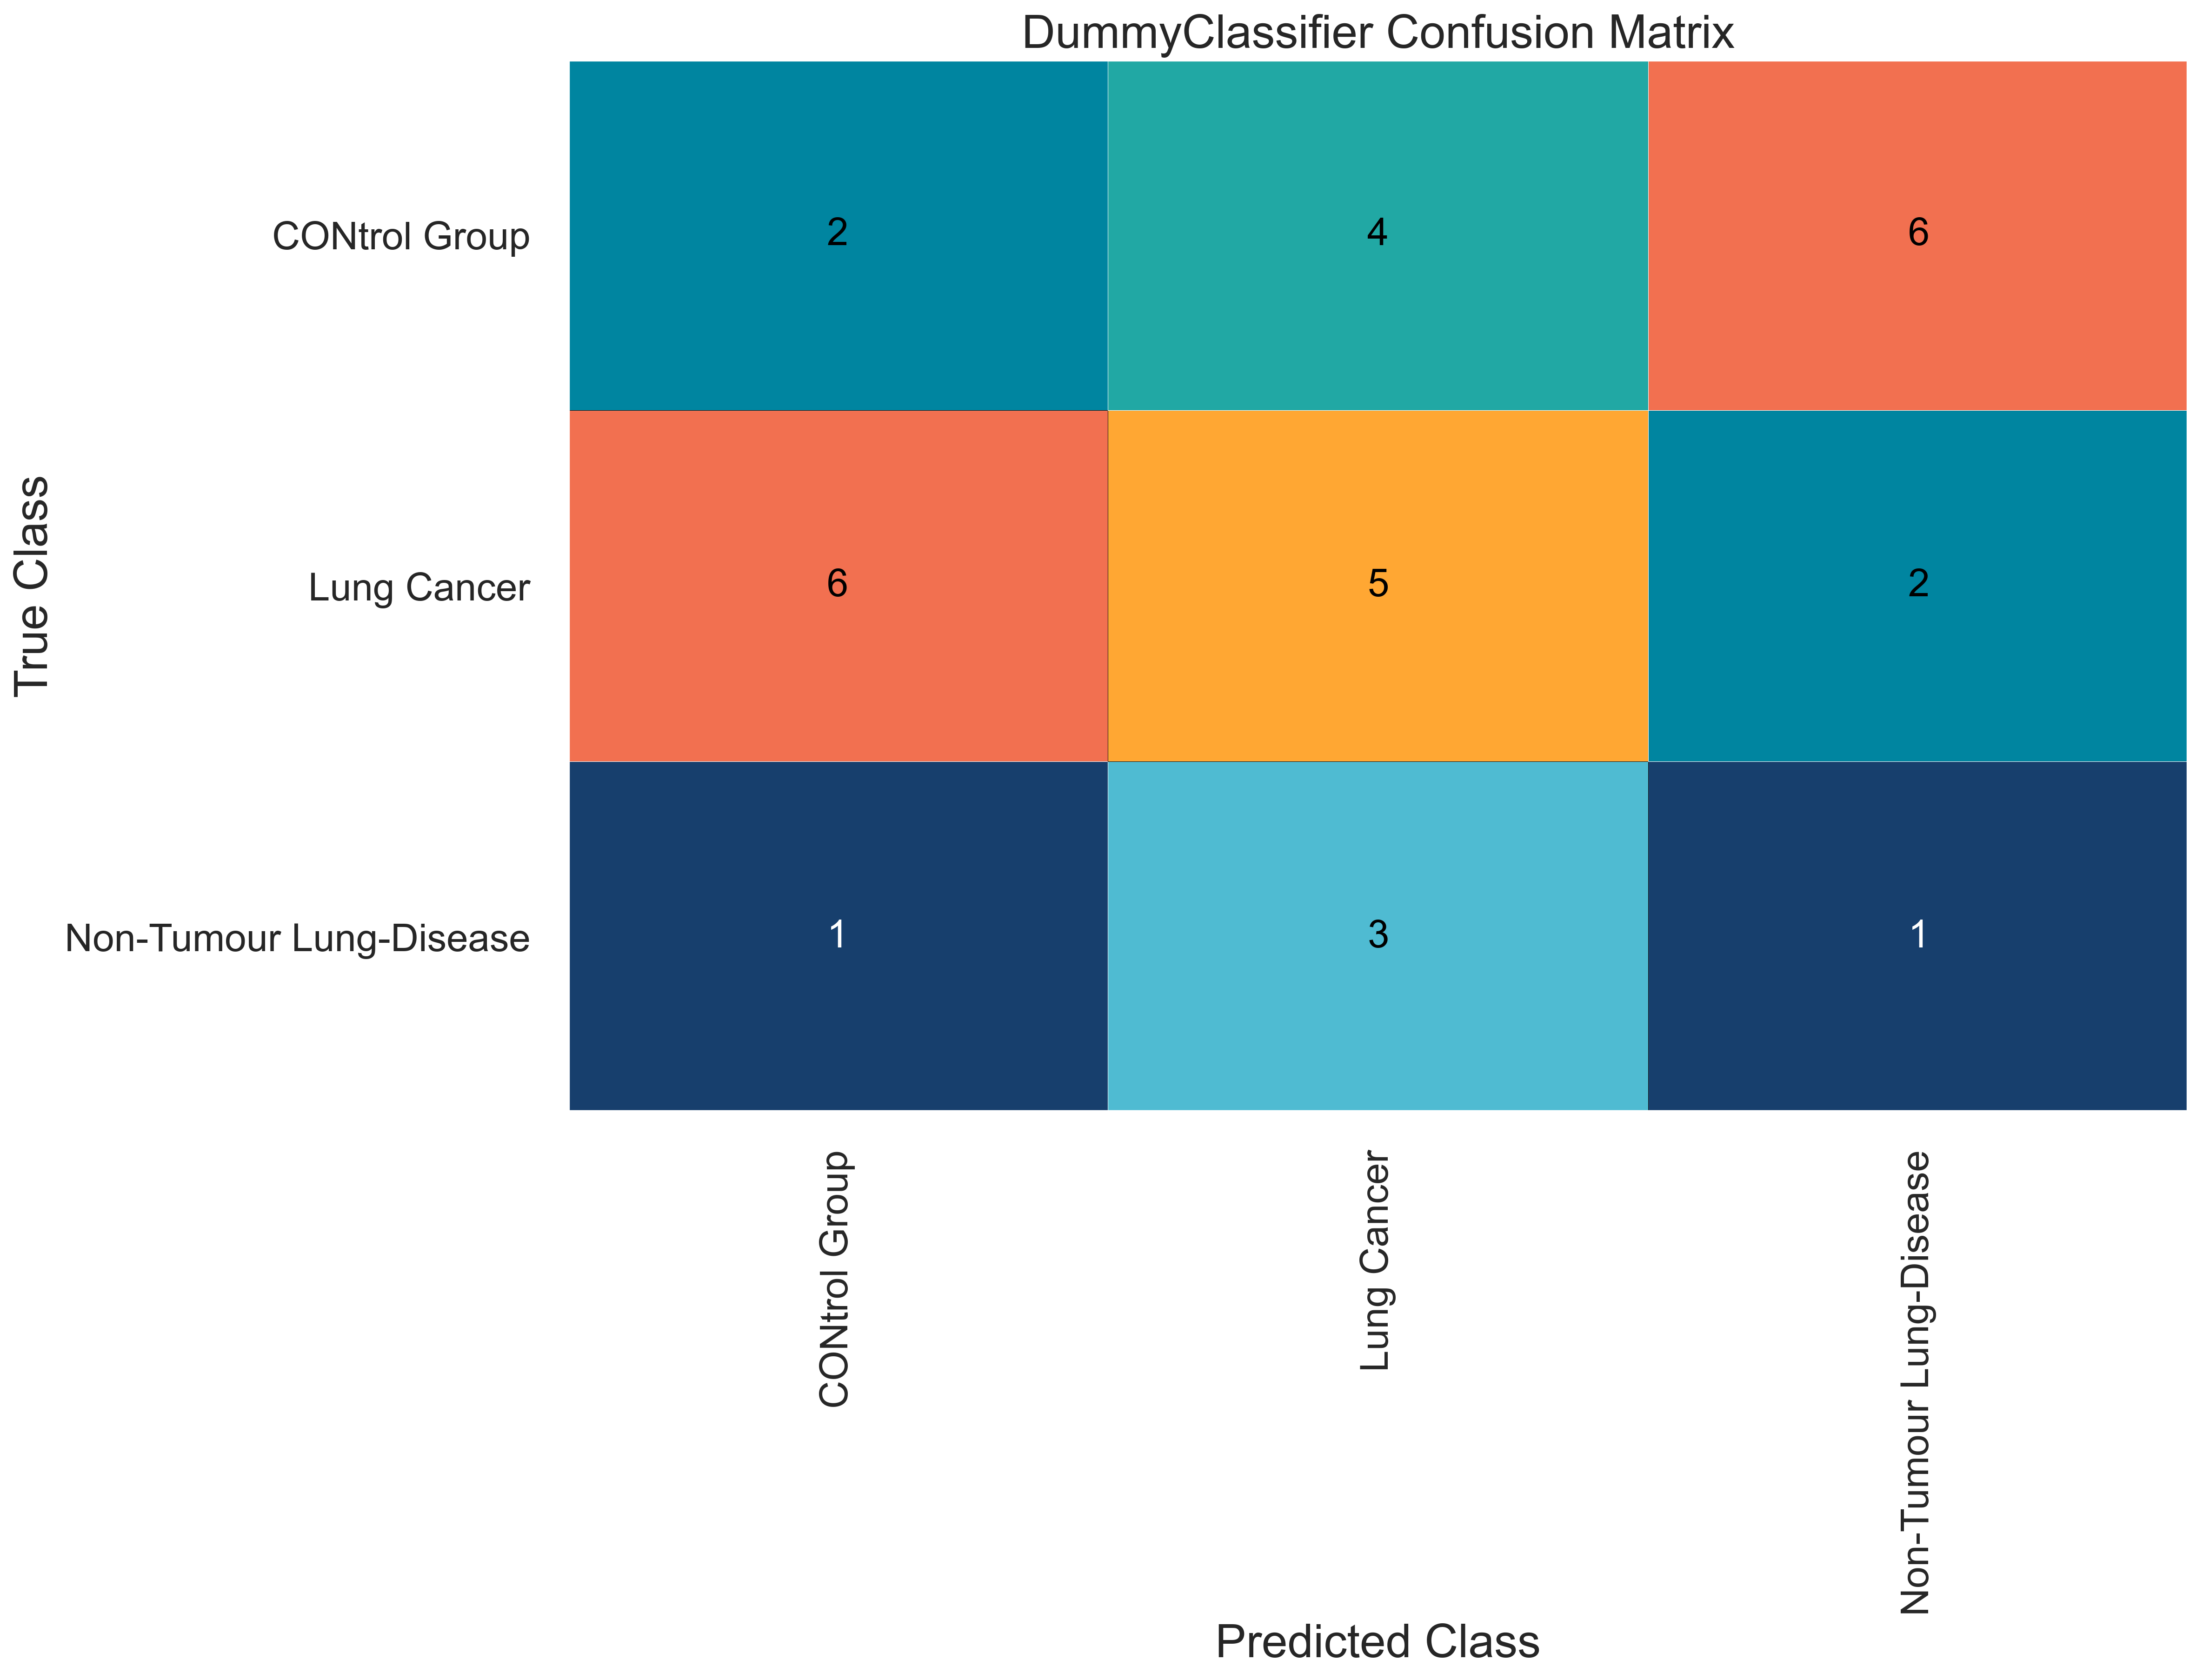

In [136]:
# Baseline Model Dummy Classifier (DC)

# change set for better visualisation
plt.figure(figsize=(15,10), dpi=300)
sns.set_context("poster")

# Instantiate the visualizer
# 0 = CON (CONtrol Group), 1 = LCa (Lung Cancer), 2 = NTLD (Non-Tumour Lung-Disease)
visualizer_cm = ConfusionMatrix(dummy,        
                                classes=["CONtrol Group", "Lung Cancer", "Non-Tumour Lung-Disease"],
                                cmap= current_palette,
                                fontsize=20)                                      

# Fit the training data to the visualizer
visualizer_cm.fit(X_tbc_top20, y_train)

# Evaluate the model on the test data
visualizer_cm.score(X_tbc_top20_test, y_test)

# Finalize and render the figure
visualizer_cm.show(outpath='figures/confusion_dummy', transparent=True);

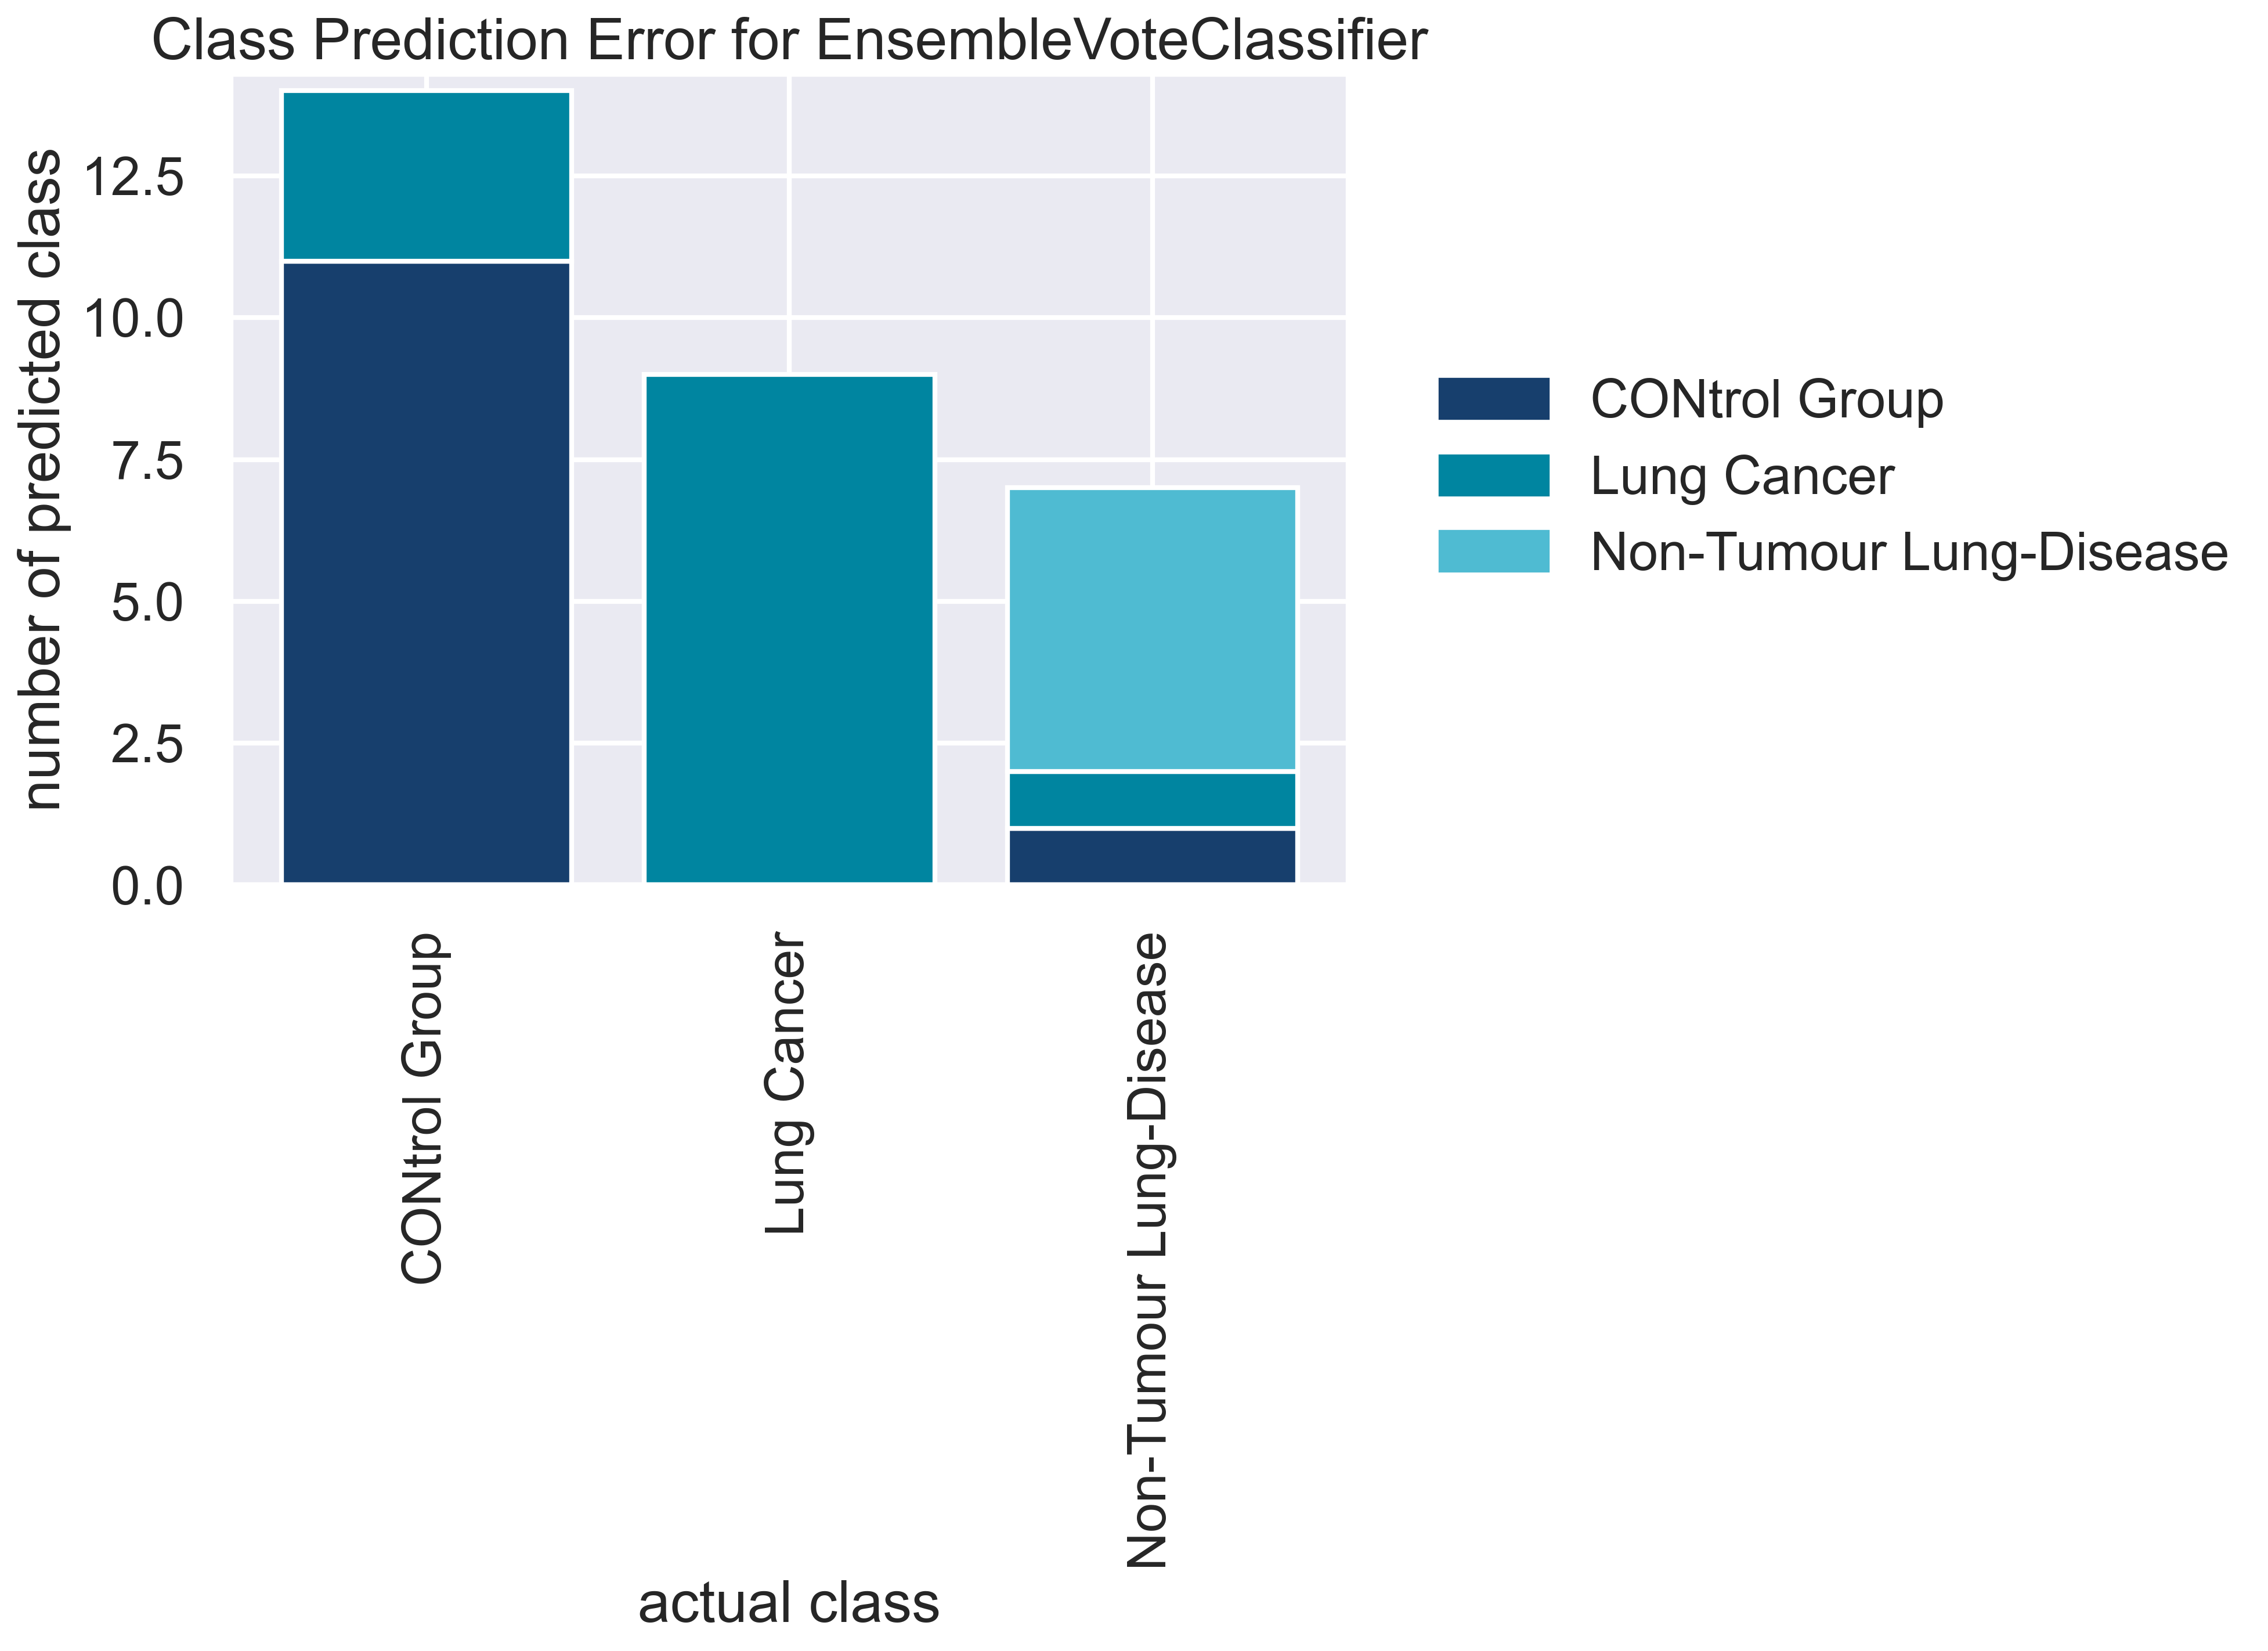

In [137]:
# Top Model (EVCLF)

# change set for better visualisation
plt.figure(figsize=(15,10), dpi=300)
sns.set_context("poster")

# Instantiate the classification model and visualizer
# 0 = CON (CONtrol Group), 1 = LCa (Lung Cancer), 2 = NTLD (Non-Tumour Lung-Disease)
visualizer_cpe = ClassPredictionError(EVCLF,        
                                      classes=["CONtrol Group", "Lung Cancer", "Non-Tumour Lung-Disease"])

# Fit the training data to the visualizer
visualizer_cpe.fit(X_tbc_top20, y_train)

# Evaluate the model on the test data
visualizer_cpe.score(X_tbc_top20_test, y_test)        

# Finalize and render the figure
visualizer_cpe.show(outpath='figures/prediction_error_evclf', transparent=True); 

/Users/P_Neubert/Anaconda/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


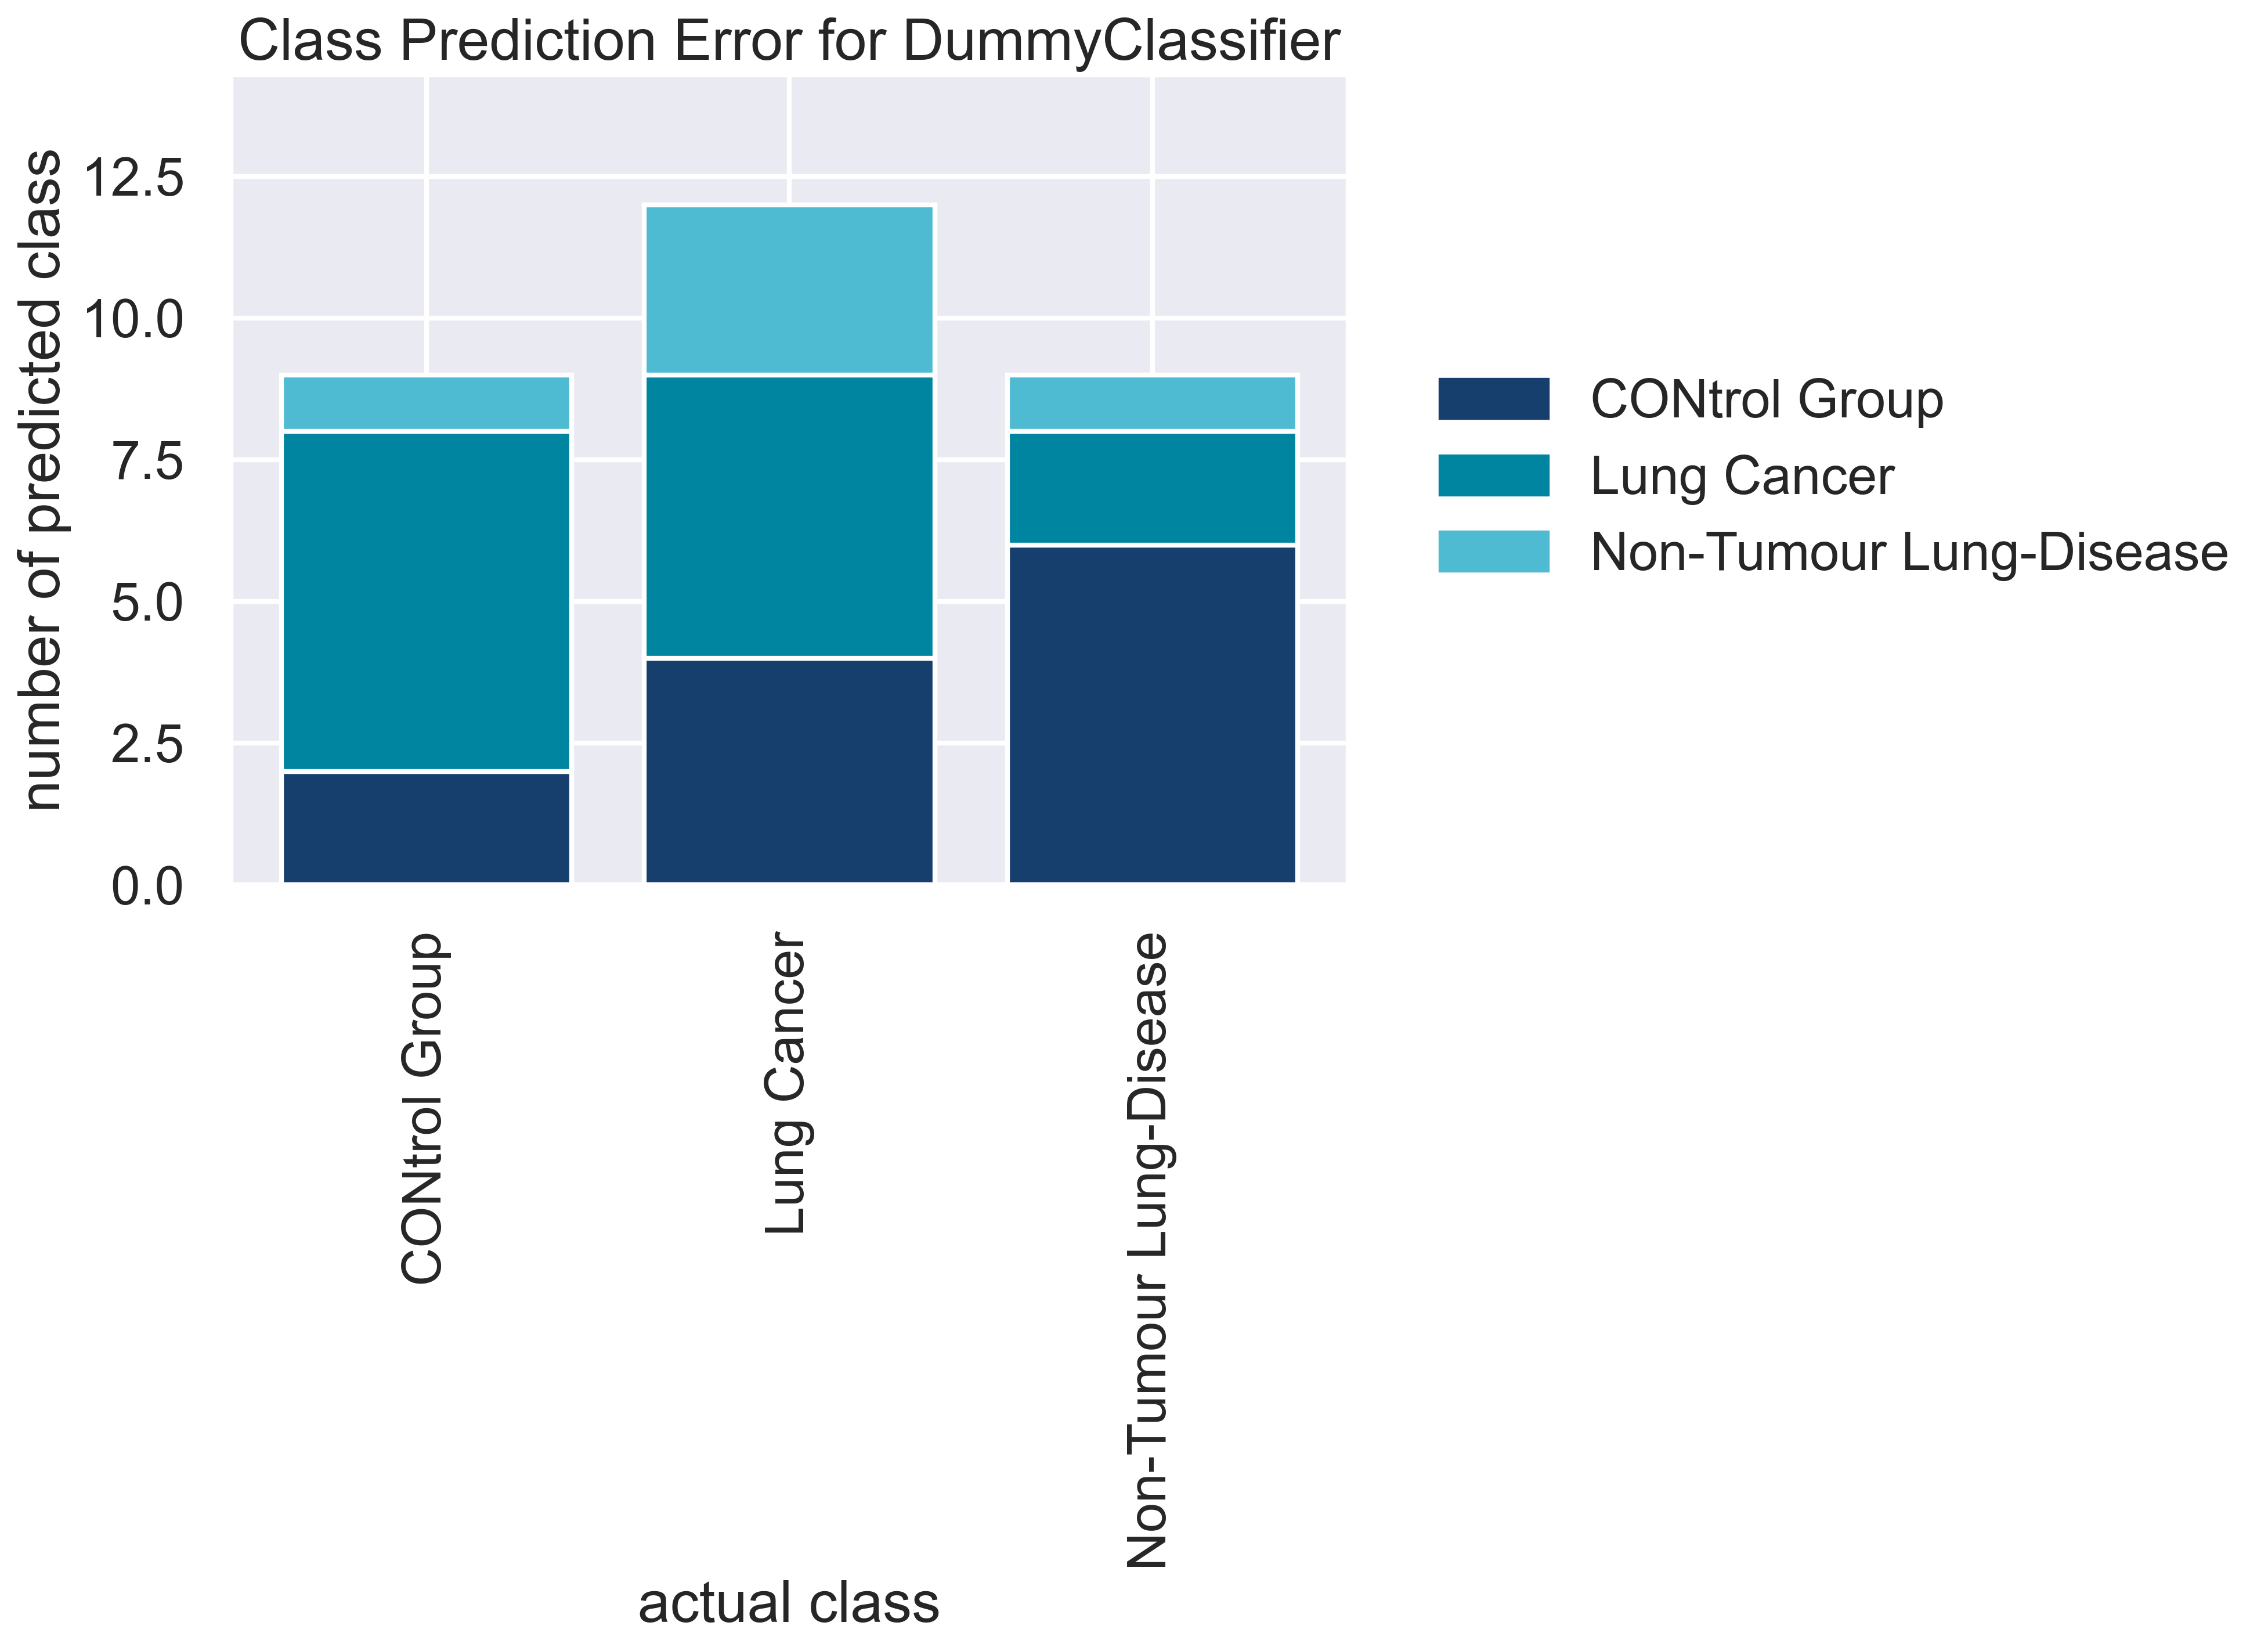

In [138]:
# Baseline Model Dummy Classifier (DC)

# change set for better visualisation
plt.figure(figsize=(15,10), dpi=300)
sns.set_context("poster")

# Instantiate the classification model and visualizer
# 0 = CON (CONtrol Group), 1 = LCa (Lung Cancer), 2 = NTLD (Non-Tumour Lung-Disease)
visualizer_cpe = ClassPredictionError(dummy,        
                                      classes=["CONtrol Group", "Lung Cancer", "Non-Tumour Lung-Disease"])

# Fit the training data to the visualizer
visualizer_cpe.fit(X_tbc_top20, y_train)

# Evaluate the model on the test data
visualizer_cpe.score(X_tbc_top20_test, y_test)        

# Finalize and render the figure
visualizer_cpe.show(outpath='figures/prediction_error_dummy', transparent=True);

#### Summary

- The Top Model demonstrates with a ROC class of 0.97, 0.99, 1.00 for CONtrol goup (CON), Lung Cancer (LCa) and Non-Tumor Lung Disease (NTLD) respectively and a micro average ROC (global ROC over all classes) of 0.97 a good performance over all. In comparison the Dummy Classification demonstrates a ROC Class of 0.39, 0.49 and 0.44 for the groups respectively and a micro average ROC of 0.45.

- The Top Model predicts all 9 from 9 LCa samples correct (100%), 5 from 7 NTLD samples (71%) and 11 from 14 samples of CON (79%). In contrast the Dummy Classification predicts 5 from 12 LCa samples correct (41%), 1 from 9 NTLD samples (11%) and 2 from 9 samples from CON (22%)

### Model Evaluation

Finally the Top Model has to be evaluated with "unseen" data (data not used to train the model). For this a Evaluation Test Set was set aside in the beginning. Both Feature Selections will be used for this as Best and Optimum Solution and again compared to the Dummy Classification base line model.

In [139]:
# Again Select Features (for TOP20 and TOP14) from X_train

# use dataframe_selection function for creating new dataframe with TOP20
X_train_top20 = dataframe_selection(results_TBC["TBC"], X_train=X_train)

# use dataframe_selection function for creating new dataframe with TOP14
X_train_top14 = dataframe_selection(TOP14_dict["TOP14"], X_train=X_train)

In [140]:
# Select Features (for TOP20 and TOP14) from X_eval

# use dataframe_selection function for creating new dataframe with TOP20
X_eval_top20 = dataframe_selection(results_TBC["TBC"], X_train=X_eval)

# use dataframe_selection function for creating new dataframe with TOP14
X_eval_top14 = dataframe_selection(TOP14_dict["TOP14"], X_train=X_eval)

#### Top Model (EVCLF)

##### Top Model (EVCLF) + TOP20

In [141]:
# Final test with validation testset TOP20

EVCLF_eval = EVCLF

# Final Fit the model
EVCLF_eval.fit(X_train_top20, y_train)

y_final_top20 = EVCLF_eval.predict(X_eval_top20)

tm20 = score_eval(y_eval, y_final_top20)

Final Precision Score (micro): 0.6333333333333333
------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.38      0.33      0.35         9
           2       0.67      0.75      0.71         8

    accuracy                           0.63        30
   macro avg       0.60      0.62      0.61        30
weighted avg       0.62      0.63      0.63        30

------------------------------------------------------------


##### Top Model (EVCLF) + TOP14

In [142]:
# Final test with validation testset TOP14

# Final Fit the model
EVCLF_eval.fit(X_train_top14, y_train)

y_final_top14 = EVCLF_eval.predict(X_eval_top14)

tm14 = score_eval(y_eval, y_final_top14)

Final Precision Score (micro): 0.6333333333333333
------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.40      0.44      0.42         9
           2       0.71      0.62      0.67         8

    accuracy                           0.63        30
   macro avg       0.63      0.61      0.62        30
weighted avg       0.64      0.63      0.64        30

------------------------------------------------------------


#### Baseline Model Dummy Classifier (DC)

##### Baseline Model Dummy Classifier (DC) + TOP20

In [143]:
# using the dummy to have a comparison value
# Final test with validation testset TOP20 

dummy_eval = DummyClassifier(random_state=seed) # The Dummy Classifier is used as Baseline Model


# Final Fit the model
dummy_eval.fit(X_train_top20, y_train)

y_final_top20_dummy = dummy_eval.predict(X_eval_top20)

dummy20 = score_eval(y_eval, y_final_top20_dummy)

Final Precision Score (micro): 0.36666666666666664
------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.44      0.31      0.36        13
           1       0.42      0.56      0.48         9
           2       0.22      0.25      0.24         8

    accuracy                           0.37        30
   macro avg       0.36      0.37      0.36        30
weighted avg       0.38      0.37      0.36        30

------------------------------------------------------------


/Users/P_Neubert/Anaconda/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [144]:
# Calculation the difference in Precision Scores for TOP20
# between Top Model and Dummy in percent

precision_diff = tm20-dummy20
print("The Difference in Precision Score (micro):", precision_diff*100, "%")

The Difference in Precision Score (micro): 26.666666666666668 %


##### Baseline Model Dummy Classifier (DC) + TOP14

In [145]:
# Final test with validation testset TOP14

# Final Fit the model
dummy_eval.fit(X_train_top14, y_train)

y_final_top14 = dummy_eval.predict(X_eval_top14)

dummy14 = score_eval(y_eval, y_final_top14)

Final Precision Score (micro): 0.36666666666666664
------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.44      0.31      0.36        13
           1       0.42      0.56      0.48         9
           2       0.22      0.25      0.24         8

    accuracy                           0.37        30
   macro avg       0.36      0.37      0.36        30
weighted avg       0.38      0.37      0.36        30

------------------------------------------------------------


In [146]:
# Calculation the difference in Precision Scores for TOP14
# between Top Model and Dummy in percent

precision_diff = tm14-dummy14
print("The Difference in Precision Score (micro):", precision_diff*100, "%")

The Difference in Precision Score (micro): 26.666666666666668 %


#### Visualisation Model Evaluation

As there are no differences between TOP20 or TOP14 Feature Seections, I only visualize the TOP14 Feature Selection of my Top Model vs. Dummy Classification.

/Users/P_Neubert/Anaconda/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


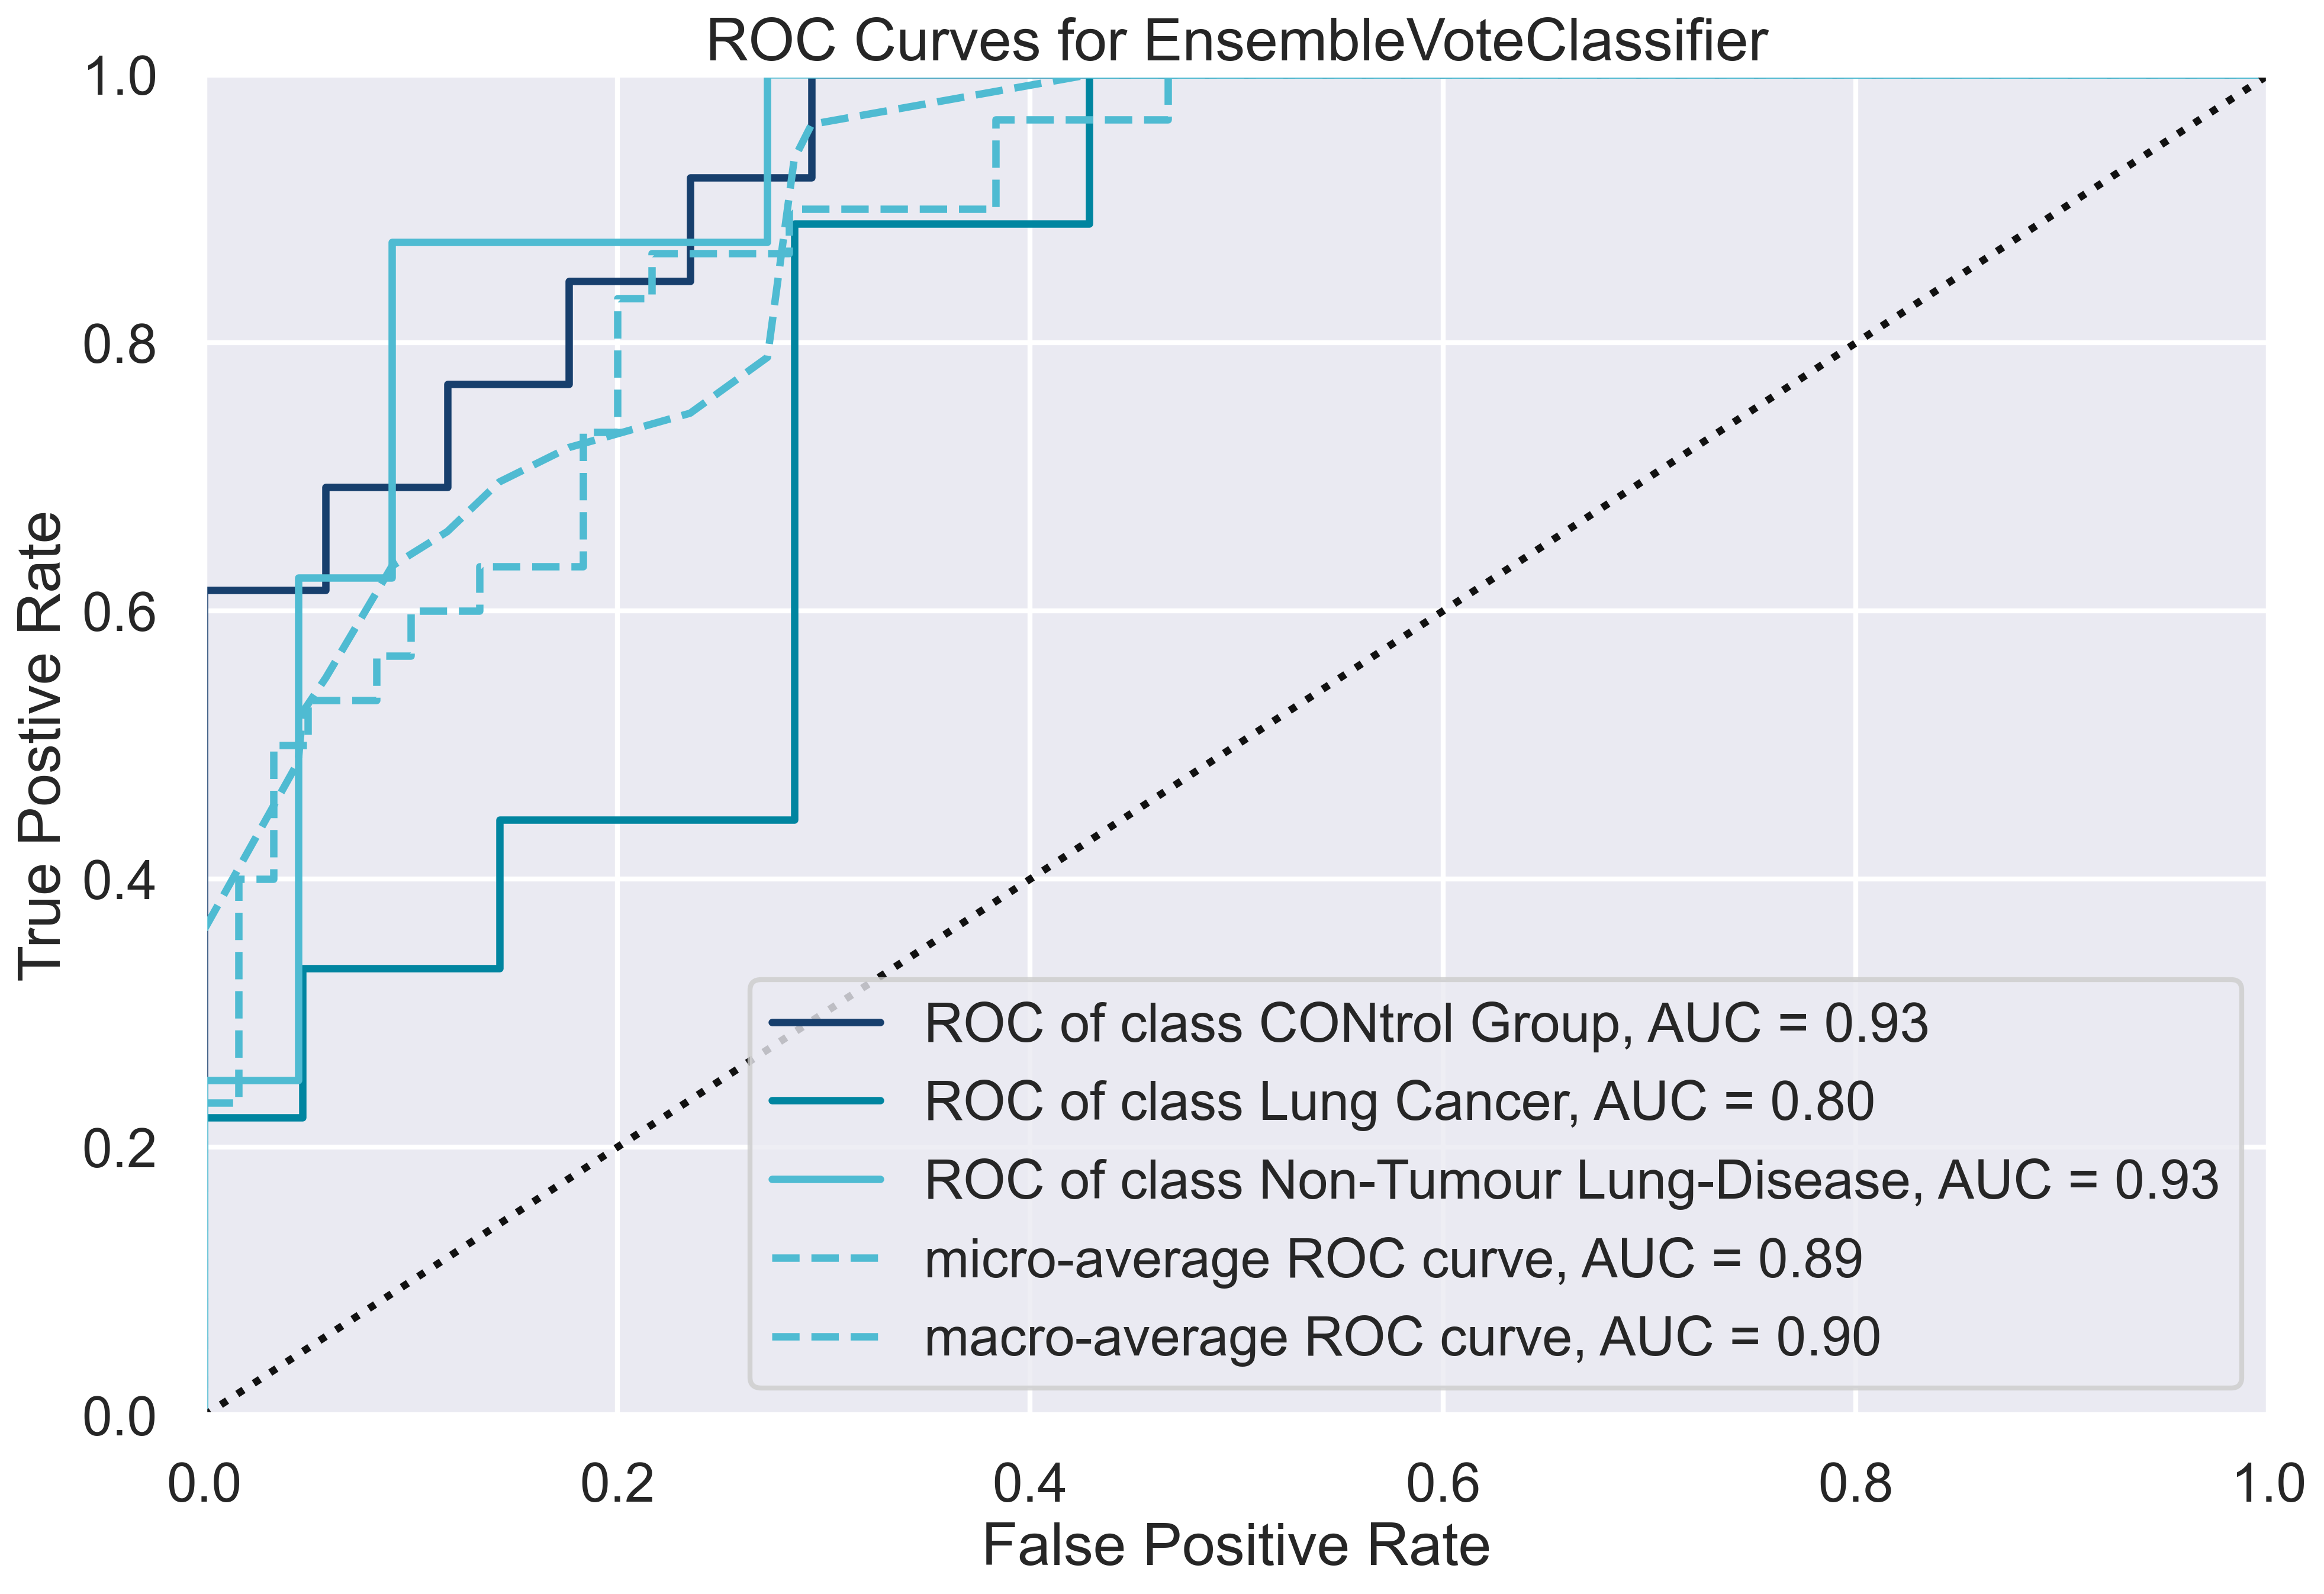

In [147]:
# Top Model (EVCLF) + TOP14

# EVCLF_eval Classification model is already instantiated

# change set for better visualisation
plt.figure(figsize=(15,10), dpi=300)
sns.set_context("poster")

# Instantiate the visualizer
# 0 = CON (CONtrol Group), 1 = LCa (Lung Cancer), 2 = NTLD (Non-Tumour Lung-Disease)
visualizer_rocauc = ROCAUC(EVCLF_eval, 
                           classes=["CONtrol Group", "Lung Cancer", "Non-Tumour Lung-Disease"], 
                           per_class=True)

# The model is already fitted to the data
# Fit the training data to the visualizer
visualizer_rocauc.fit(X_train_top14, y_train)

# Evaluate the model on the test data
visualizer_rocauc.score(X_eval_top14, y_eval)        

# Finalize and render the figure
visualizer_rocauc.show(outpath="figures/roc_final_evclf", transparent=True)

/Users/P_Neubert/Anaconda/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


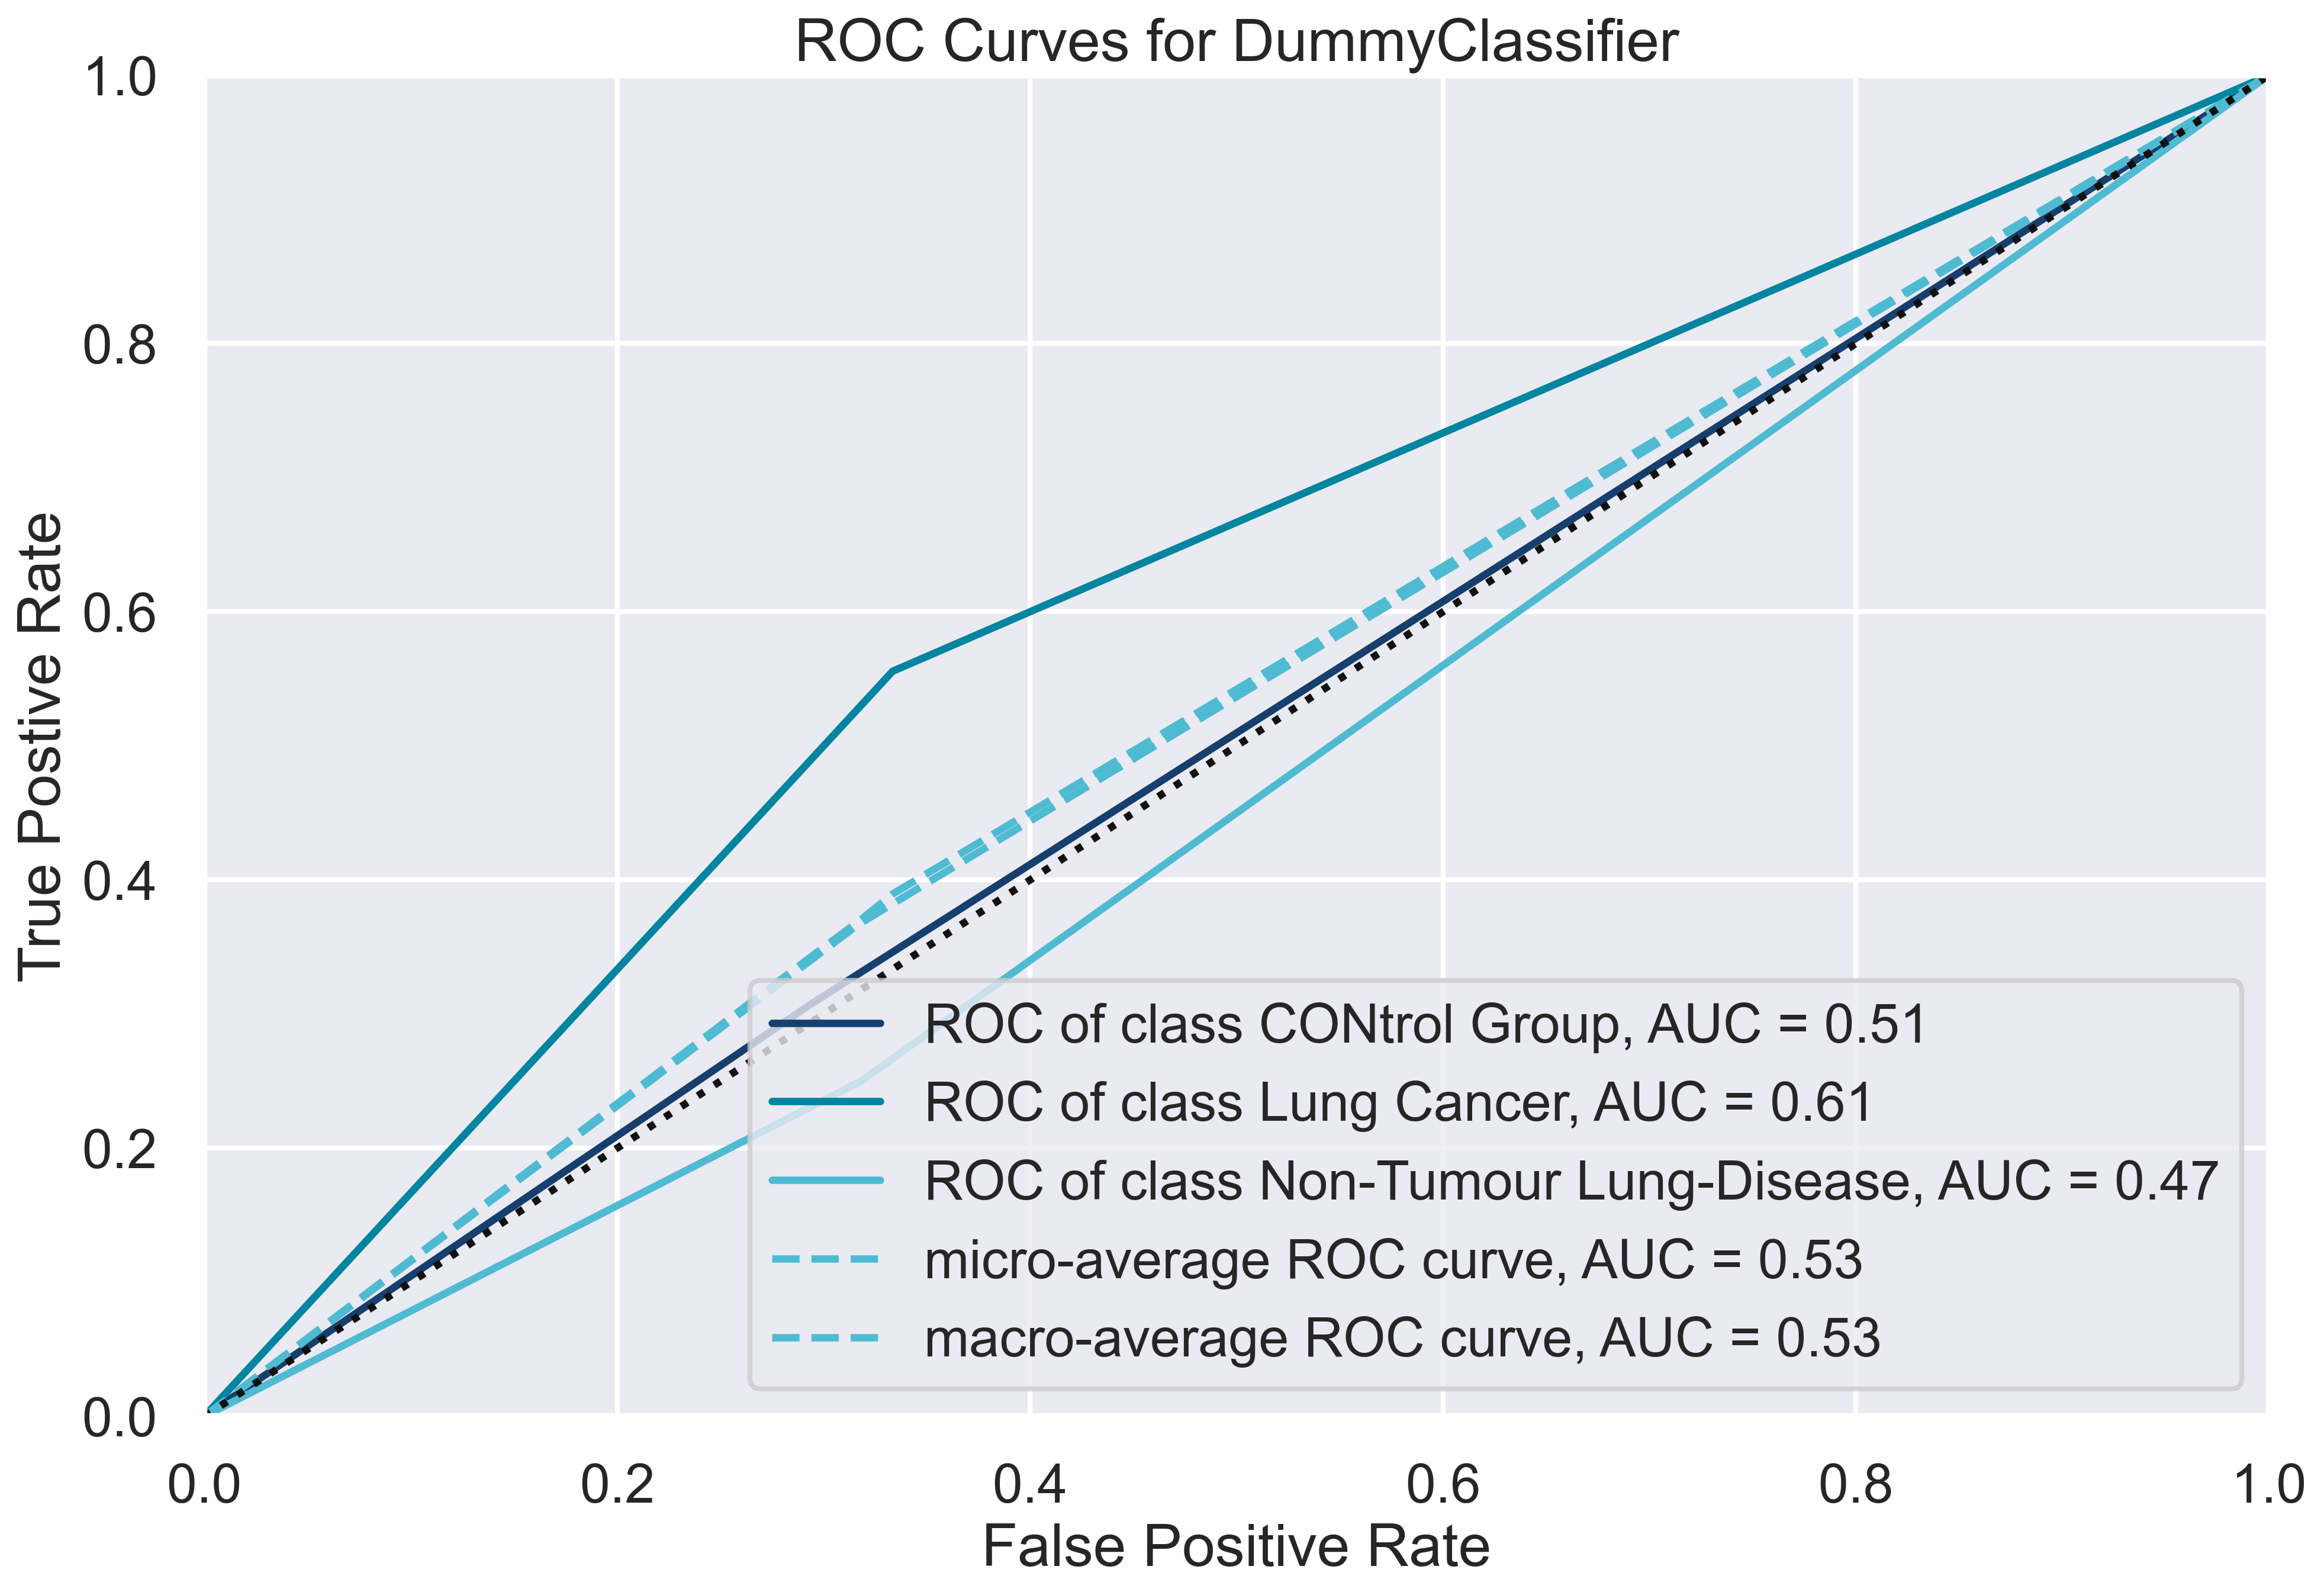

In [148]:
# Baseline Model Dummy Classifier (DC) + TOP14

# dummy_eval Classification model is already instantiated

# change set for better visualisation
plt.figure(figsize=(15,10), dpi=300)
sns.set_context("poster")

# Instantiate the visualizer
# 0 = CON (CONtrol Group), 1 = LCa (Lung Cancer), 2 = NTLD (Non-Tumour Lung-Disease)
visualizer_rocauc = ROCAUC(dummy_eval, 
                           classes=["CONtrol Group", "Lung Cancer", "Non-Tumour Lung-Disease"], 
                           per_class=True)

# The model is already fitted to the data
# Fit the training data to the visualizer
visualizer_rocauc.fit(X_train_top14, y_train)

# Evaluate the model on the test data
visualizer_rocauc.score(X_eval_top14, y_eval)        

# Finalize and render the figure
visualizer_rocauc.show(outpath='figures/roc_final_dummy', transparent=True);

/Users/P_Neubert/Anaconda/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


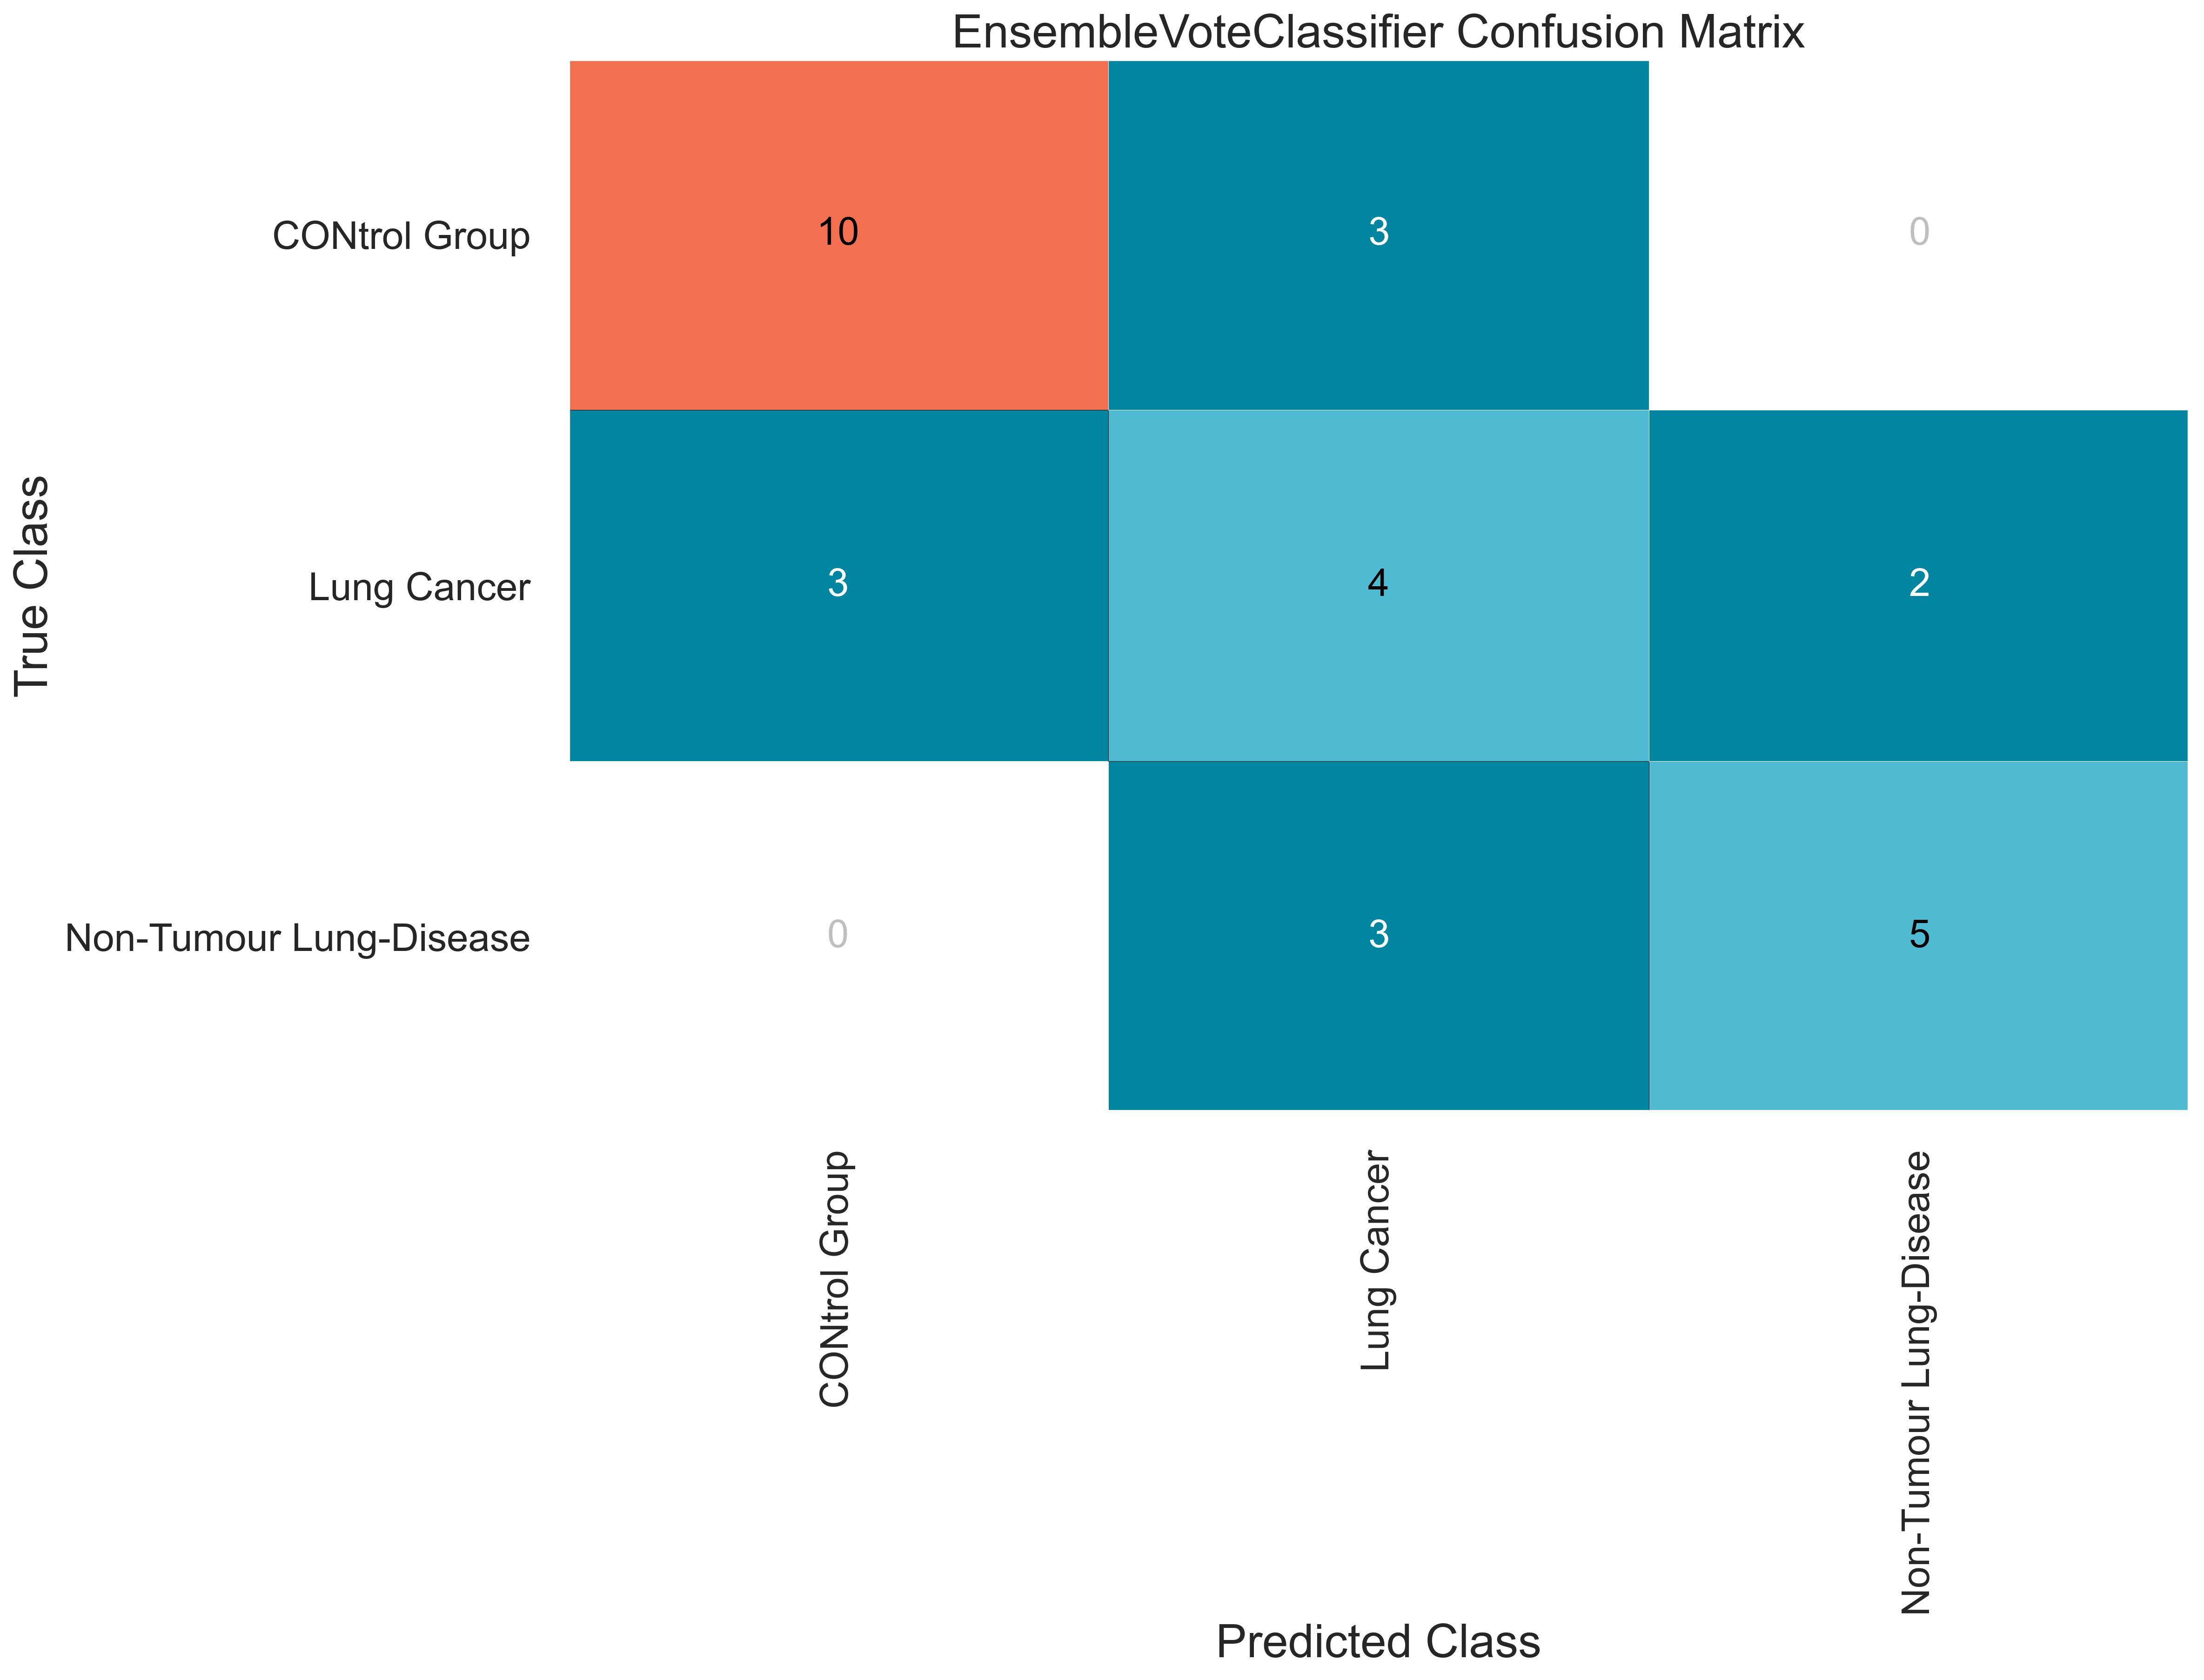

In [149]:
# Top Model (EVCLF) + TOP14

# change set for better visualisation
plt.figure(figsize=(15,10), dpi=300)
sns.set_context("poster")

# Instantiate the visualizer
# 0 = CON (CONtrol Group), 1 = LCa (Lung Cancer), 2 = NTLD (Non-Tumour Lung-Disease)
visualizer_cm = ConfusionMatrix(EVCLF_eval,        
                                classes=["CONtrol Group", "Lung Cancer", "Non-Tumour Lung-Disease"],
                                cmap= current_palette,
                                fontsize=20)                                      

# Fit the training data to the visualizer
visualizer_cm.fit(X_train_top14, y_train)

# Evaluate the model on the test data
visualizer_cm.score(X_eval_top14, y_eval)

# Finalize and render the figure
visualizer_cm.show(outpath='figures/confusion_final_evclf', transparent=True);

/Users/P_Neubert/Anaconda/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


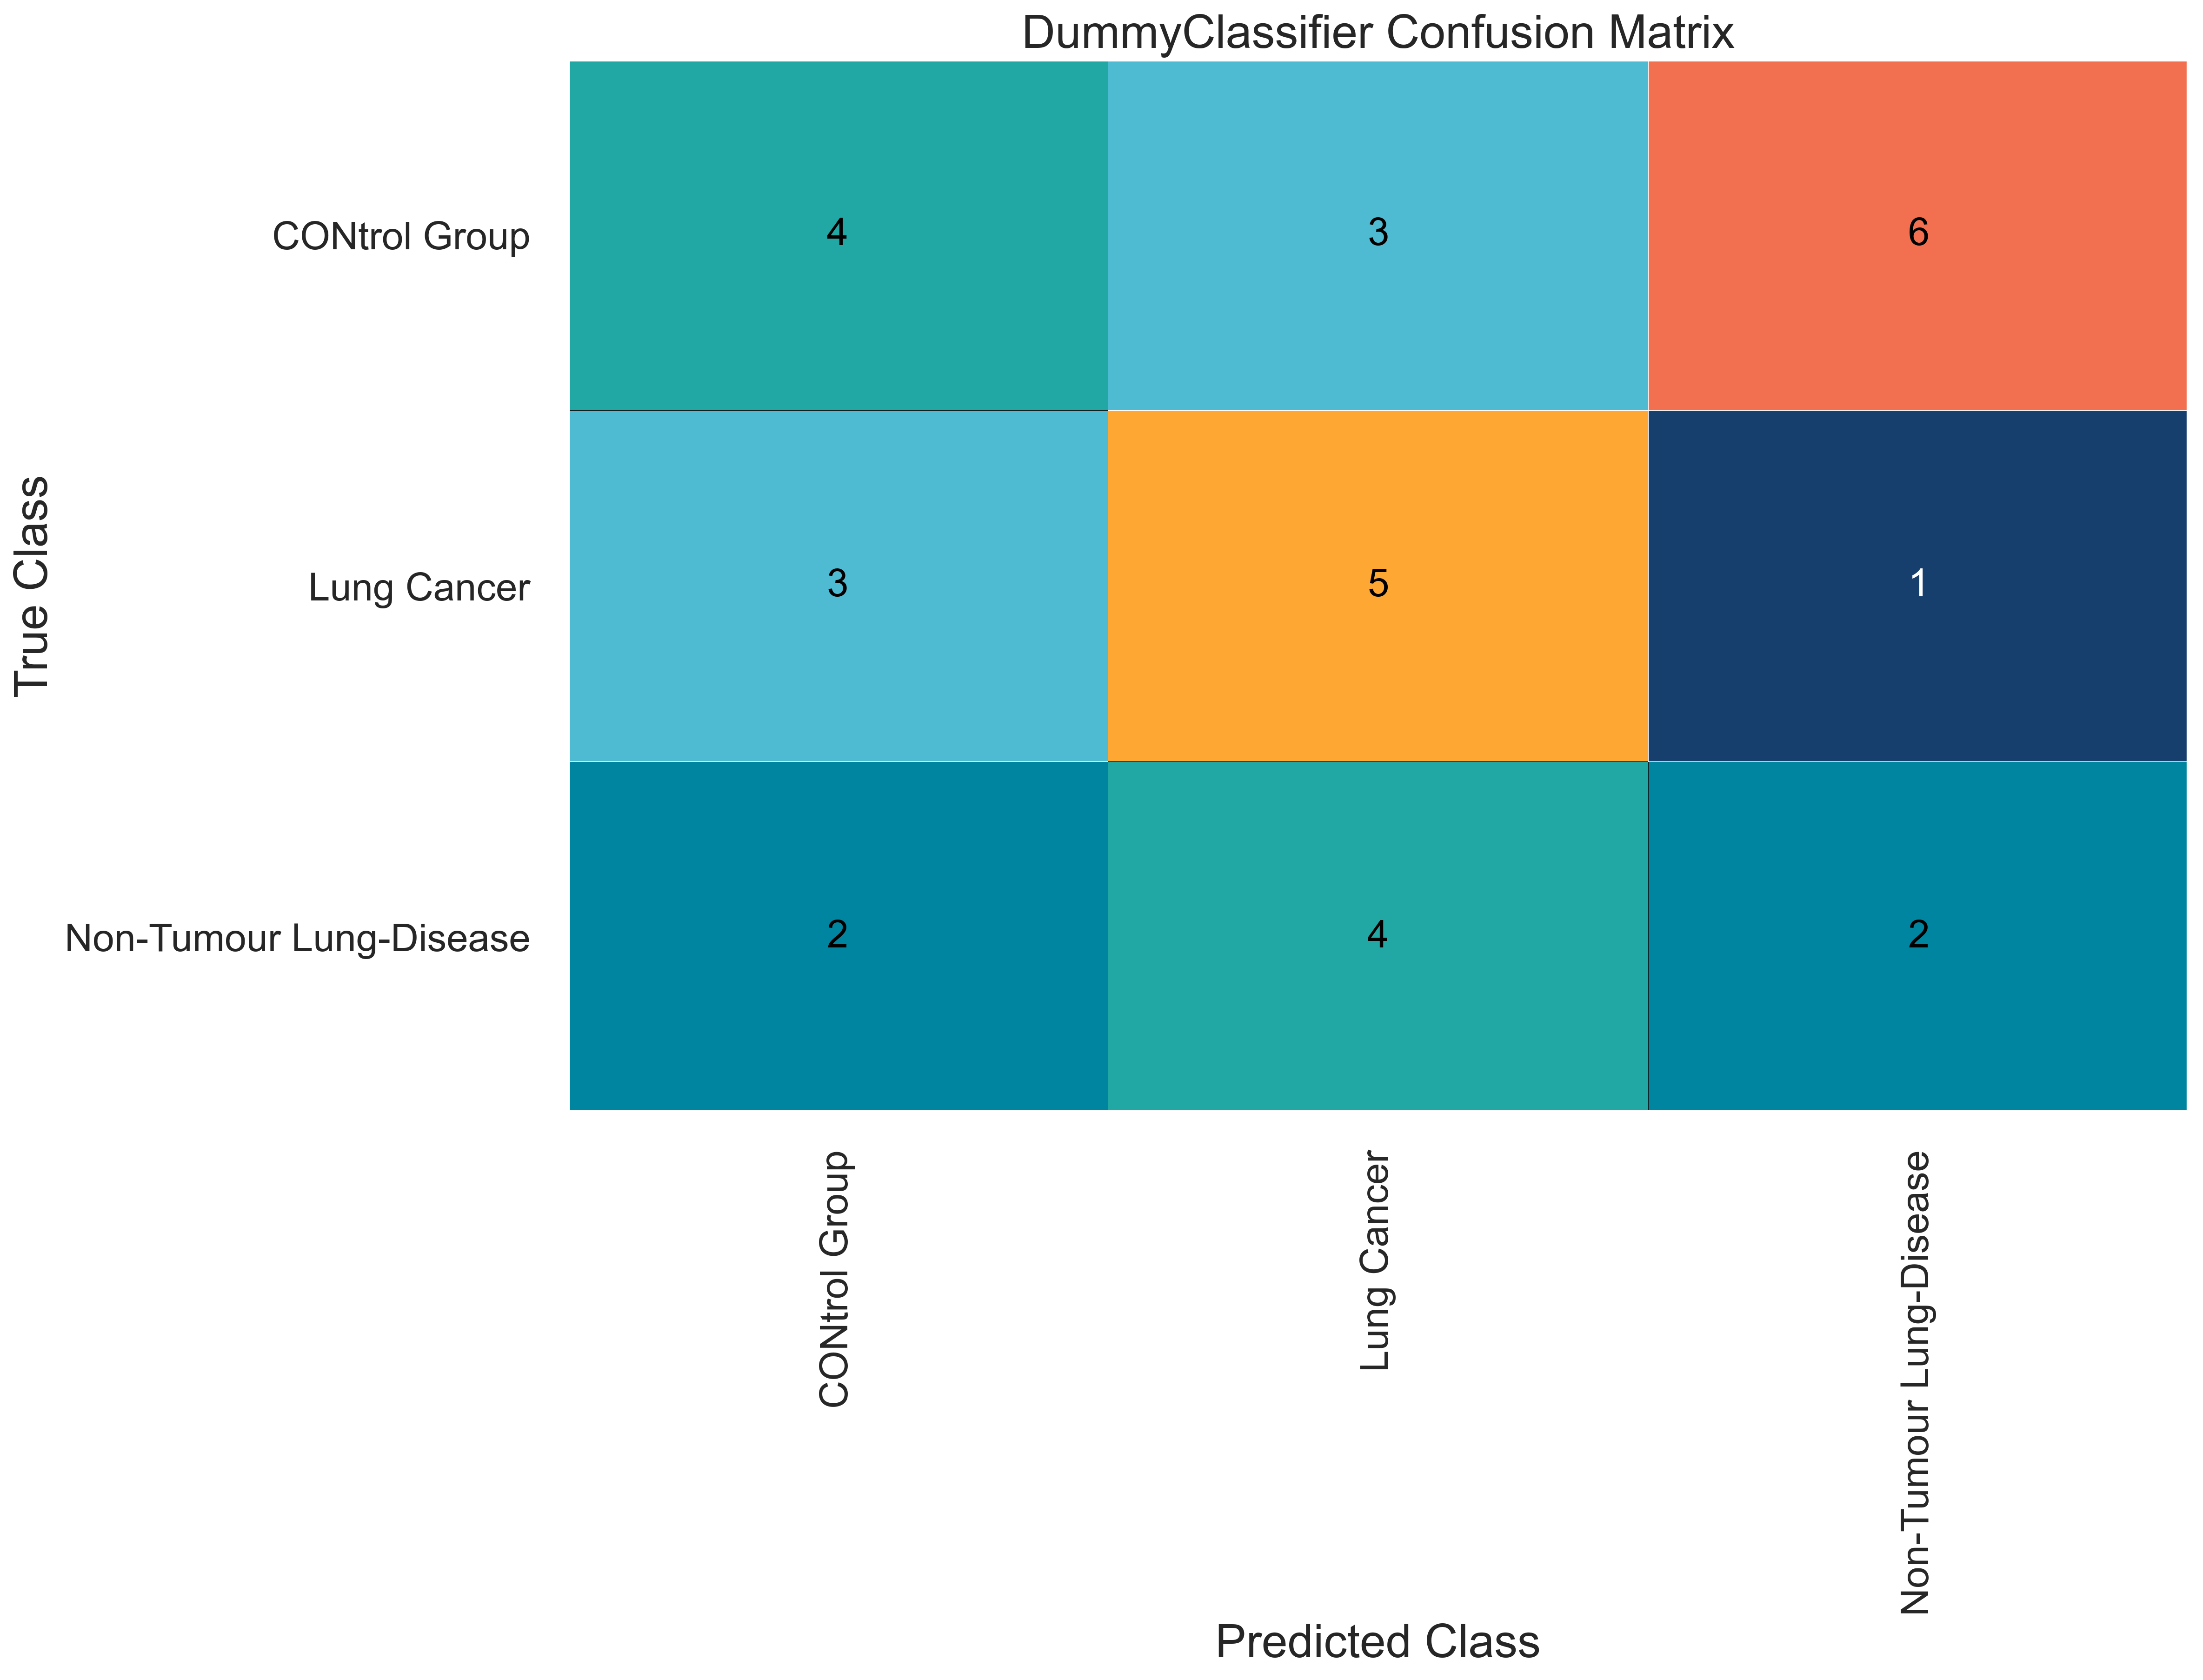

In [150]:
# Baseline Model Dummy Classifier (DC) + TOP14

# change set for better visualisation
plt.figure(figsize=(15,10), dpi=300)
sns.set_context("poster")

# Instantiate the visualizer
# 0 = CON (CONtrol Group), 1 = LCa (Lung Cancer), 2 = NTLD (Non-Tumour Lung-Disease)
visualizer_cm = ConfusionMatrix(dummy_eval,        
                                classes=["CONtrol Group", "Lung Cancer", "Non-Tumour Lung-Disease"],
                                cmap=current_palette,
                                fontsize=20)                                      

# Fit the training data to the visualizer
visualizer_cm.fit(X_train_top14, y_train)

# Evaluate the model on the test data
visualizer_cm.score(X_eval_top14, y_eval)

# Finalize and render the figure
visualizer_cm.show(outpath='figures/confusion_final_dummy', transparent=True);

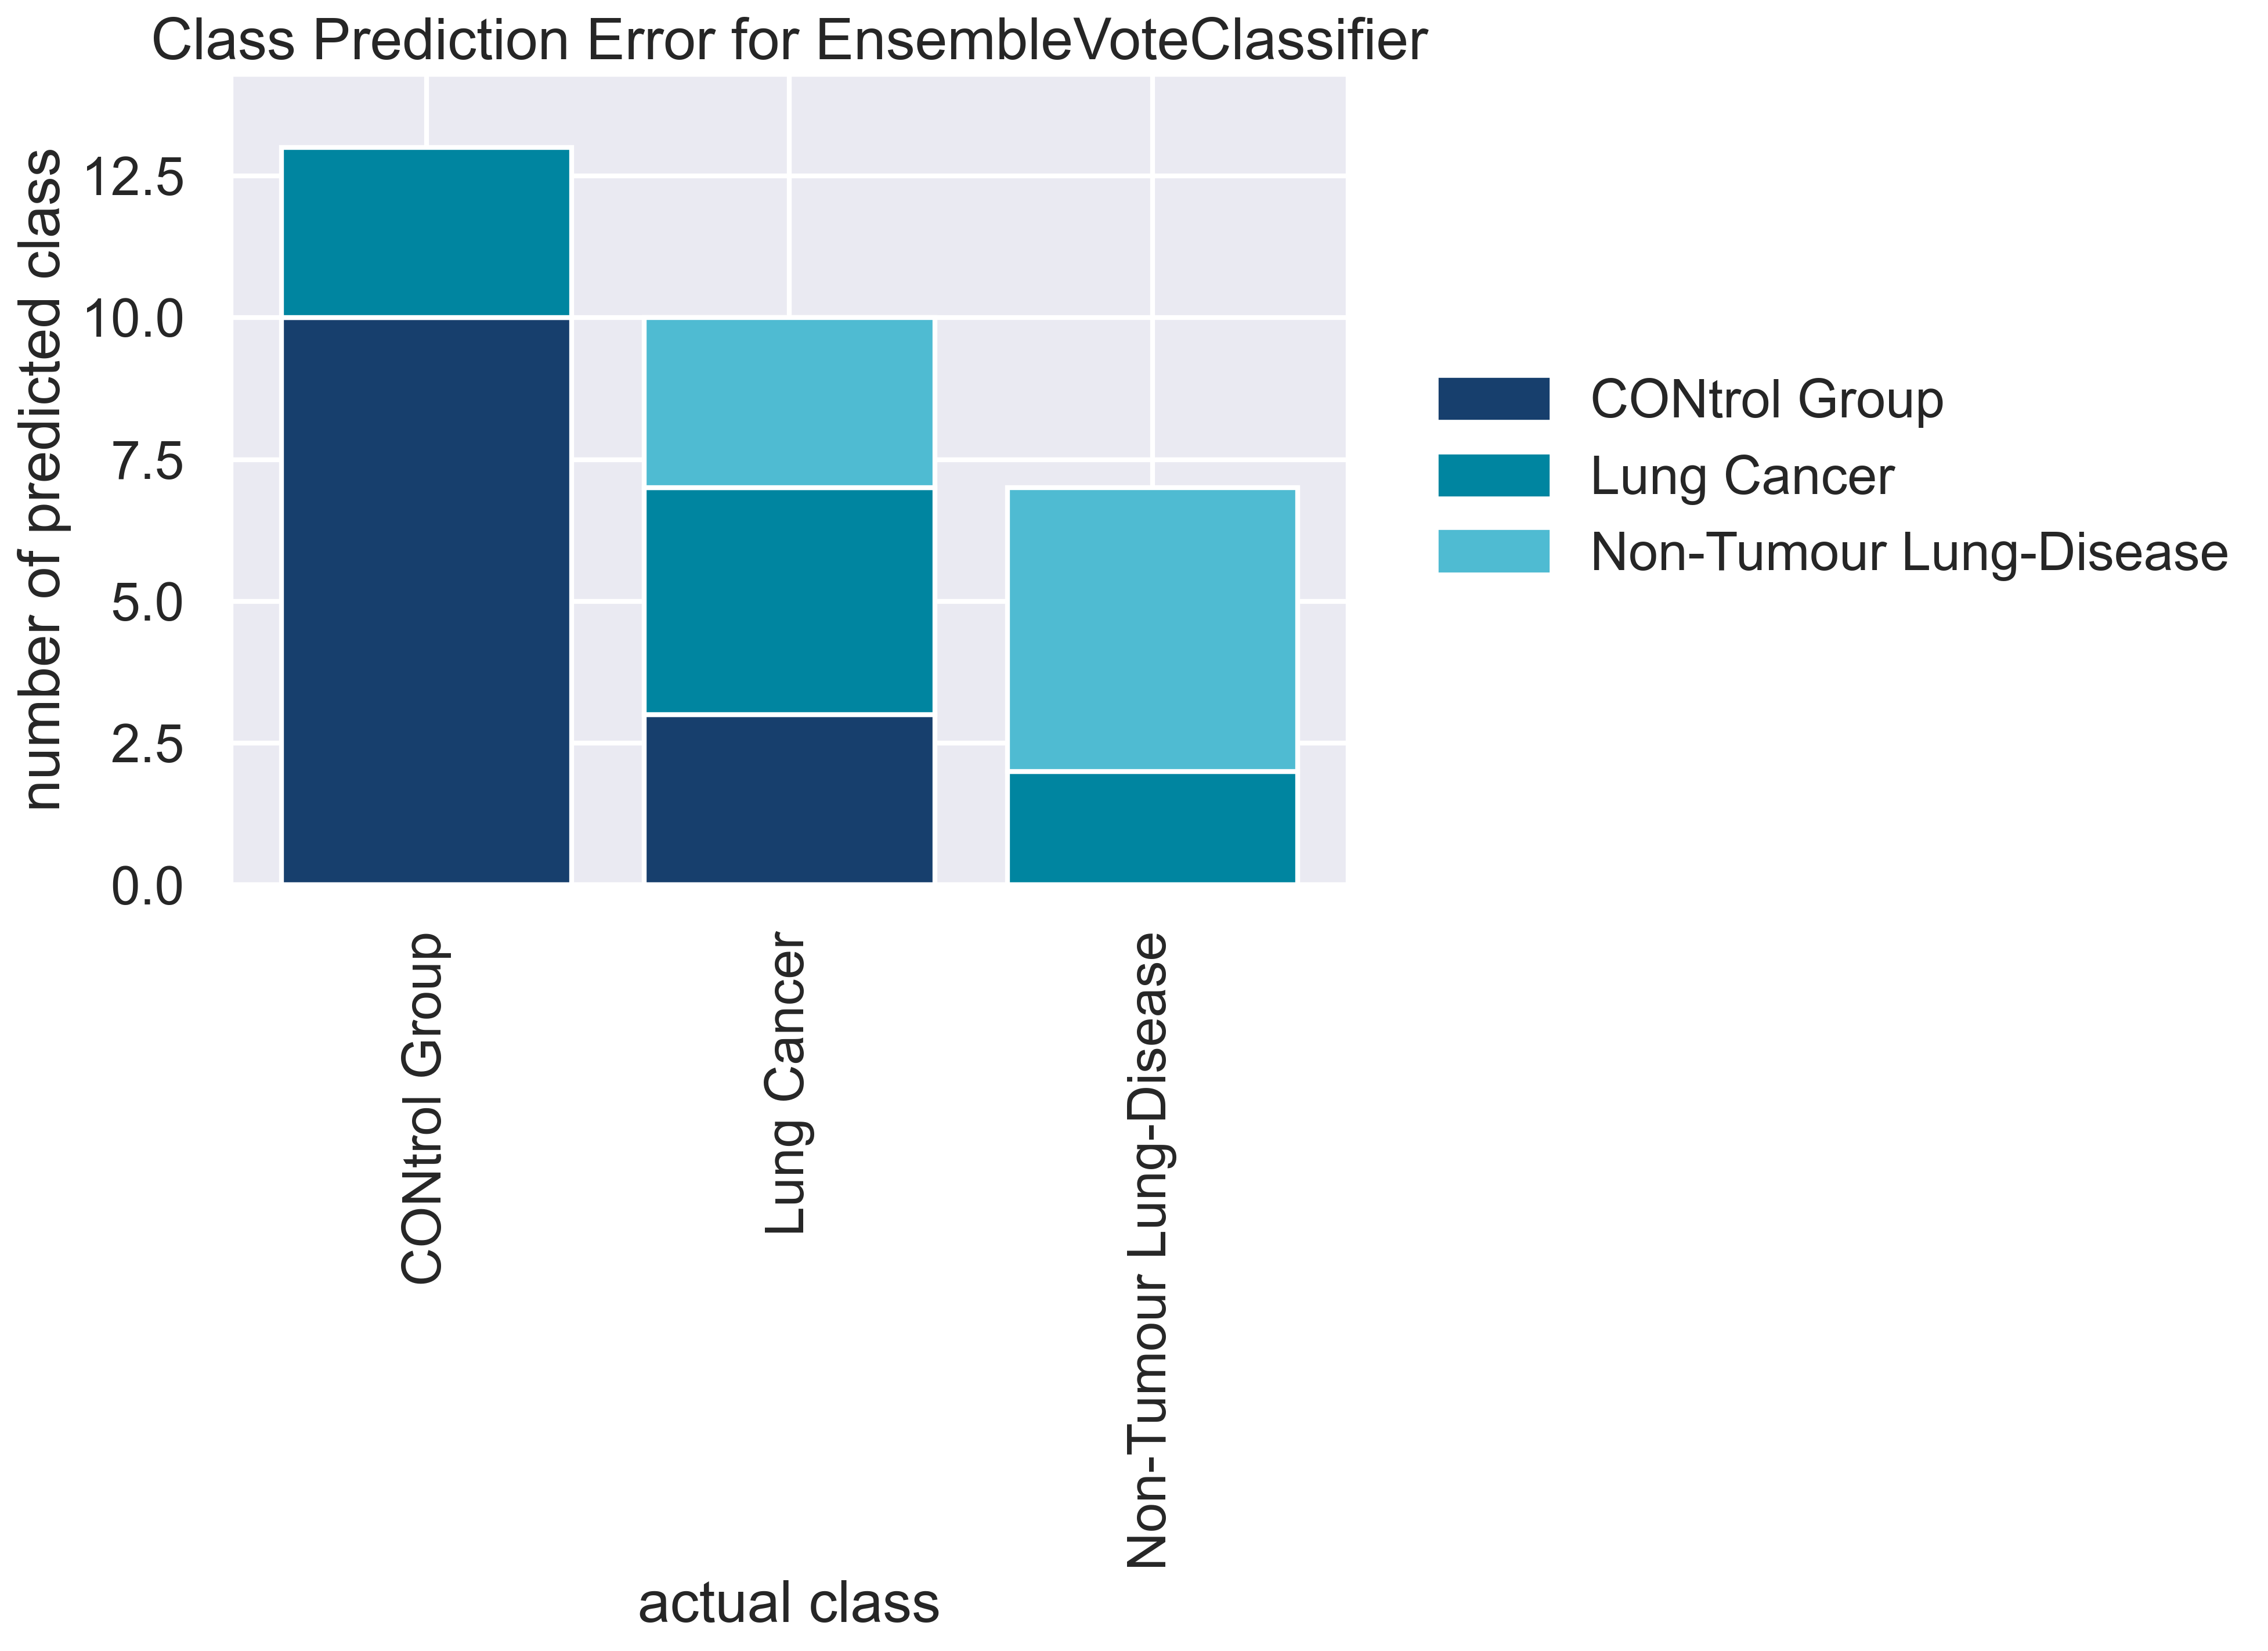

In [151]:
# Top Model (EVCLF) + TOP14

# change set for better visualisation
plt.figure(figsize=(15,10), dpi=300)
sns.set_context("poster")

# Instantiate the classification model and visualizer
# 0 = CON (CONtrol Group), 1 = LCa (Lung Cancer), 2 = NTLD (Non-Tumour Lung-Disease)
visualizer_cpe = ClassPredictionError(EVCLF_eval,        
                                      classes=["CONtrol Group", "Lung Cancer", "Non-Tumour Lung-Disease"])

# Fit the training data to the visualizer
visualizer_cpe.fit(X_train_top14, y_train)

# Evaluate the model on the test data
visualizer_cpe.score(X_eval_top14, y_eval)        

# Finalize and render the figure
visualizer_cpe.show(outpath='figures/prediction_error_final_evclf', transparent=True);

/Users/P_Neubert/Anaconda/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


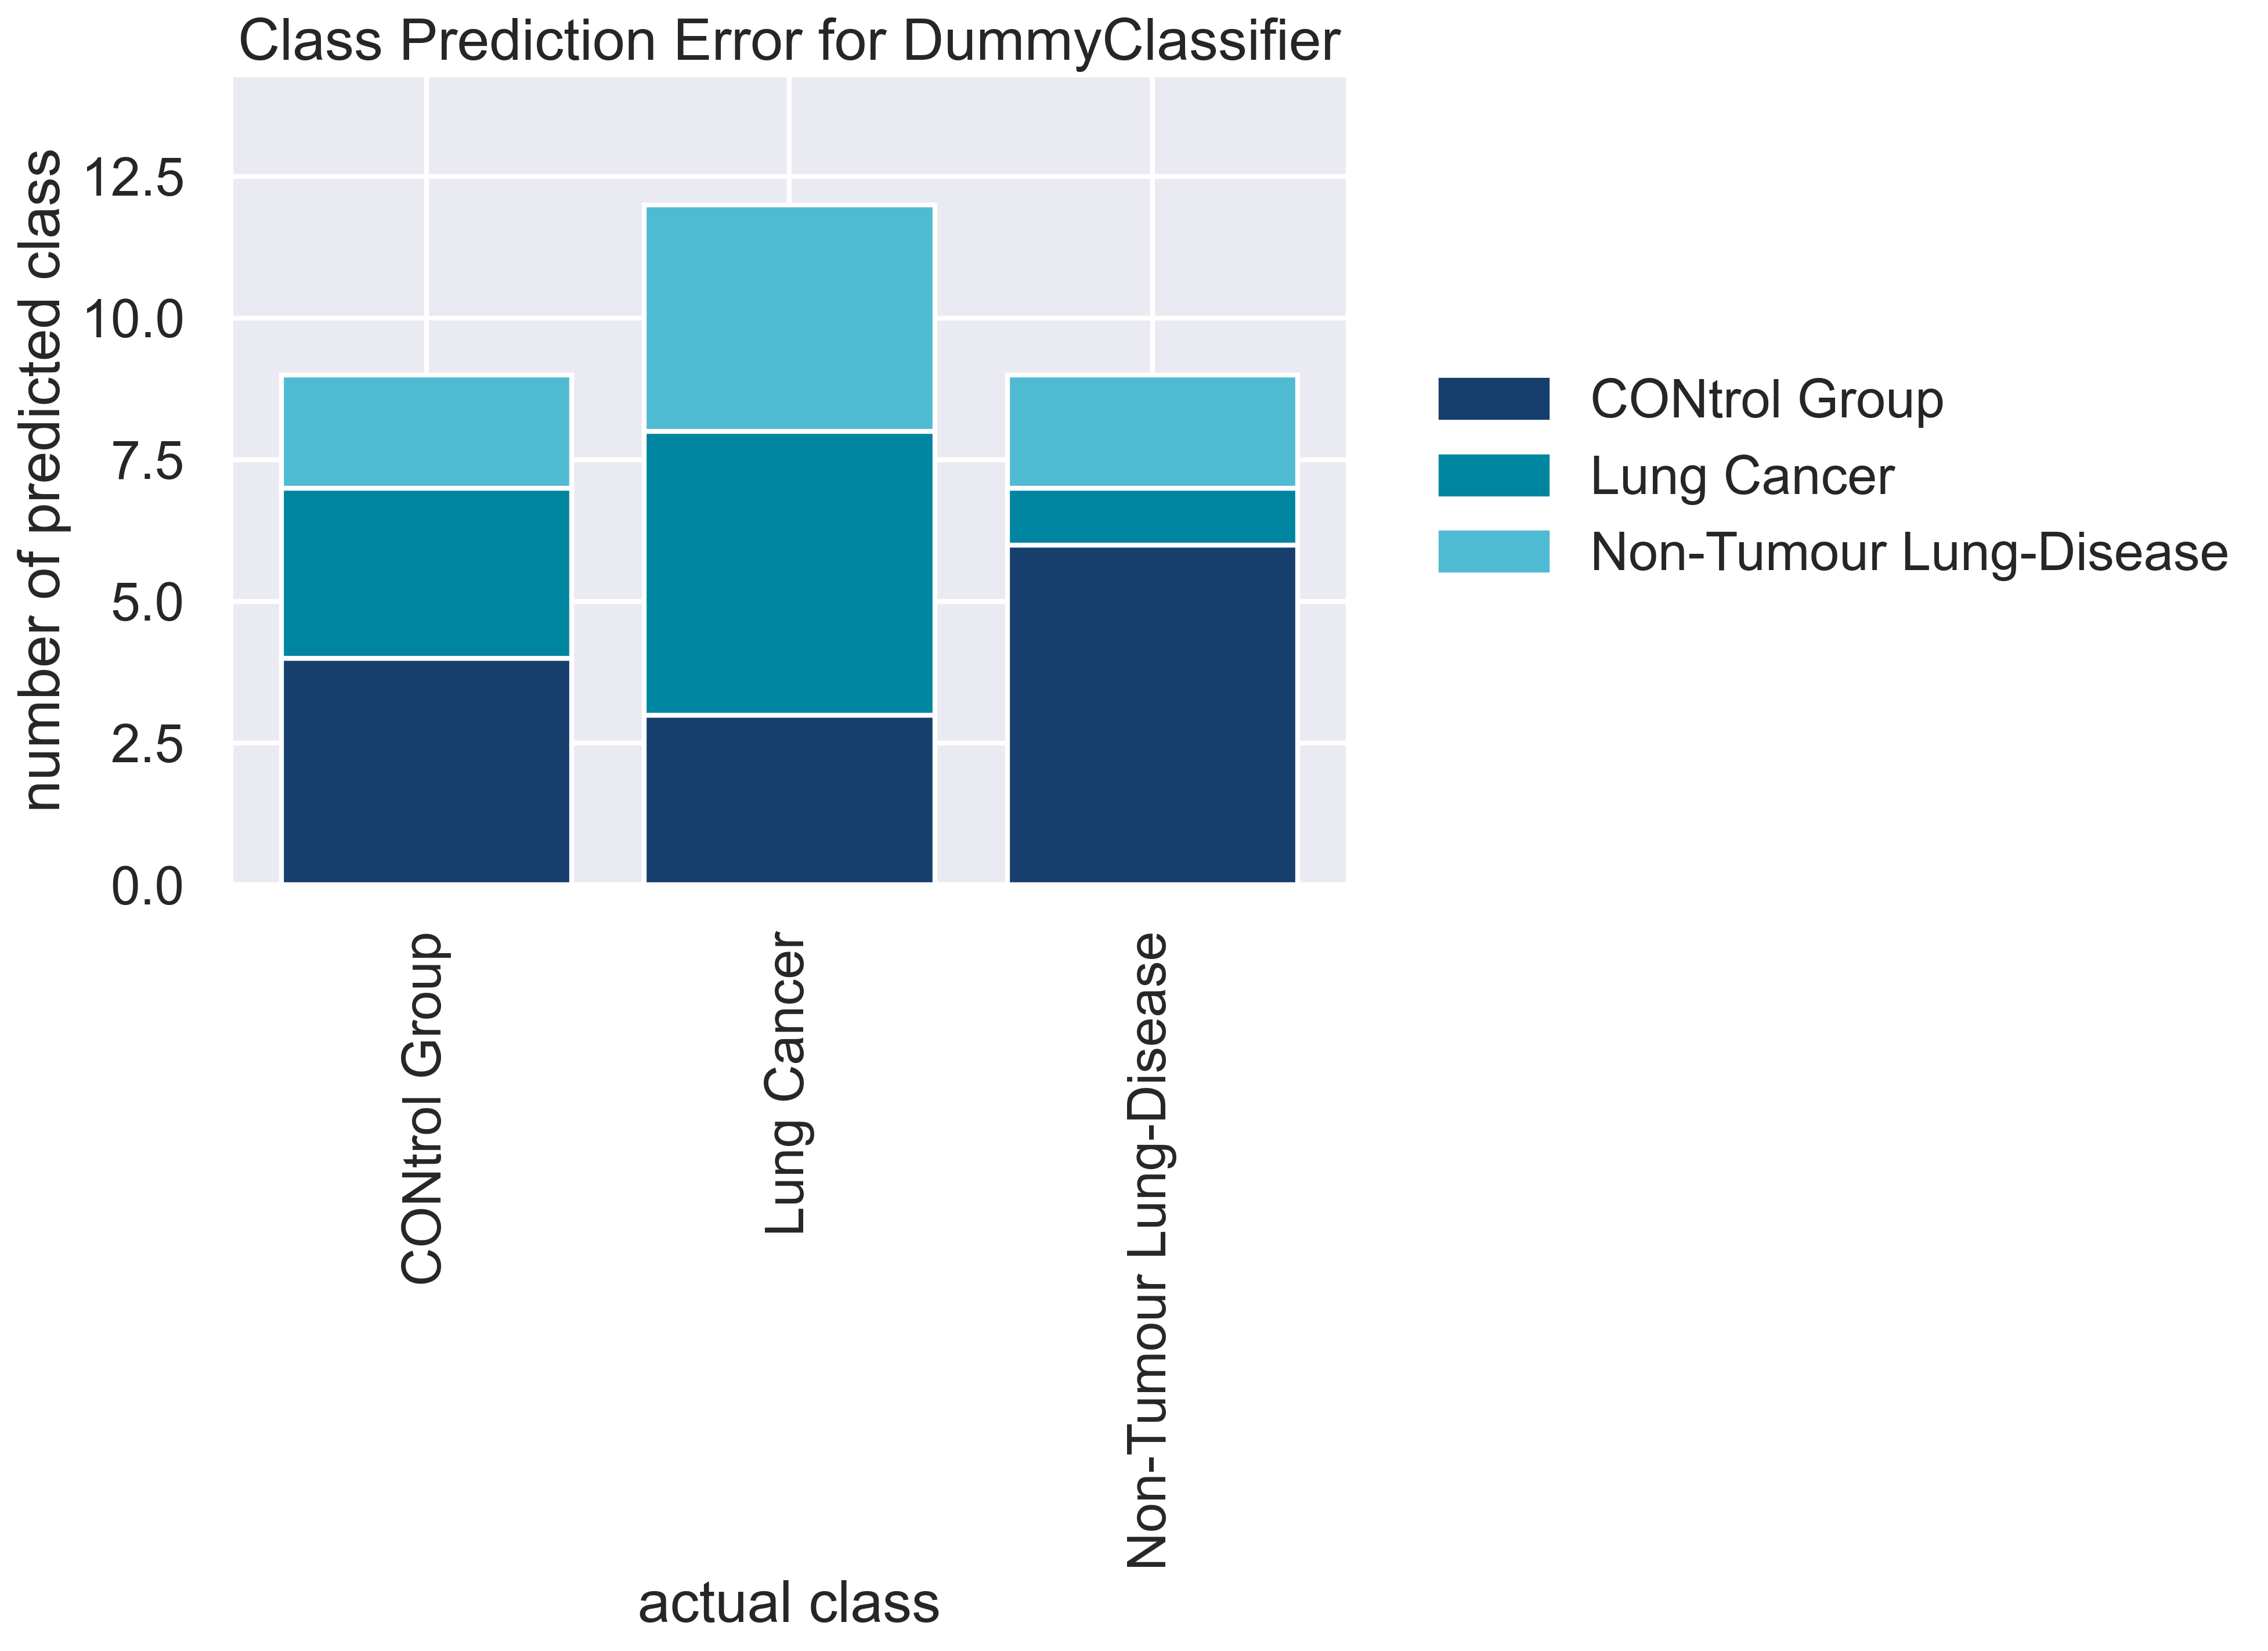

In [152]:
# Baseline Model Dummy Classifier (DC) + TOP14

# change set for better visualisation
plt.figure(figsize=(15,10), dpi=300)
sns.set_context("poster")

# Instantiate the classification model and visualizer
# 0 = CON (CONtrol Group), 1 = LCa (Lung Cancer), 2 = NTLD (Non-Tumour Lung-Disease)
visualizer_cpe = ClassPredictionError(dummy_eval,        
                                      classes=["CONtrol Group", "Lung Cancer", "Non-Tumour Lung-Disease"])

# Fit the training data to the visualizer
visualizer_cpe.fit(X_train_top14, y_train)

# Evaluate the model on the test data
visualizer_cpe.score(X_eval_top14, y_eval)        

# Finalize and render the figure
visualizer_cpe.show(outpath='figures/prediction_error_final_dummy', transparent=True);

#### Summary

- No differences in model performances between TOP20 (Best) and TOP14 (Optimum) 
conditions.
- Both prediction model demonstrate fewer performance on evaluation data. The Final Precision Score (micro) is 63.3% with worst precision score for the Lung Cancer  class (LCa, class 1) with 40% (CONtrol group 77% (CON, class 0); Non-tumor Lung Disease 71% (NTLD, class 2)).
- In contrast the dummy classification demonstrates a Final Precision Score (micro) of 36.6% with 44%, 42% and 22% for CON, LCa and NTLD respectively.
- The Difference in Precision Score (micro) between my prediction model and the Dummy Clasification is 26.6 %.
- The Top Model predicts 4 from 10 LCa samples correct (40%), 5 from 7 NTLD samples (71%) and 10 from 13 samples of CON (77%). 
- In contrast the Dummy Classification predicts 5 from 12 LCa samples correct (42%), 2 from 9 NTLD samples (22%) and 4 from 9 samples from CON (44%).


- This underperformance could be the result of overfitting the training data.
- Unfortunately the class LCa represents the worst precision


- If assessing my Top Model in the context as screening tool:

    - From 9 Lung Cancer cases, 4 are classified correct, 3 are classified as CONtrol and 2 are classified as Non-Tumour Lung-Disease. Those patients classifed as NTLD have still the chance to be identified as Lung Cancer from a medical doctor during further examination validating the screening results. Nevertheless the 3 patients in the CONtrol group will be undiscovered in the screening process.
    - 3 from 13 patients in the CONtrol group are classified as Lung Cancer (not very precise) which causes unnecessary anxieties, but NTLD can be excludud as diagnosis option.
    - 3 from 8 of NTLD cases are classified as Lung Cancer, but 0 as CONtrol. Luckily, patients would receive a lung examination and would not be undiscovered in the screening process giving them a chance to cure their NTLD.






## Visualisation

### Correlation Heatmap

For a better insight how the TOP20 (or TOP14) miRNA contribute to my prediction model, I perform a correlation analysis on their relation with the group labels Lung Cancer, Non-Tumor Lung Disease and CONtrol. Then I visualize this in (different) heatmaps. There the single miRNA is shown by color code for negative-, positive- or non-correlation together with the correlation value.

In [153]:
# first create a Dataframe for correlation analysis
df_corr = df4.copy()

# for better correlation I need to convert my categorical labels to dummy variable (don´t drop first)
# this means one column for each label
# 0 = CON (CONtrol Group), 1 = LCa (Lung Cancer), 2 = NTLD (Non-Tumour Lung-Disease)

label_dummies = pd.get_dummies(df_corr.Label, drop_first=False)

# for convinience and nicer pictures rename columns
label_dummies = label_dummies.rename(columns={0:"CONtrol Group"})
label_dummies = label_dummies.rename(columns={1:"Lung Cancer"})
label_dummies = label_dummies.rename(columns={2:"Non-Tumour Lung-Disease"})

# Then Create TOP20 Features and use dataframe_selection function for creating new dataframe with TOP20 from initial dataframe
corr_top20 = dataframe_selection(results_TBC["TBC"], X_train=df_corr)

# Then merge datasets for TOP20
corr_top20_merge = pd.concat([corr_top20, label_dummies], axis=1)

In [154]:
# TOP14 for an alternative Heatmap

# Create TOP14 Features and use dataframe_selection function for creating new dataframe with TOP14 from initial dataframe
corr_top14 = dataframe_selection(TOP14_dict["TOP14"], X_train=df_corr)

# Merge datasets for TOP14
corr_top14_merge = pd.concat([corr_top14, label_dummies], axis=1)

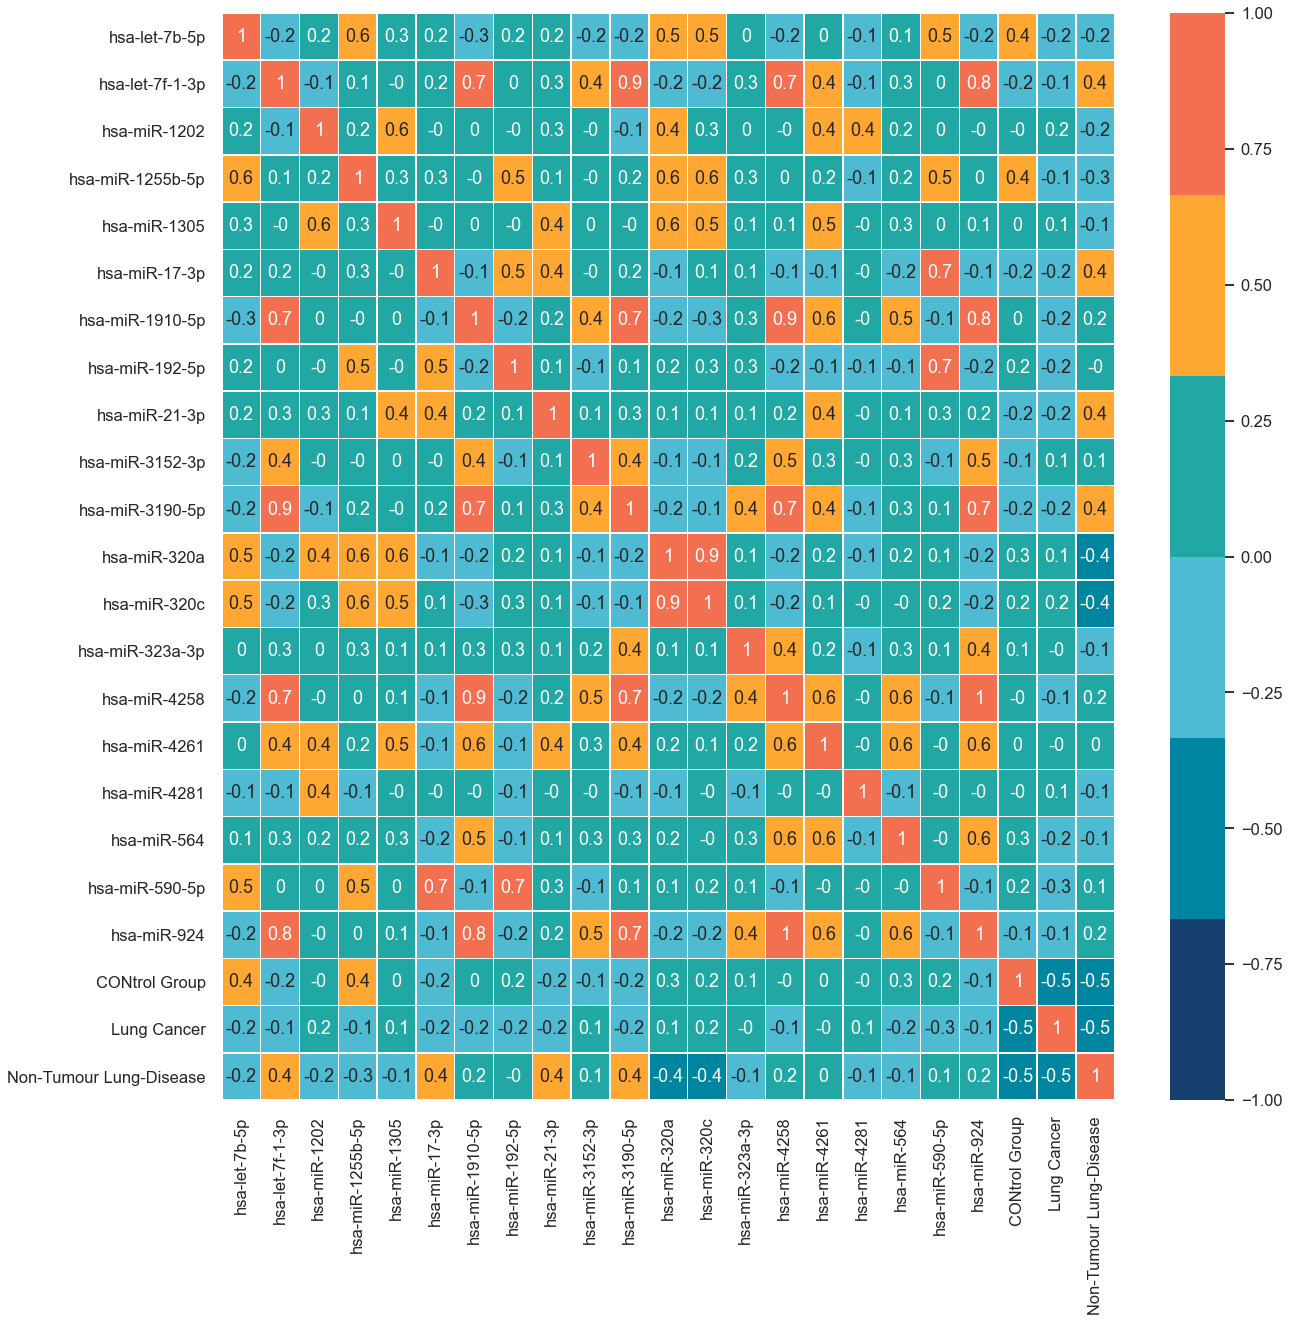

In [155]:
# Correlate features
correlation_TOP20 = corr_top20_merge.corr()
correlation_TOP20_rounded = corr_top20_merge.corr().round(1)

# change set for better visualisation
sns.set_context("talk")

# and use heatmap function
heatmap(correlation_TOP20_rounded, name_savefig="figures/heatmap_top20", cmap=vintage);

In [156]:
# check the top values in correlation
# copy correlation to prevent changing datastructure
corr_matrix = correlation_TOP20.copy().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
top_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))

# the top_corr series shows the pairs with the biggest correlation (check TOP10)
top_corr[0:10]

hsa-miR-4258     hsa-miR-924        0.978600
hsa-let-7f-1-3p  hsa-miR-3190-5p    0.944446
hsa-miR-320a     hsa-miR-320c       0.928536
hsa-miR-1910-5p  hsa-miR-4258       0.890338
                 hsa-miR-924        0.826943
hsa-let-7f-1-3p  hsa-miR-924        0.752080
hsa-miR-3190-5p  hsa-miR-4258       0.747048
hsa-let-7f-1-3p  hsa-miR-4258       0.746174
hsa-miR-3190-5p  hsa-miR-924        0.732490
hsa-miR-17-3p    hsa-miR-590-5p     0.704817
dtype: float64

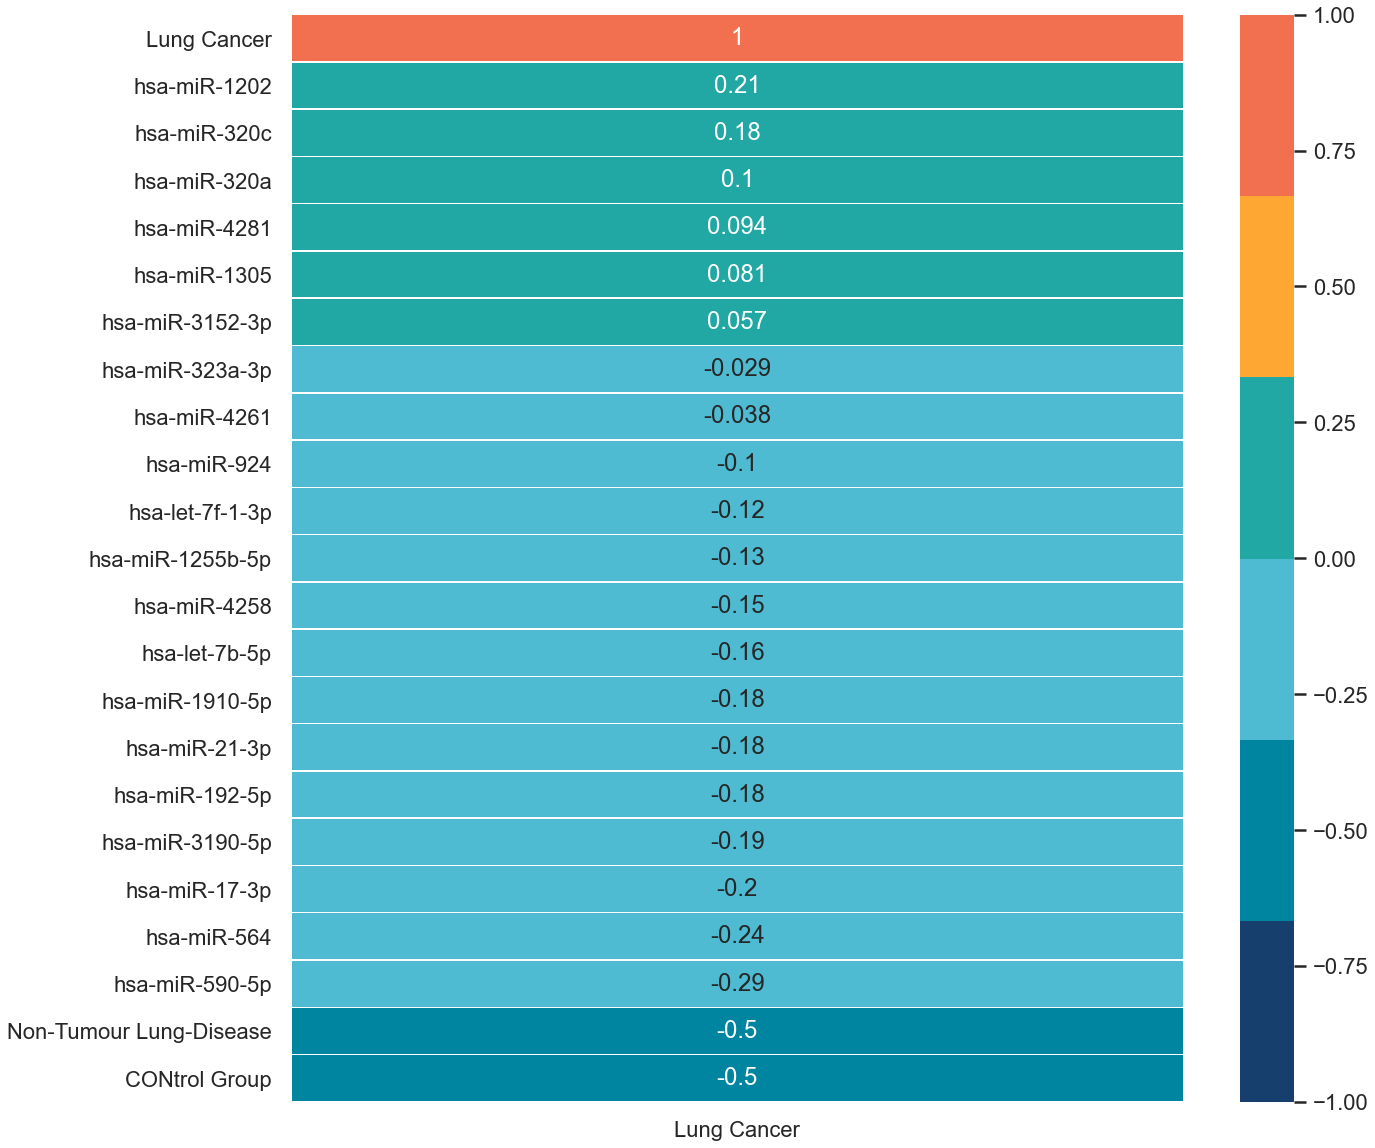

In [157]:
# Check for Label details for Lung Cancer
heatmap_LCa = correlation_TOP20[['Lung Cancer']].sort_values(by=['Lung Cancer'],ascending=False)

# change set for better visualisation
sns.set_context("poster")
                                                       
heatmap(heatmap_LCa, name_savefig="figures/heatmap_LCa", cmap=vintage)                                                   

In [158]:
# TOP10 correlations (absolut without Labels) Lung Cancer
heatmap_LCa.abs().sort_values(by="Lung Cancer", ascending=False)[3:13]

Lung Cancer
hsa-miR-590-5p      0.291443
hsa-miR-564         0.238357
hsa-miR-1202        0.206681
hsa-miR-17-3p       0.203726
hsa-miR-3190-5p     0.189939
hsa-miR-192-5p      0.184830
hsa-miR-320c        0.180099
hsa-miR-21-3p       0.177230
hsa-miR-1910-5p     0.176326
hsa-let-7b-5p       0.157279

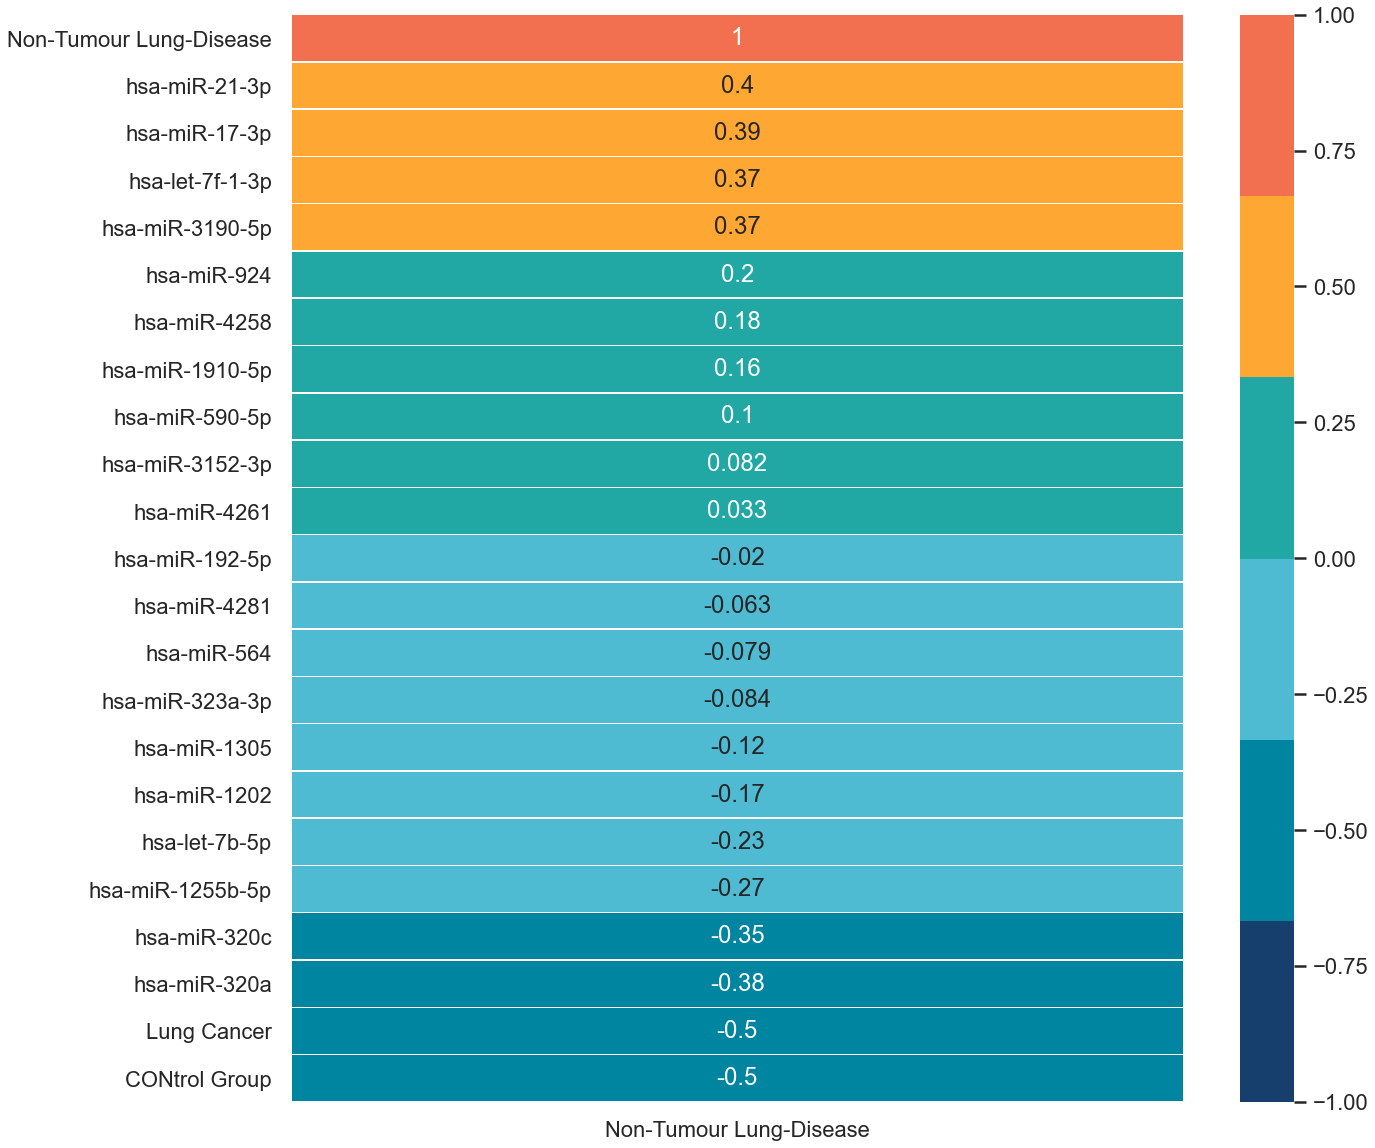

In [159]:
# Check for Label details for Non-Tumour Lung-Disease
heatmap_NTLD = correlation_TOP20[['Non-Tumour Lung-Disease']].sort_values(by=['Non-Tumour Lung-Disease'],ascending=False)

# change set for better visualisation
sns.set_context("poster")

heatmap(heatmap_NTLD, name_savefig="figures/heatmap_NTLD", cmap=vintage)                                                   

In [160]:
# TOP10 correlations (absolut without Labels) Non-Tumour Lung-Disease
heatmap_NTLD.abs().sort_values(by='Non-Tumour Lung-Disease', ascending=False)[3:13]

Non-Tumour Lung-Disease
hsa-miR-21-3p                    0.403345
hsa-miR-17-3p                    0.386318
hsa-miR-320a                     0.375361
hsa-let-7f-1-3p                  0.366034
hsa-miR-3190-5p                  0.365890
hsa-miR-320c                     0.354102
hsa-miR-1255b-5p                 0.271708
hsa-let-7b-5p                    0.226251
hsa-miR-924                      0.204081
hsa-miR-4258                     0.183995

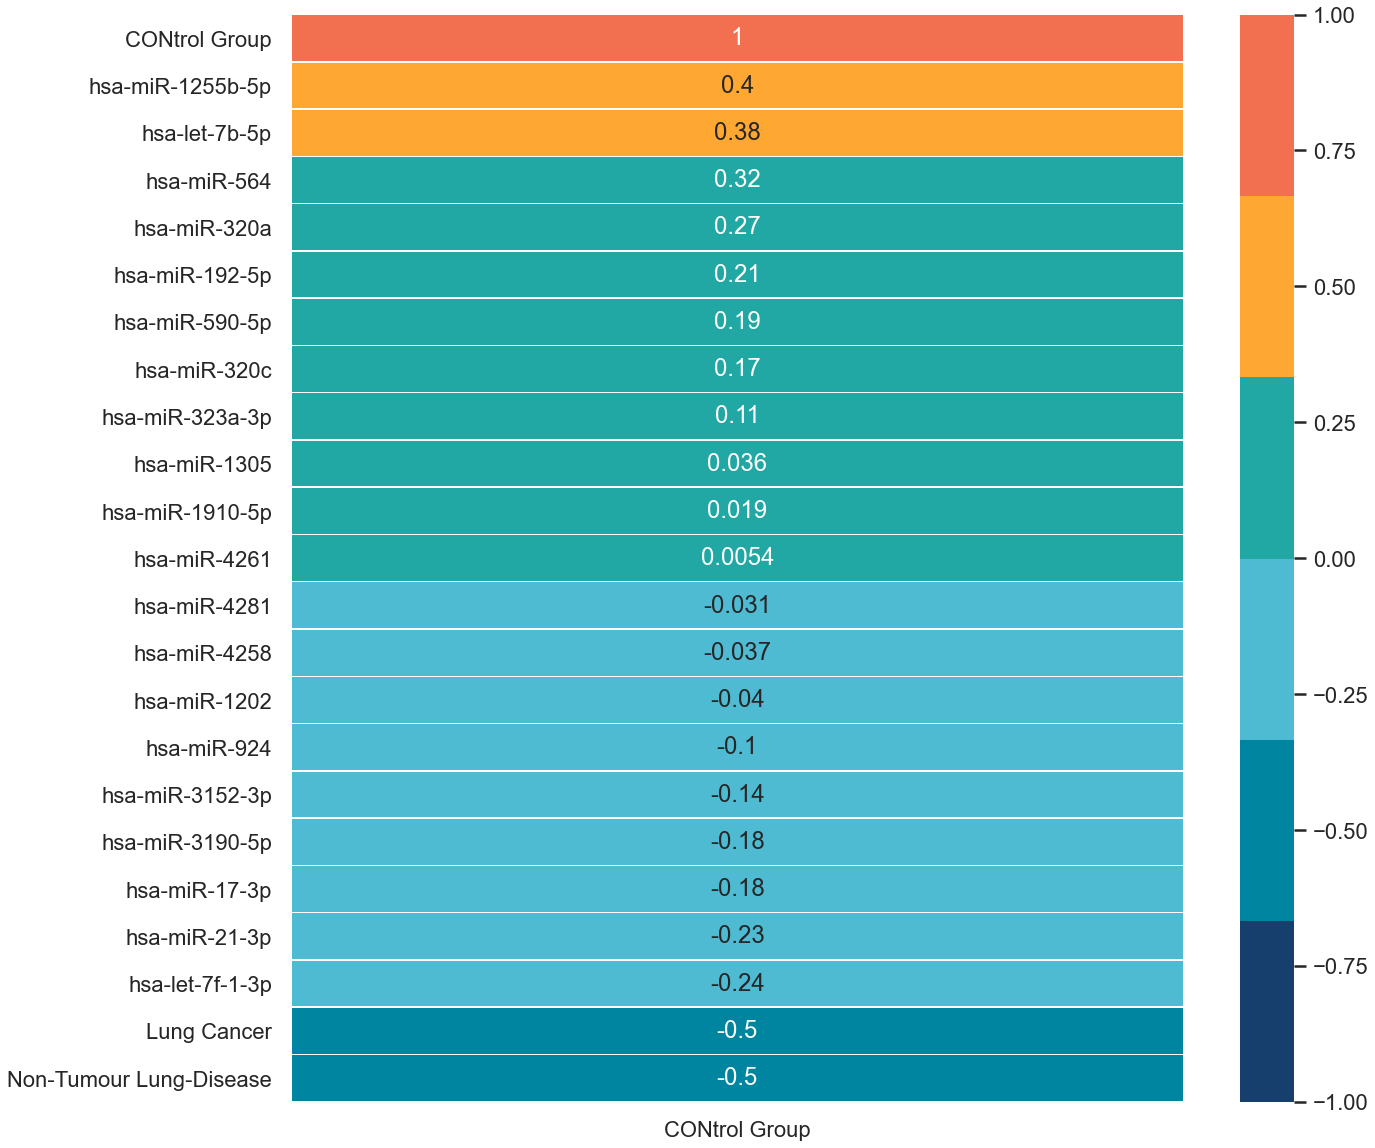

In [161]:
# Check for Label details CONtrol Group
heatmap_CON = correlation_TOP20[['CONtrol Group']].sort_values(by=['CONtrol Group'],ascending=False)

# change set for better visualisation
sns.set_context("poster")
                                                       
heatmap(heatmap_CON, name_savefig="figures/heatmap_CON", cmap=vintage)                                                   

In [162]:
# TOP10 correlations (absolut without Labels) CONtrol Group
heatmap_CON.abs().sort_values(by='CONtrol Group', ascending=False)[3:13]

CONtrol Group
hsa-miR-1255b-5p       0.402163
hsa-let-7b-5p          0.383530
hsa-miR-564            0.317400
hsa-miR-320a           0.274186
hsa-let-7f-1-3p        0.242168
hsa-miR-21-3p          0.226115
hsa-miR-192-5p         0.205154
hsa-miR-590-5p         0.191291
hsa-miR-17-3p          0.182591
hsa-miR-3190-5p        0.175952

### Summary

- The expression-level of the miRNA hsa-miR-590-5p (-0.291443), hsa-miR-564 (-0.238357), hsa-miR-17-3p (-0.206681) negative-correlate, whereas hsa-miR-1202 (0.206681) and hsa-miR-320c (0.180099) postive-correlate with Lung Cancer.


- miR-590-5p was already described as a liquid biopsy marker in non‐small cell lung cancer (Khandelwal et al., 2019: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7060464/pdf/CAS-111-826.pdf), which underlines it´s importance here.


- Also hsa-miR-564 was associated with lung cancer before (Yang et al., 2015: https://www.sciencedirect.com/science/article/abs/pii/S0006291X15307816?via%3Dihub)


-  hsa-miR-320c was described  as potential biomarkers for predicting the efficacy of immunotherapy in advanced NSCLCs (Peng et al., 2019: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7057418/pdf/jitc-2019-000376.pdf)


- hsa-miR-17-3p and hsa-miR-1202 haven´t been described for a role in lung cancer before.


- The expression-level of the miRNA hsa-miR-320a (-0.375361), hsa-miR-320c (-0.354102), negative-correlate, whereas hsa-miR-21-3p (0.403345), hsa-miR-17-3p (0.386318) and hsa-let-7f-1-3p (0.366034) postive-correlate with Non-Tumour Lung-Disease


- The expression-level of the miRNA hsa-miR-1255b-5p (0.402163), hsa-let-7b-5p (0.383530) positive-correlate, whereas hsa-let-7f-1-3p (-0.242168) and hsa-miR-21-3p (-0.226115) negative-correlate with the CONtrol group


- Striking is that hsa-let-7f-1-3p	and hsa-miR-21-3p are correlated in opposite manner with NTLD and CONtrol suggesting that those are good potential markers for these groups.


- some miRNA-Expression levels are highly correlated at all e.g. the expressions of hsa-miR-4258 with hsa-miR-924 (0.978600), hsa-let-7f-1-3p with hsa-miR-3190-5p (0.944446) and hsa-miR-320a with hsa-miR-320c (0.928536)


- hsa-miR-320a and hsa-miR-320c may have a functional relation in lung cancer as both of them were also correlated with NTLD and described as biomarkers for immunotherapy of NSCLCs (Peng et al., 2019: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7057418/pdf/jitc-2019-000376.pdf)

## Conclusion and Future Work

### Conclusion

I have analyzed the kindly provided dataset in detail. Most of the annotation data of the 300 samples were complete and the label groups Lung Cancer (LCa), Non-Tumor Lung-Disease (NTLD) and CONtrol (CON) were equally represented. As exception the annotation for "Smoke" was incomplete with 56 missing values. Non of the annotation data could improve the prediction model. The model and therefore the to develop biochip are independent of "Sex" and "Age" of the patient and relies only on the miRNA-Expression level in the blood sample. Most miRNA-Expression values were not normally distributed except the values for miRNA 223-3p and miRNA 425-5p. The sum of miRNA per sample was not constant. Dispite that scaling provided no improvement of the prediction models.

I used different feature selection algorithms, in which the combination of 5 tree-based classifiers feature importances resulted the best results for the prediction model. With this I was able to reduce the number of miRNA features to 20, which is the maximum condition for a potential biochip.

I also evaluated 10 different classification model algorithms in comparison to a baseline model (Dummy Classification) with and without feature selection. Random Forest, Extra Trees and XG Boost Classification algorithms demonstrated here the best metric scores and performances for precision and Roc AUC in combination with TOP20 feature selection.

I was able to optimize these models using Randomized Search and GridSearchCV on the chosen metric precision and further increase the performance by ensembling all of them in a Vote Classifier resulting in my Top Model (EVCLF).

This Top Model (EVCLF) demonstrated with ROC class values of 0.97, 0.99, 1.00 for CONtrol goup (CON), Lung Cancer (LCa) and Non-Tumor Lung Disease (NTLD) respectively and a micro average ROC (global ROC over all classes) of 0.97 a good performance in comparison to the baseline model. With this it was possible to predict 100% of LCa samples (9/9), 71% of NTLD samples (5/7) and 79% 11 of CON samples (11/14) correct within the training data set.

Further the Top Model was used to reduce the TOP20 miRNAs to optimize conditions of the potential biochip in regard to save time and costs. A fair trade-off between precision and number of features was found for a TOP14 with a loss in precision score by 0.867% compared to the best result (TOP20). This was considered an optimum condition.

The final evaluation with a data set not used for model training caused the Top Model (EVCLF) to underperfom. This was represented by a Final Precision Score (micro) of 63.3% and a minor precision score for Lung Cancer of 40%, 77% for CONtrol and 71% for NTLD. The Difference in Precision Score (micro) between my prediction model and the Dummy Clasification was 26.6 %. The use of the TOP14 or TOP20 didn´t changed the performance and so using the TOP14 for the biochip is obvious. Reason for this could be an overfitting of training data.

If assessing my Top Model in the context as screening tool, it is not very precise. 33% of patients (3/9) with Lung Cancer will be potentially undiscoverd during the screening process with 22% wrongly predicted as NTLD (2/9) in the first step.

Some of the expression values of the 20 selected miRNAs correlated with Lung Cancer and were described in literature before (hsa-miR-590-5p, hsa-miR-564, hsa-miR-320c). Further 
hsa-miR-320c and hsa-miR-320a may have a functional relation in lung cancer as both of them were correlated with NTLD and also described as biomarkers for immunotherapy of Lung Cancer. Also striking is that hsa-let-7f-1-3p and hsa-miR-21-3p are correlated in opposite manner with NTLD and CONtrol suggesting that those represent potential markers for those groups.

The goal of this EDA project was to identify 10-20 most important biomarkers for disease classification, which achieve the best result for the chosen metric precision. This should be the basis for a potential biochip which could be used as screening method for early Lung Cancer detection. I achieved this goal partially as 20 miRNA were indentified which could be used for the biochip (or 14 as optimum), but the precision of related prediction model is to low to provide a functional tool for screening. Nevertheless this provides a good start point for further research. MiRNA-Expression profiling in blood samples provides still high potential as future screening tool reducing X-ray exposure, costs and enabling early detection of Lung Cancer.

### Future Work

As first step I would try to reduce the classification to a binary model only predicting Lung Cancer or non-LCa. But this could result in unbalanced data as classes then will not be equally distributed (from 100:100:100 samples in multiclass to 100:200 binary). Upsampling or downsampling could provide a solution for this problem.

Also using different prediction models for each class could be an option.

As scaling with the StandardScaler dind´t result in any increase of performance other data preprocessing steps could be used.

Trying to implement more regularization penalizing overfitting could be another option to improve the models. 

Also as future work more patient samples should be collected to improve predictive modeling. Given 1183 feature miRNA a high number of samples is needed to achieve good results. Further more samples enable using deep learning techniques which provide a powerful tool to improve prediction.

Further the selected miRNA should be evaluated in laboratory experiments (knock-in/kock-out phenotype and functional assays) to validate their role in lung cancer. After that also clinical trails are necessary to prove application as medical tool maybe as prospective study monitoring patients from early detection on.